## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

### Problem Statement:

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models.

#### Steps involved in solving problems:

1. **Data Understanding:** Load the data and understand the features present in it.
2. **EDA:** Perform univariate and bivariate analyses of the data, followed by feature transformations.
3. **Train & Test Split:** Divide the data into train & test. Use k-fold cross validation.
4. **Model building & Hyperparameter tuning:** Try different models and fine tune hyperparameters for better performance.
5. **Model Evaluation:** Evaluate the models using appropriate evaluation metrics.

In [1]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
# Find the shape of the dataset
df.shape

(284807, 31)

In [4]:
# Find summary of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Find the information of the dataset to check if any missing records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
# Check if there is any null values present
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

***Note:*** The above shows that there is no null values present. Therefore, there is no need of applying scaling.

Here we will observe the distribution of our classes

In [7]:
# The distribution of data over the classes
classes=df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

***Note:*** From above, we could see that 492 fraudalent transactions out of 284807 total credit card transactions.

In [8]:
# Percentage of normal transactions
normal_share=classes[0]/df['Class'].count()*100
normal_share

99.82725143693798

In [9]:
# Percentage of Fraud transactions
fraud_share=classes[1]/df['Class'].count()*100
fraud_share

0.1727485630620034

***Note:*** The above result shows that there is only 0.17% are fraud transactions.

### Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

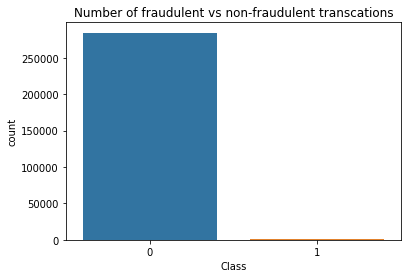

In [10]:
# Create a bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

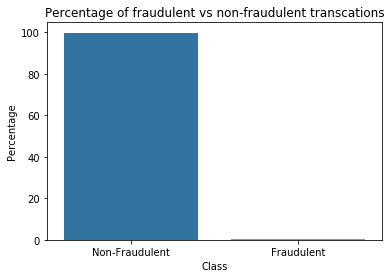

In [11]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_txn_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_txn_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

**Note:** Thers is no need to fix the outlier issue because the all the columns in the dataset are PCA transformed.

In [12]:
#Create derived columns Mins and hours
Delta_Time = pd.to_timedelta(df['Time'], unit='s')
df['Time_Day'] = (Delta_Time.dt.components.days).astype(int)
df['Time_Hour'] = (Delta_Time.dt.components.hours).astype(int)
df['Time_Min'] = (Delta_Time.dt.components.minutes).astype(int)

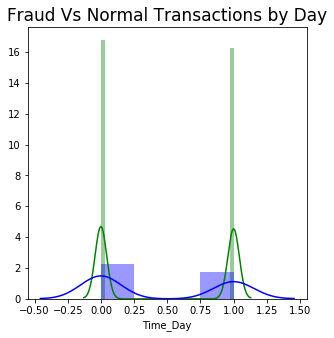

In [13]:
#The fraud Vs normal trasaction by day
plt.figure(figsize=(5,5))
sns.distplot(df[df['Class'] == 0]["Time_Day"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Day"], color='blue')
plt.title('Fraud Vs Normal Transactions by Day', fontsize=17)
plt.show()

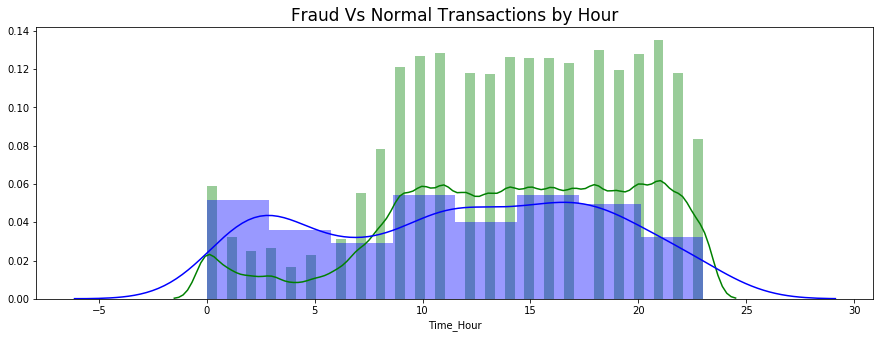

In [14]:
#The fraud Vs normal trasaction by hour
plt.figure(figsize=(15,5))
sns.distplot(df[df['Class'] == 0]["Time_Hour"], color='green')
sns.distplot(df[df['Class'] == 1]["Time_Hour"], color='blue')
plt.title('Fraud Vs Normal Transactions by Hour', fontsize=17)
plt.show()

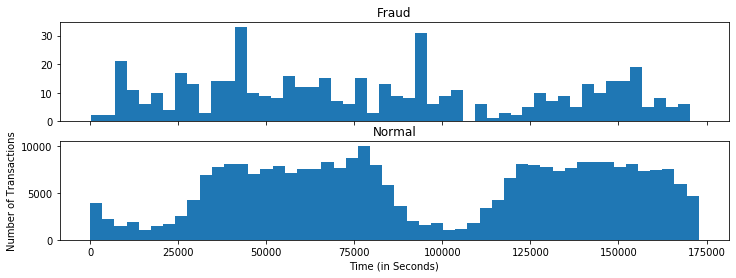

In [15]:
# Create subplots for fraud Vs Normal transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50
ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

### Create a scatter plot to observe the distribution of classes with time

In [16]:
# Create new function to show scatter plot
def display_scatter_plot(my_figsize, title, df, x, y, x_unit):
    fig = plt.figure(figsize= my_figsize)
    cmap = sns.color_palette('Set1')
    
    new_df= df.copy()
    plt.figure(figsize=(10,5), dpi=100)
    sns.set_style("whitegrid")
    sns.scatterplot(x= x, y= y, data=df)
    plt.title((f"{title}"), fontweight='bold', fontsize=15, y=1.02)
    plt.xlabel(x+f" {x_unit}", fontsize=13, fontstyle='italic')
    plt.ylabel(y, fontsize=13, fontstyle='italic')
    
    plt.grid(True)
    plt.autoscale()
    plt.tight_layout()
    plt.show()

<Figure size 864x1008 with 0 Axes>

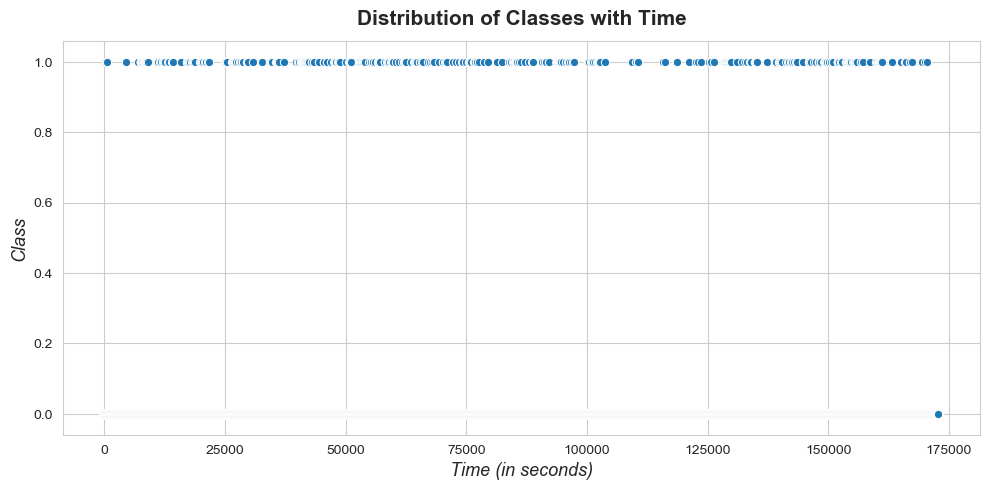

In [17]:
# Create a scatter plot to observe the distribution of classes with Time
display_scatter_plot(my_figsize=(12,14), title= "Distribution of Classes with Time", df=df,\
             x="Time", x_unit="(in seconds)", y="Class")

***Note:*** The above plot shows that there is no time dependencies patterns for both fraudulent vs non-fraudulent transcations

In [18]:
# Drop unnecessary columns
df.drop('Time', axis=1, inplace=True)
df.drop(['Time_Day', 'Time_Min'], axis = 1, inplace= True)

### Create a scatter plot to observe the distribution of classes with Amount

<Figure size 864x1008 with 0 Axes>

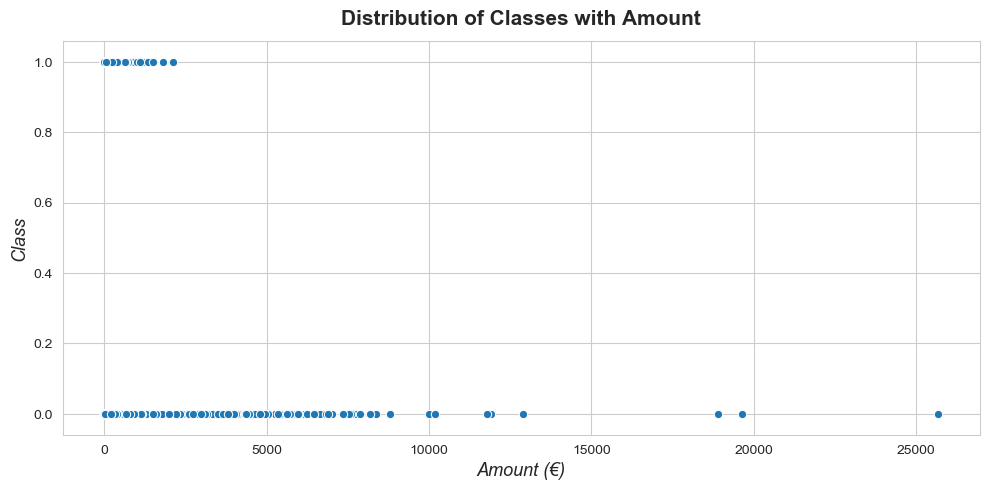

In [19]:
display_scatter_plot(my_figsize=(12,14), title= "Distribution of Classes with Amount", df=df,\
             x="Amount", x_unit="(€)", y="Class")

In [20]:
# Find maximum and minimum amount involved in the Fraud transactions
max_amount = df[df.Class==1]["Amount"].max()
min_amount = df[df.Class==1]["Amount"].min()
print(f"Maximum fraud transaction amount: {max_amount}")
print(f"Minimum fraud transaction amount: {min_amount}")

Maximum fraud transaction amount: 2125.87
Minimum fraud transaction amount: 0.0


In [21]:
# Summary of Non-Fraud transaction amount
class_0= df[df.Class==0].Amount.describe([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
print(f"Non-Fraud Transactions Statistical summary:\n\n",class_0)


Non-Fraud Transactions Statistical summary:

 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
10%           1.000000
25%           5.650000
50%          22.000000
75%          77.050000
90%         202.724000
95%         364.409000
99%        1016.966400
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64


In [22]:
# Summary of Fraud transaction amount
class_1 = df[df.Class==1].Amount.describe([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
print(f"Fraud Transactions Statistical summary:\n\n",class_1)

Fraud Transactions Statistical summary:

 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
10%         0.760000
25%         1.000000
50%         9.250000
75%       105.890000
90%       346.746000
95%       640.905000
99%      1357.427900
100%     2125.870000
max      2125.870000
Name: Amount, dtype: float64


***Note:*** From above, it is evident that average Fraud transaction (€88) amount is much lesser than Non-Fraud transaction amount (€122).

In [23]:
# Understanding more on the correlation in data:
print("Most important features relative to target variable Class")

# correlation matrix
cor = df.corr()

corr_initial = df.corr()['Class']
# convert series to dataframe so it can be sorted
corr_initial = pd.DataFrame(corr_initial)
# correct column label from SalePrice to correlation
corr_initial.columns = ["Correlation"]
# sort correlation
corr_initial2 = corr_initial.sort_values(by=['Correlation'], ascending=False)
corr_initial2.head(5)

Most important features relative to target variable Class


,Correlation
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413


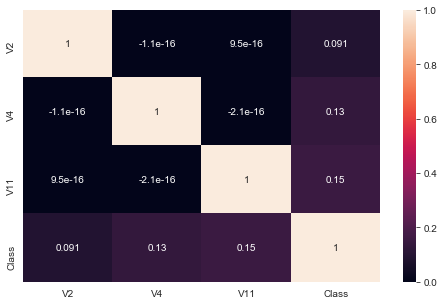

In [24]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature = cor.index[abs(cor['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr = df[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

***Note:*** The above figure shows that `top-3 feature variables` such as `V11, V4 & V2 ` are dependent on the class.

### Splitting the data into train & test data

In [25]:
from sklearn import model_selection

In [26]:
# Assign the target variable
y= df['Class']

# Assign the feature variable
X = df.drop(['Class'], axis=1)

In [27]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [28]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


### Plotting the distribution of a variable

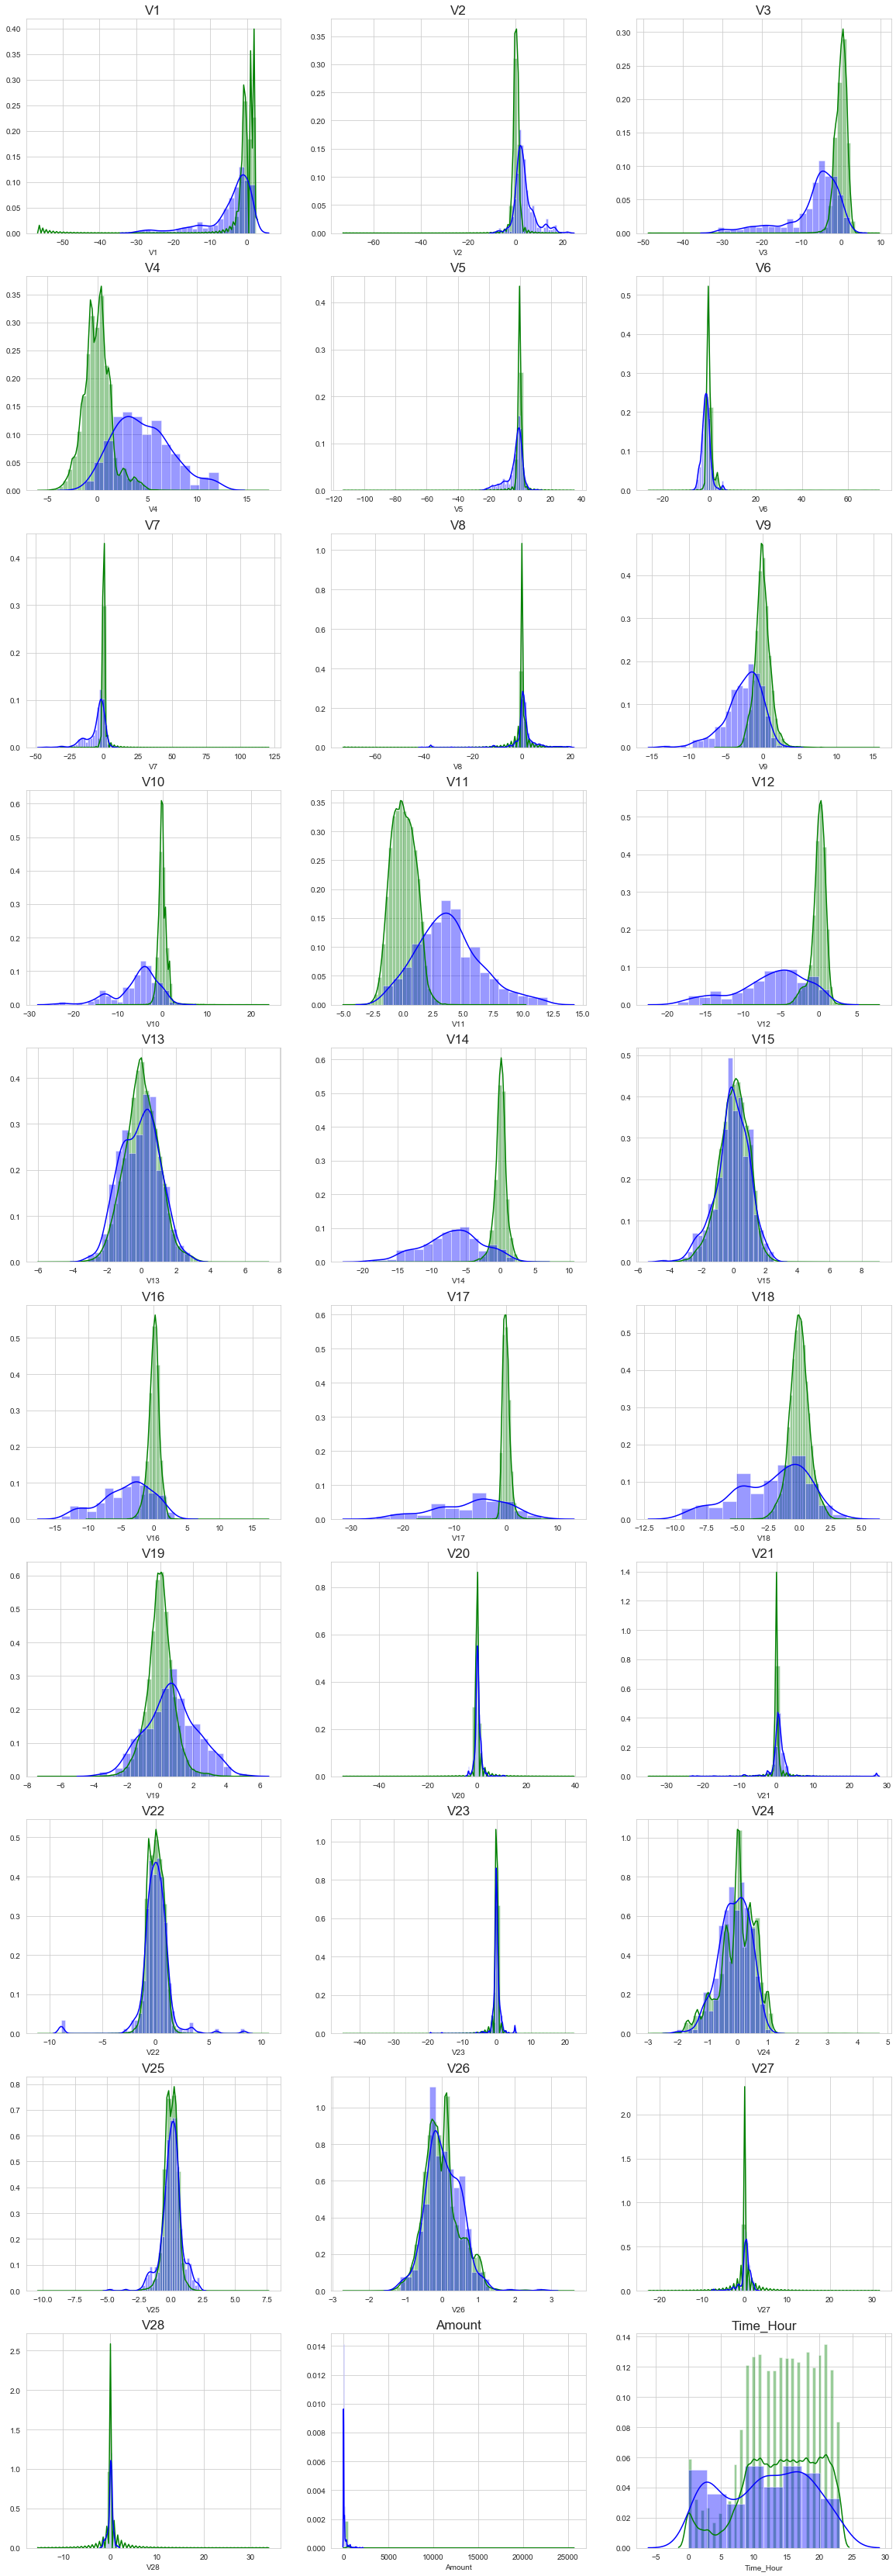

In [29]:
# plot the histogram of a variable from the dataset to see the skewness

# features/columns present in the dataset
cols = list(X.columns.values)
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X[col][normal_records], color='green')
  sns.distplot(X[col][fraud_records], color='blue')
  plt.title(col, fontsize=17)
plt.show()


***Note:*** From above, it is clear that skewness exists in the distribution of many variables within the train data. We need to center the 'Amount' feature variable around mean 0.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [30]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer()

# Fit the PowerTransformer on the training data
pt.fit(X_train)

# Apply this functionality on all the data
X_train_pt = pt.transform(X_train)   
X_test_pt = pt.transform(X_test)

In [31]:
# Create the dataframe on preprocessed data using PowerTransformer
X_train_pt_df = pd.DataFrame(data=X_train_pt,   columns=cols)
X_test_pt_df = pd.DataFrame(data=X_test_pt,   columns=cols)

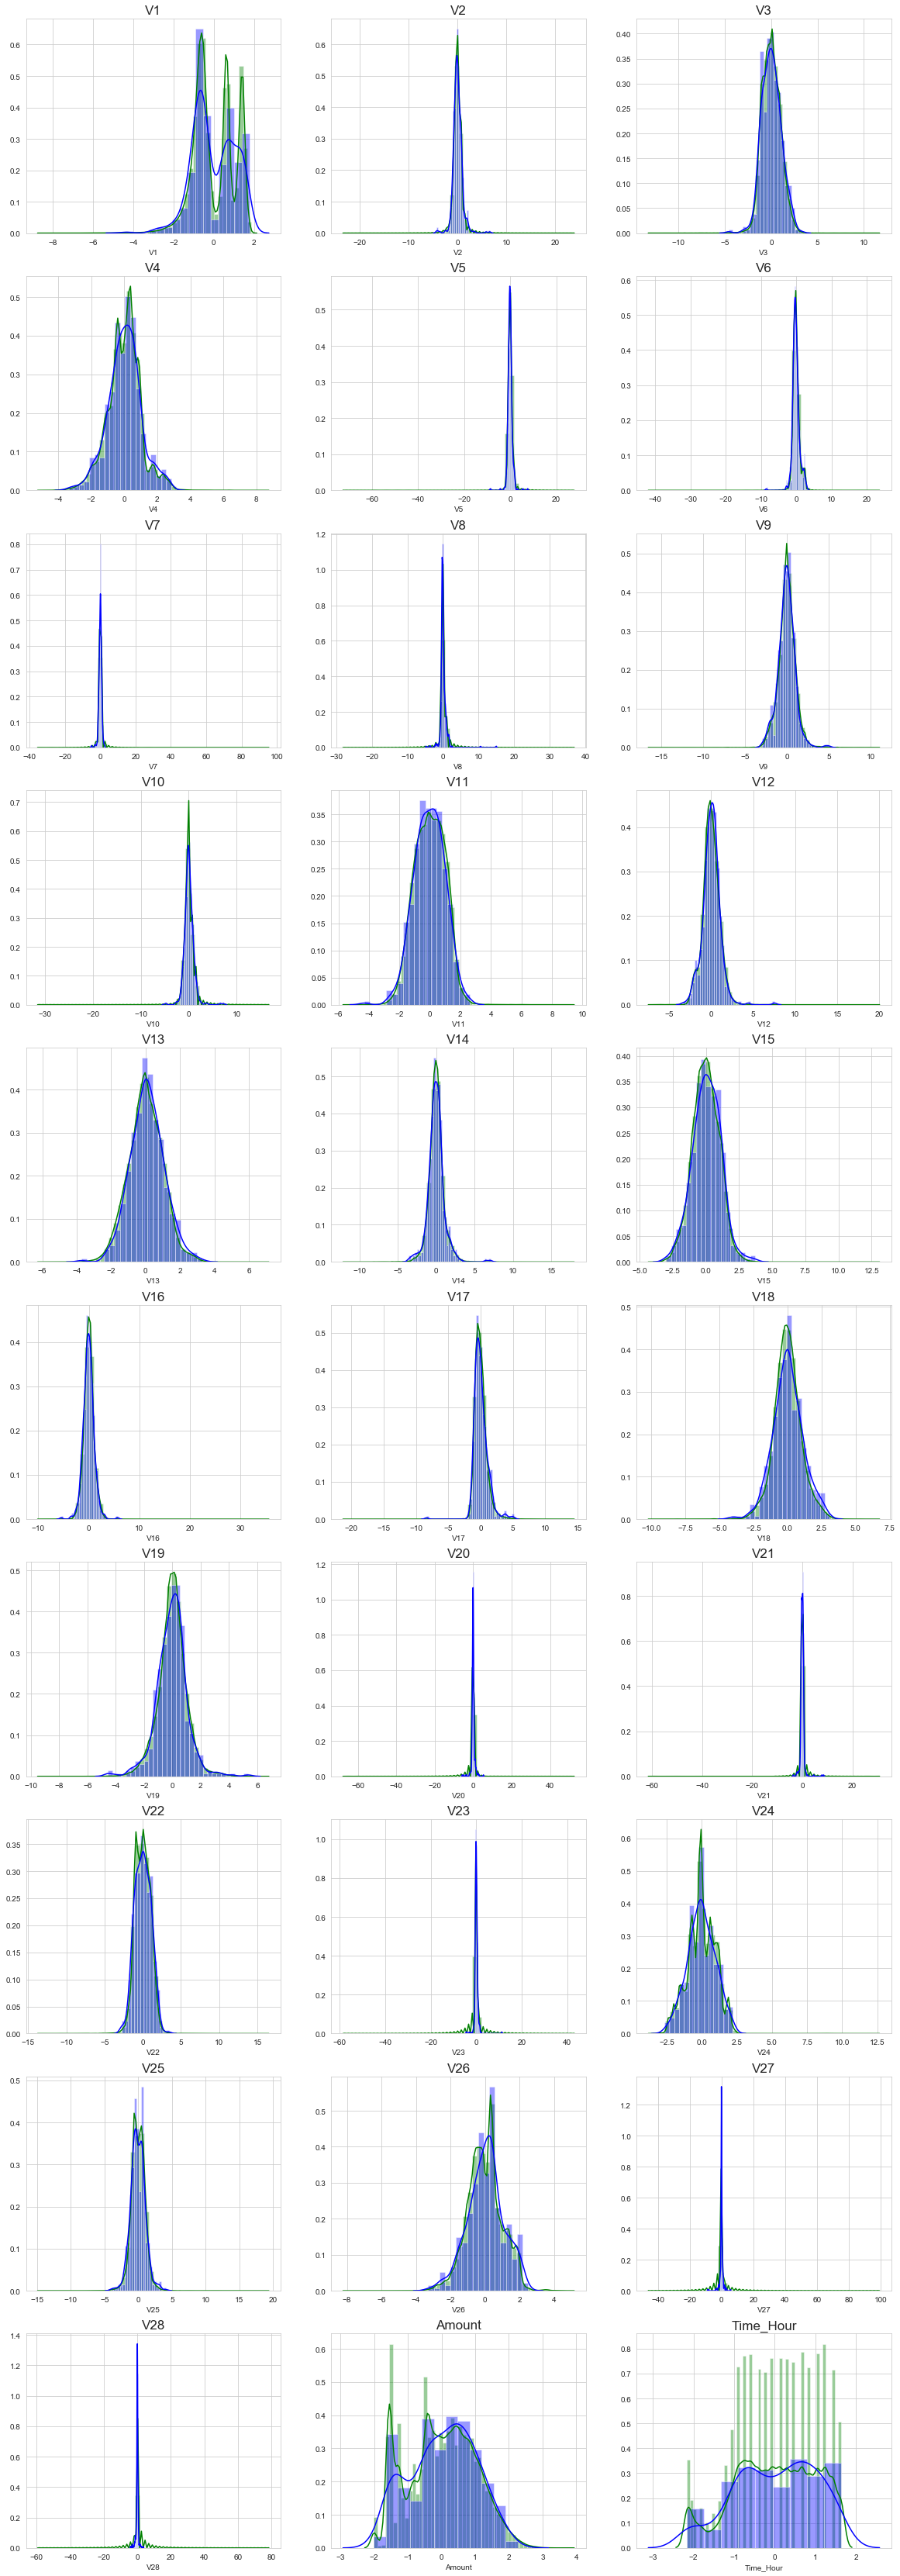

In [32]:
# plot the histogram of a variable from the train dataset
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_train_pt_df[col][normal_records], color='green')
  sns.distplot(X_train_pt_df[col][fraud_records], color='blue')
  plt.title(col, fontsize=17)
plt.show()


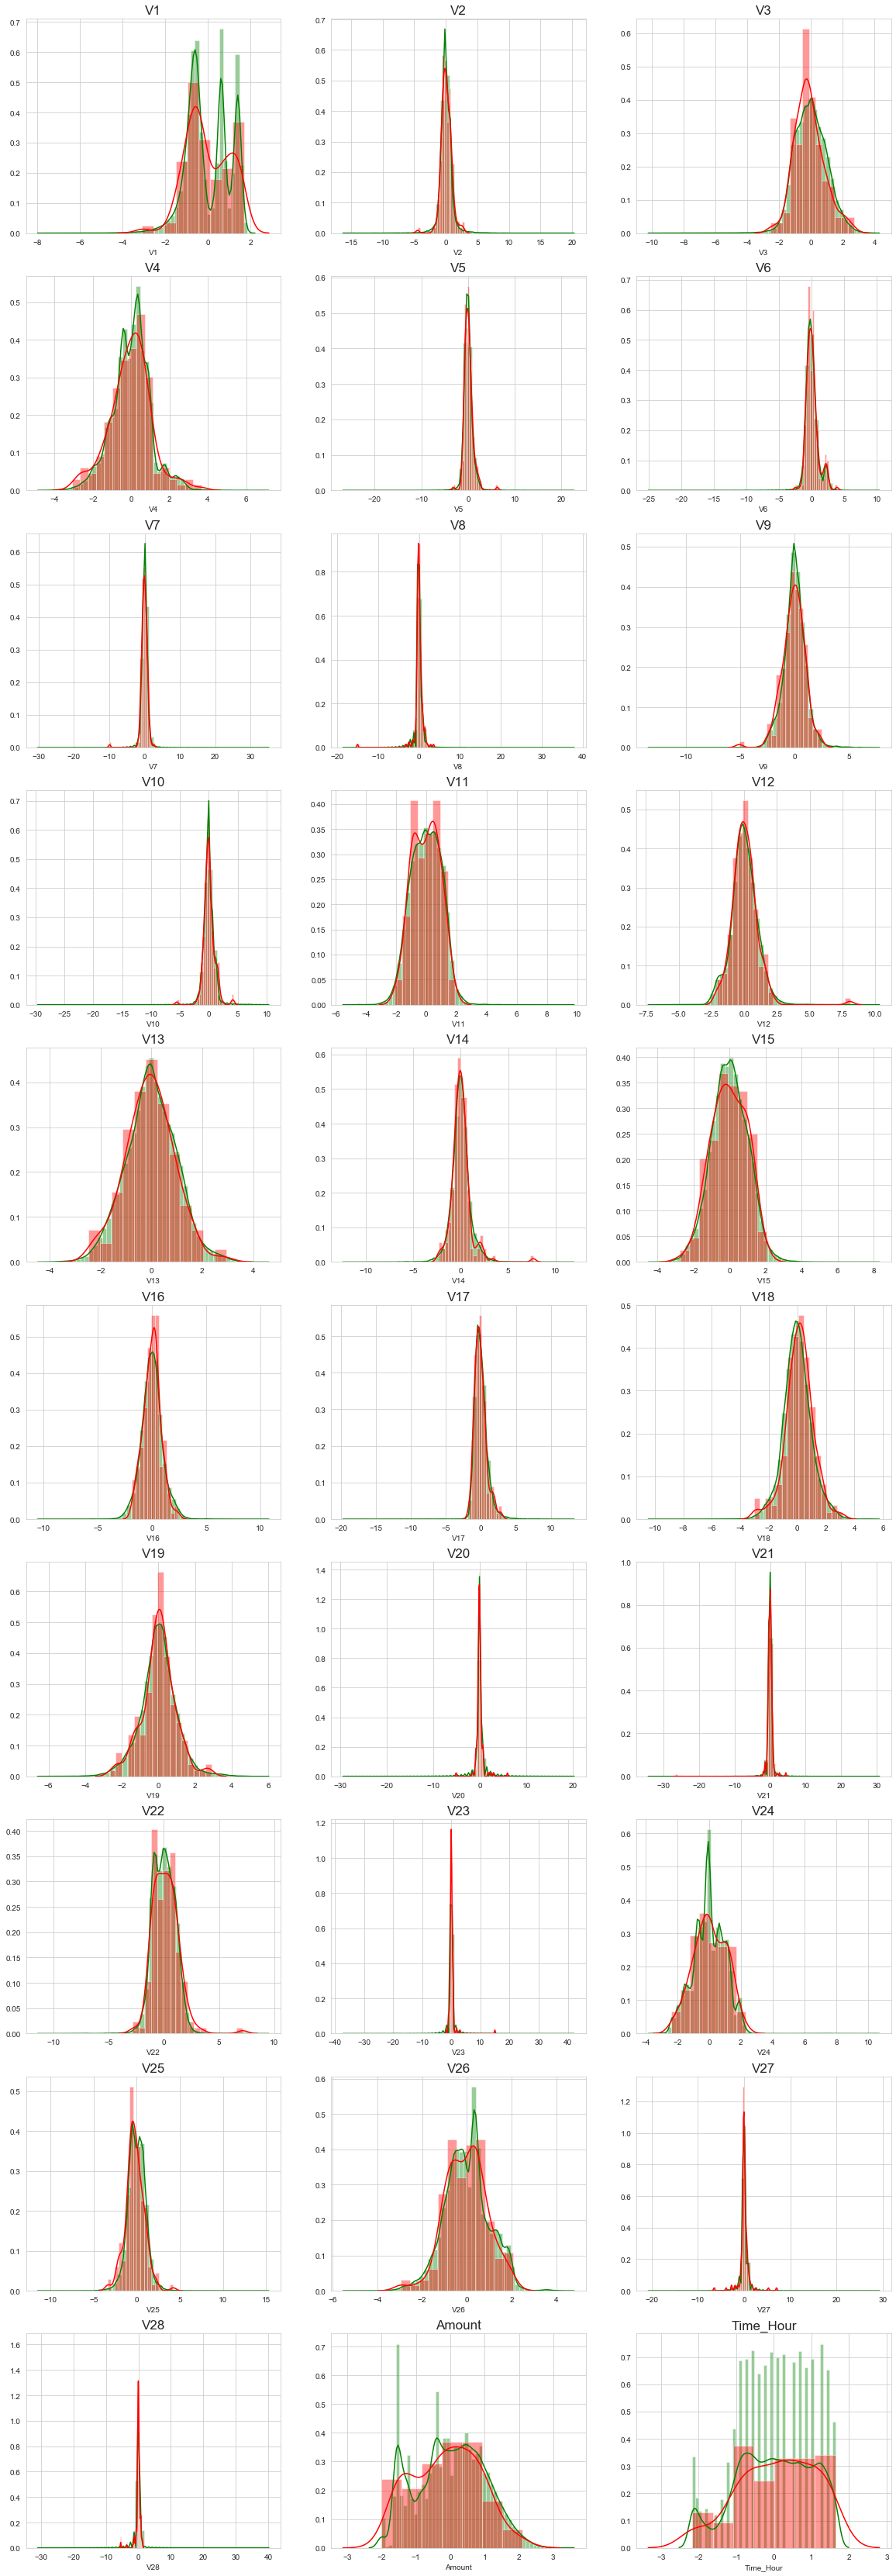

In [33]:
# plot the histogram of a variable from the test dataset
plt.figure(figsize=(20, 60))
for n, col in enumerate(cols):
  plt.subplot(10,3,n+1)
  sns.distplot(X_test_pt_df[col][normal_records], color='green')
  sns.distplot(X_test_pt_df[col][fraud_records], color='red')
  plt.title(col, fontsize=17)
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result for the below
    - Logistic Regression
    - KNN
    - SVM
    - Decision Tree
    - Random Forest
    - XGBoost
    

In [34]:
#Create a dataframe to store results
df_Results = pd.DataFrame(columns=['Data_Imbalance_Handling','Model','Accuracy','roc_value','threshold'])

#### Define the functions to execute each models :-

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [36]:
def executeLogisticRegressionModel(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Logistic Regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold

  num_C = list(np.power(10.0, np.arange(-10, 10)))
  cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  #searchCV.fit(X_train, y_train)
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print("Parameters for l2 regularisations")
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_) 
  print(searchCV_l2.scores_) 

  print("Parameters for l1 regularisations")
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_) 
  print(searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l2)
  print("classification Report")
  print(classification_report(y_test, y_pred_l2))
  print("Accuarcy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_l1)
  print("classification Report")
  print(classification_report(y_test, y_pred_l1))

  from sklearn.metrics import roc_auc_score
  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'roc_value': l2_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'roc_value': l1_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

In [37]:
def executeKNNModel(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
    
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import roc_auc_score

  #create KNN model and fit the model with train dataset
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  #Accuracy
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'KNN','Accuracy': score,'roc_value': knn_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [38]:
def executeSVMModel(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):
  
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score

  #Evaluate SVM model with sigmoid kernel 
  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("accuracy_score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred_SVM)
  print("classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [39]:
def executeDecisionTreeModel(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score
    
  #Evaluate Decision Tree model with 'gini' & 'entropy'   
  criteria = ['gini', 'entropy'] 
  scores = {}   
 
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      Plot_confusion_matrix(y_test, y_pred)
      print("classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'roc_value': tree_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [40]:
def executeRandomForestModel(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, rf_predictions)
  print("classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'roc_value': roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [41]:
def executeXGBoostModel(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):

  from xgboost import XGBClassifier
  from sklearn.metrics import roc_auc_score

  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  Plot_confusion_matrix(y_test, y_pred)
  print("classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handiling': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'roc_value': XGB_roc_value,'threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

In [42]:
def Plot_confusion_matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Accent)
  classNames = ['Non-Fraudalent','Fraudalent']
  plt.title('Confusion Matrix - Test Data')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
  plt.show()

### Run Logistic Regression Model

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983760023970567
Max auc_roc for l1: 0.985410899045824
Parameters for l2 regularisations
[[-0.09276541 -0.06828297 -0.28652331  0.55493742  0.02789795  0.01396825
  -0.06824953 -0.20408006 -0.18143666 -0.20371291  0.17699968 -0.50183428
  -0.11614819 -0.66830552 -0.0815942  -0.18013738 -0.08164992  0.03866812
  -0.03807332 -0.02310099  0.10465199  0.10090233 -0.03198749 -0.02939204
   0.01001787  0.00785392 -0.04474827 -0.02229527  0.02208228  0.08474082]]
[-8.07230494]
{1: array([[0.90398235, 0.90383704, 0.90383704, 0.90383704, 0.90383704,
        0.90419481, 0.96804377, 0.99255279, 0.99488378, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346,
        0.99521346, 0.99521346, 0.99521346, 0.99521346, 0.99521346],
       [0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 , 0.9306611 ,
        0.93091836, 0.96502028, 0.98005776, 0.97844439, 0.97856203,
        0.97856203, 0.97856203, 0.9785620

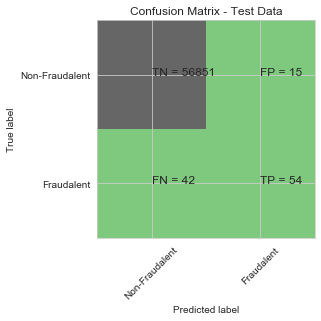

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.78      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuarcy of Logistic model with l1 regularisation : 0.9988413328183702
Confusion Matrix


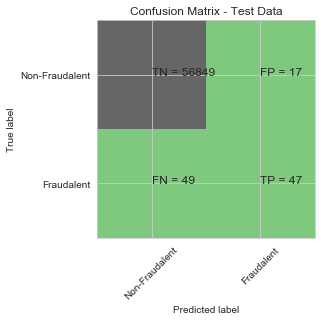

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.73      0.49      0.59        96

    accuracy                           1.00     56962
   macro avg       0.87      0.74      0.79     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9668061026506759
l2 threshold: 0.0012891785846051414
ROC for the test dataset 96.7%


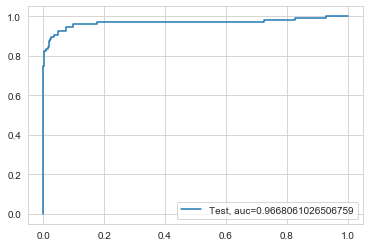

C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


l1 roc_value: 0.9639030791685718
l1 threshold: 0.009276493845029363
ROC for the test dataset 96.4%


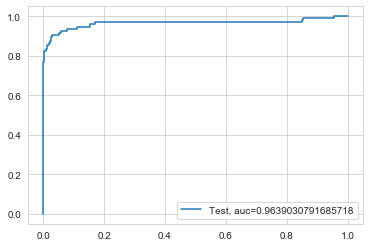

Time Taken by Model: --- 11401.565237045288 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [43]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = executeLogisticRegressionModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Run KNN Model

KNN Model
model score
0.9992977774656788
Confusion Matrix


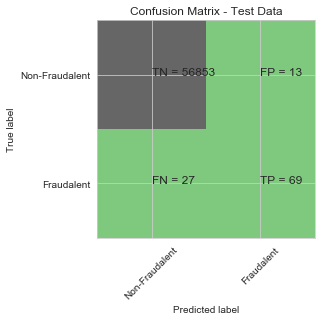

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.72      0.78        96

    accuracy                           1.00     56962
   macro avg       0.92      0.86      0.89     56962
weighted avg       1.00      1.00      1.00     56962

KNN roc_value: 0.900851068740548
KNN threshold: 0.2
ROC for the test dataset 90.1%


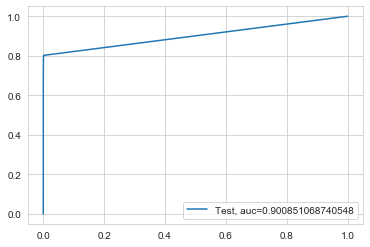

Time Taken by Model: --- 454.83286237716675 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [44]:
#Run KNN Model 
print("KNN Model")
start_time = time.time()
df_Results = executeKNNModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run SVM Model

SVM Model with Sigmoid Kernel
accuracy_score : 0.9985604438046417
Confusion Matrix


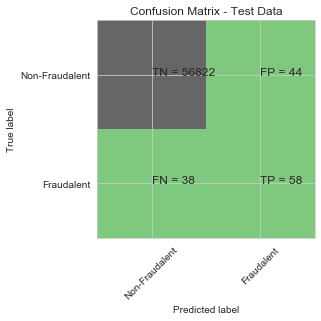

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.57      0.60      0.59        96

    accuracy                           1.00     56962
   macro avg       0.78      0.80      0.79     56962
weighted avg       1.00      1.00      1.00     56962

SVM roc_value: 0.8913131125511436
SVM threshold: 0.0007308336308270233
ROC for the test dataset 89.1%


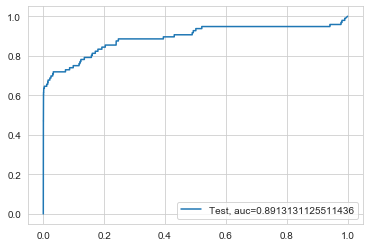

Time Taken by Model: --- 74.4416196346283 seconds ---


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [45]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = executeSVMModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### Run Decision Tree Model

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988062216916541
Confusion Matrix


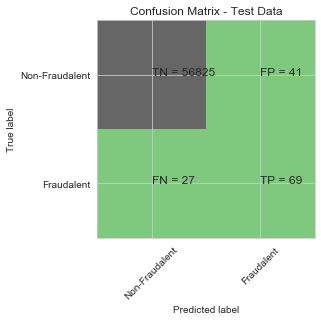

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.63      0.72      0.67        96

    accuracy                           1.00     56962
   macro avg       0.81      0.86      0.83     56962
weighted avg       1.00      1.00      1.00     56962

gini tree_roc_value: 0.8590145033939437
Tree threshold: 1.0
ROC for the test dataset 85.9%


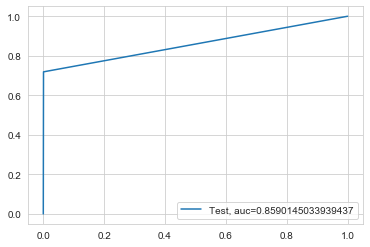

C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


entropy score: 0.9990519995786665
Confusion Matrix


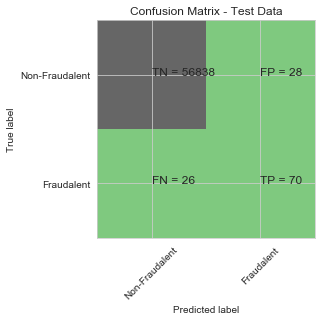

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.71      0.73      0.72        96

    accuracy                           1.00     56962
   macro avg       0.86      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

entropy tree_roc_value: 0.8643371405291973
Tree threshold: 1.0
ROC for the test dataset 86.4%


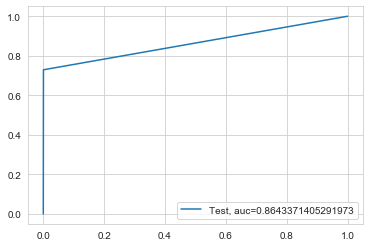

Time Taken by Model: --- 26.596261024475098 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [46]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = executeDecisionTreeModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Random Forest Model

Random Forest Model
Model Accuracy: 0.9993504441557529
Confusion Matrix


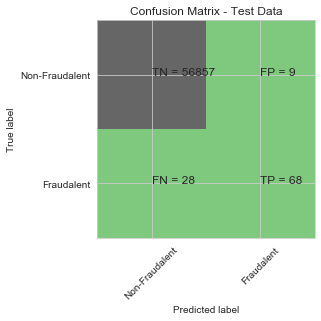

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.88      0.71      0.79        96

    accuracy                           1.00     56962
   macro avg       0.94      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Random Forest roc_value: 0.940564037972309
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


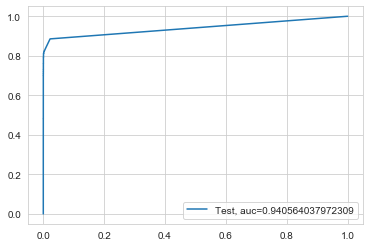

Time Taken by Model: --- 148.9500710964203 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [47]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = executeRandomForestModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run XGBoost Model

XGBoost Model
Model Accuracy: 0.9994557775359011
Confusion Matrix


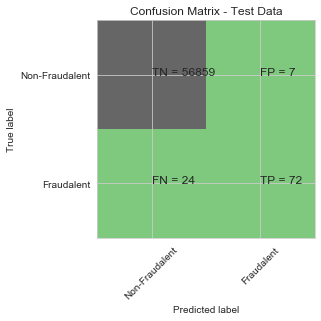

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.75      0.82        96

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962

XGboost roc_value: 0.9729984744838743
XGBoost threshold: 5.146719195181504e-05
ROC for the test dataset 97.3%


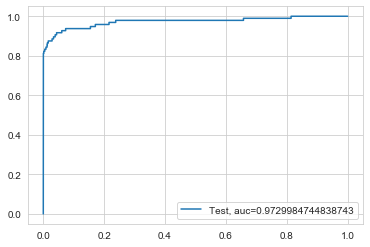

Time Taken by Model: --- 23.75699257850647 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [48]:
#Run XGBoost Modela
print("XGBoost Model")
start_time = time.time()
df_Results = executeXGBoostModel(df_Results,"Power Transformer",X_train_pt_df,y_train, X_test_pt_df, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [49]:
df_Results

,Accuracy,Data_Imbalance_Handiling,Data_Imbalance_Handling,Model,roc_value,threshold
0,0.998999,Power Transformer,NaN,Logistic Regression with L2 Regularisation,0.966806,0.001289
1,0.998841,Power Transformer,NaN,Logistic Regression with L1 Regularisation,0.963903,0.009276
2,0.999298,Power Transformer,NaN,KNN,0.900851,0.200000
3,0.998560,Power Transformer,NaN,SVM,0.891313,0.000731
4,0.998806,Power Transformer,NaN,Tree Model with gini criteria,0.859015,1.000000
5,0.999052,Power Transformer,NaN,Tree Model with entropy criteria,0.864337,1.000000
6,0.999350,Power Transformer,NaN,Random Forest,0.940564,0.010000
7,0.999456,Power Transformer,NaN,XGBoost,0.972998,0.000051


### Best model on the imbalanced data

All the models such as Logistic, XGBoost, Decision Tree, and Random Forest are the better models. In addition to this, Logistic regression and XGBoost model performed best in terms of ROC-AUC score.

The `XGBoost` model is showing an accuracy of 97.3% whereas the `Logistic Regression` model is showing an accuracy of 96.6%.Since XGBoost model requires more resource utilization than Logistic model. We are considering Logistic regression model as the best one. The above results clearly shows that Logistic Regression with L2 Reguslarisation using StratifiedFold Cross validation provided best results.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Logistic Regression with Hyperparameters

In [50]:
  # Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=10, shuffle=True, random_state=42)

searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

#searchCV.fit(X_train, y_train)
searchCV_l2.fit(X_train, y_train)
print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())


print("Parameters for l2 regularisations")
print(searchCV_l2.coef_)
print(searchCV_l2.intercept_) 
print(searchCV_l2.scores_) 


#find predicted vallues
y_pred_l2 = searchCV_l2.predict(X_test)


#Find predicted probabilities
y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 


# Accuaracy of L2/L1 models
Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)


print("Accuarcy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))


from sklearn.metrics import roc_auc_score
l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
print("l2 roc_value: {0}" .format(l2_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
threshold = thresholds[np.argmax(tpr-fpr)]
print("l2 threshold: {0}".format(threshold))


Max auc_roc for l2: 0.9861497195092994
Parameters for l2 regularisations
[[ 2.10640161e-02  3.23184489e-02 -8.92501316e-02  2.36207915e-01
   8.29594906e-02 -4.88507719e-02 -3.25485542e-02 -1.07949235e-01
  -9.20696564e-02 -1.74536693e-01  1.35226901e-01 -2.07371068e-01
  -4.29894414e-02 -3.77058219e-01 -1.06880798e-02 -1.04388311e-01
  -1.14543420e-01 -8.63689943e-03  1.49157975e-02 -5.61364199e-03
   3.93324598e-02  2.41993649e-02  1.93507265e-03 -1.56788010e-02
  -7.87701786e-03  5.15876434e-03 -3.26960318e-03 -2.38900775e-04
   3.01344992e-04  2.75752813e-03]]
[-7.46408239]
{1: array([[0.582166  , 0.58434192, 0.6102234 , 0.77826009, 0.94270322,
        0.98595298, 0.99602302, 0.99464201, 0.99388007, 0.99415481,
        0.99415481, 0.99415481, 0.99415481, 0.99415481, 0.99415481,
        0.99415481, 0.99415481, 0.99415481, 0.99415481, 0.99415481],
       [0.56181758, 0.56167796, 0.57971854, 0.72092242, 0.8896713 ,
        0.94000264, 0.96944672, 0.97830865, 0.97801519, 0.97899511,
  

In [51]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(searchCV_l2.coef_))], axis = 1)
coefficients.columns = ['Feature','Importance Coefficient']

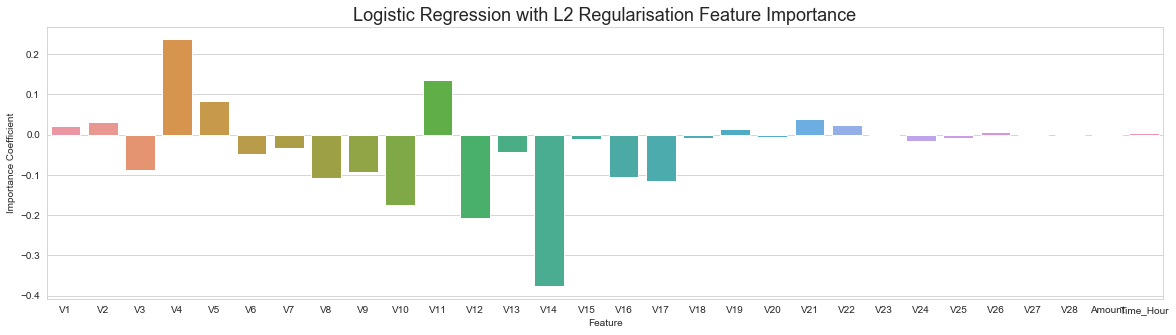

In [52]:
plt.figure(figsize=(20,5))
sns.barplot(x='Feature', y='Importance Coefficient', data=coefficients)
plt.title("Logistic Regression with L2 Regularisation Feature Importance", fontsize=18)

plt.show()

**The above shows that V4, V11, V5 has positive imporatnce. On the other side, V14, V12 & V10 shows negative impact on the predictions.**<br><br>


# Handling data imbalance
Below approaches will be used to handle the data imbalances.

- **Undersampling** :- For balancing the class distribution, the non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
- **Oversampling** :- We will make the same count of non-fraudulent transctions as fraudulent transctions.
- **SMOTE** :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data. 
- **Adasyn**:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

In [55]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
# from collections import Counter

In [56]:
# instantiating the random undersampler 
rus = RandomUnderSampler()

# resampling X, y
X_Under, y_Under = rus.fit_resample(X_train, y_train)

#Create Dataframe
X_Under = pd.DataFrame(data=X_Under,   columns=cols)

# Befor sampling class distribution
# print('Before sampling class distribution:-',Counter(y_train))

# new class distribution 
# print('New class distribution:-',Counter(y_train_rus))

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### Run Logistic Regression with L1 And L2 Regularisation

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9809597992205017
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[-0.03866048  0.02332241 -0.25424971  0.62528451  0.11087048 -0.14773418
   0.1506911  -0.18975836 -0.04565025 -0.13773693  0.29946226 -0.50568324
  -0.27126318 -0.67602944  0.01422663 -0.14241225 -0.00271916  0.13271626
  -0.0162882  -0.13706713  0.09127704  0.11694955  0.02410351 -0.09854891
   0.01175485 -0.09030537  0.00634503  0.02169209  0.00078696 -0.03728415]]
[-2.17647229]
{1: array([[0.591875  , 0.593125  , 0.59875   , 0.653125  , 0.795625  ,
        0.888125  , 0.929375  , 0.9525    , 0.96125   , 0.979375  ,
        0.979375  , 0.979375  , 0.979375  , 0.979375  , 0.979375  ,
        0.979375  , 0.979375  , 0.979375  , 0.979375  , 0.979375  ],
       [0.54987374, 0.55239899, 0.56502525, 0.63825758, 0.80239899,
        0.94255051, 0.98989899, 0.99810606, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        

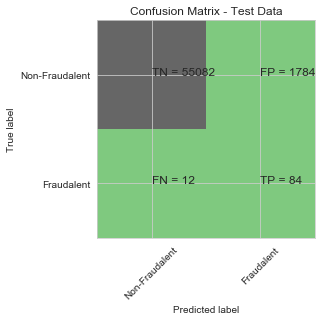

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.88      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Accuarcy of Logistic model with l1 regularisation : 0.9983146659176293
Confusion Matrix


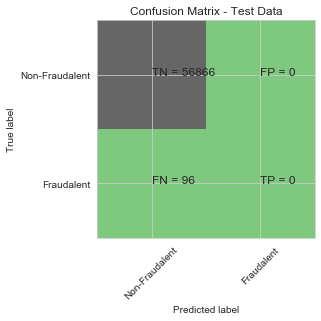

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.00      0.00      0.00        96

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

l2 roc_value: 0.9676657624942848
l2 threshold: 0.35010930801410034
ROC for the test dataset 96.8%


C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


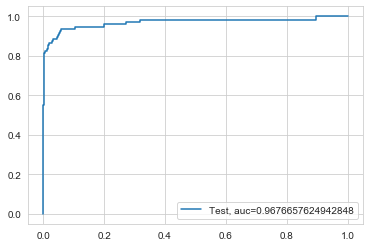

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


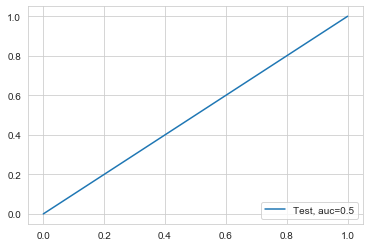

Time Taken by Model: --- 1.6035542488098145 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [57]:
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = executeLogisticRegressionModel(df_Results,"Random Undersampling", X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run KNN Model

KNN Model
model score
0.9317264141006285
Confusion Matrix


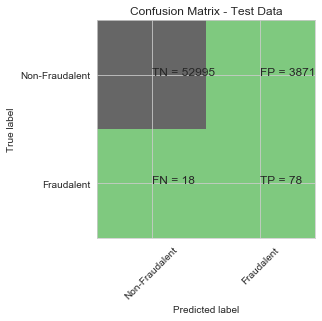

classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56866
           1       0.02      0.81      0.04        96

    accuracy                           0.93     56962
   macro avg       0.51      0.87      0.50     56962
weighted avg       1.00      0.93      0.96     56962

KNN roc_value: 0.9474743805613195
KNN threshold: 0.4
ROC for the test dataset 94.7%


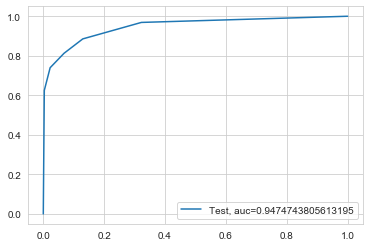

Time Taken by Model: --- 3.3659749031066895 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [58]:
print("KNN Model")
start_time = time.time()
df_Results = executeKNNModel(df_Results,"Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run SVM Model with Sigmoid Kernel

SVM Model with Sigmoid Kernel
accuracy_score : 0.6659527404234402
Confusion Matrix


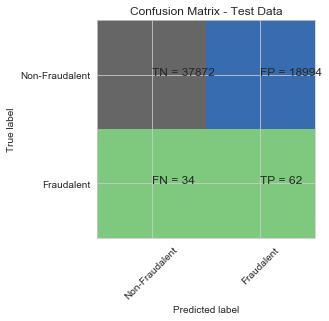

classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80     56866
           1       0.00      0.65      0.01        96

    accuracy                           0.67     56962
   macro avg       0.50      0.66      0.40     56962
weighted avg       1.00      0.67      0.80     56962

SVM roc_value: 0.6204972728285207
SVM threshold: 0.494994397308486
ROC for the test dataset 62.0%


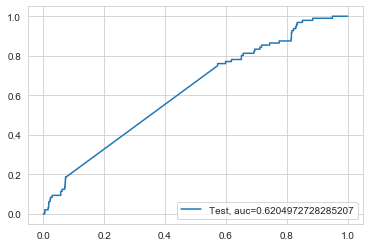

Time Taken by Model: --- 1.8889470100402832 seconds ---


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [59]:
#Run SVM Model with Sigmoid Kernel
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
df_Results = executeSVMModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### Run Decision Tree Model

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.8959481759769671
Confusion Matrix


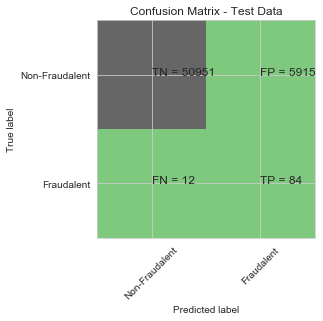

classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56866
           1       0.01      0.88      0.03        96

    accuracy                           0.90     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.90      0.94     56962

gini tree_roc_value: 0.8854917701262618
Tree threshold: 1.0
ROC for the test dataset 88.5%


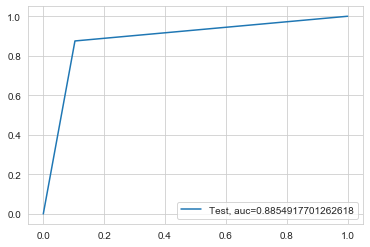

entropy score: 0.9066395140620063
Confusion Matrix


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


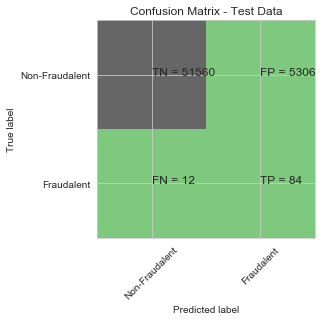

classification Report
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.88      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.89      0.49     56962
weighted avg       1.00      0.91      0.95     56962

entropy tree_roc_value: 0.8908464636162206
Tree threshold: 1.0
ROC for the test dataset 89.1%


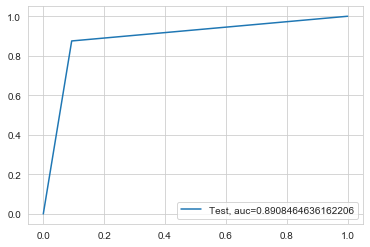

Time Taken by Model: --- 0.8386585712432861 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [60]:
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = executeDecisionTreeModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Random Forest Model

Random Forest Model
Model Accuracy: 0.965749095888487
Confusion Matrix


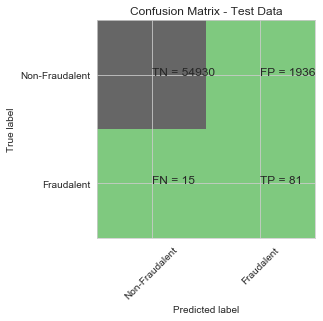

classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.84      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962

Random Forest roc_value: 0.9739398322371892
Random Forest threshold: 0.36
ROC for the test dataset 97.4%


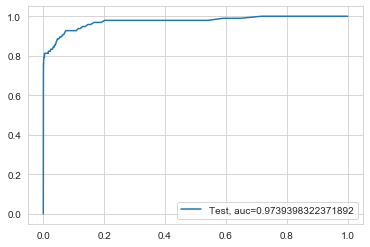

Time Taken by Model: --- 1.9786815643310547 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [61]:
print("Random Forest Model")
start_time = time.time()
df_Results = executeRandomForestModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run XGBoost Model

XGBoost Model
Model Accuracy: 0.9605526491345108
Confusion Matrix


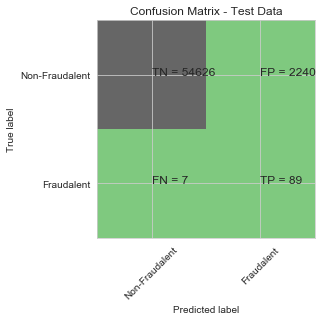

classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.93      0.07        96

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

XGboost roc_value: 0.9798862860350063
XGBoost threshold: 0.5979273319244385
ROC for the test dataset 98.0%


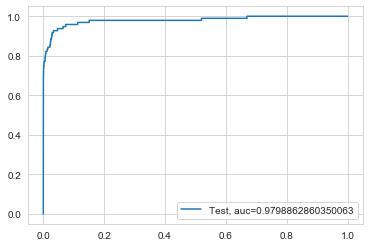

Time Taken by Model: --- 0.8178112506866455 seconds ---


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [62]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = executeXGBoostModel(df_Results, "Random Undersampling",X_Under, y_Under , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

In [63]:
df_Results

,Accuracy,Data_Imbalance_Handiling,Data_Imbalance_Handling,Model,roc_value,threshold
0,0.998999,Power Transformer,NaN,Logistic Regression with L2 Regularisation,0.966806,0.001289
1,0.998841,Power Transformer,NaN,Logistic Regression with L1 Regularisation,0.963903,0.009276
2,0.999298,Power Transformer,NaN,KNN,0.900851,0.200000
3,0.998560,Power Transformer,NaN,SVM,0.891313,0.000731
4,0.998806,Power Transformer,NaN,Tree Model with gini criteria,0.859015,1.000000
5,0.999052,Power Transformer,NaN,Tree Model with entropy criteria,0.864337,1.000000
6,0.999350,Power Transformer,NaN,Random Forest,0.940564,0.010000
7,0.999456,Power Transformer,NaN,XGBoost,0.972998,0.000051
8,0.968470,Random Undersampling,NaN,Logistic Regression with L2 Regularisation,0.967666,0.350109
9,0.998315,Random Undersampling,NaN,Logistic Regression with L1 Regularisation,0.500000,1.500000


**Note: The above results shows tha `XGBoost` model performs better at the undersampling data.**

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

**Note:** The XGBoost model performs better in the case of undersampling.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN


## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling (RandomOverSampler)

**Below steps are followed for Random Oversampling method to handle the class imbalance:**

1. Display class distibution with and without the Random Oversampling.

2. Use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.
3. Compare the results and select model which provided best results for the Random oversampling techinique.

<br>**Below steps will be followed after getting train and test dataset:**<br>
a. Logistic Regression with L2 Regularisation<br>
b. Logistic Regression with L1 Regularisation<br>
c. KNN<br>
d. Decision tree model with Gini criteria<br>
e. Decision tree model with Entropy criteria<br>
f. Random Forest<br>
g. XGBoost<br>

In [64]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_sample(X_train, y_train)
  
#Create Dataframe
X_over = pd.DataFrame(data=X_over,   columns=cols)

C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

## Data Imbalance Handling using the following models:

### Run Logistic Regression with L1 And L2 Regularisation

In [65]:
Data_Imbalance_Handling = "Random Oversampling with StratifiedKFold CV "

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9866906223647838
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.39924277  0.40855457  0.29390569  0.84618302  0.36931569 -0.49585879
  -0.38447891 -0.33417204 -0.24067704 -0.68160088  0.29911406 -0.93776777
  -0.31178017 -0.91657892  0.00536068 -0.54533214 -0.31361285 -0.13310393
   0.13187319 -0.7635042   0.07423429  0.54187738  0.15209903 -0.44612273
   0.21771954 -0.08302934 -0.40489449  0.1936707   0.00586098  0.04354952]]
[-5.23105365]
{1: array([[0.63389099, 0.76093378, 0.90485312, 0.95427232, 0.97624177,
        0.98418294, 0.98580133, 0.98635002, 0.98665664, 0.98677579,
        0.98679472, 0.98679472, 0.98679472, 0.98679472, 0.98679472,
        0.98679472, 0.98679472, 0.98679472, 0.98679472, 0.98679472],
       [0.64017548, 0.76455562, 0.90762126, 0.95607935, 0.97660651,
        0.98456504, 0.98618984, 0.98662148, 0.98688532, 0.98697637,
        0.98699075, 0.98699075, 0.98699075, 0.98699075

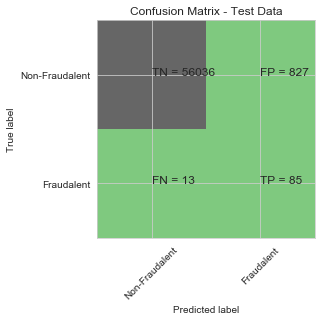

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56863
           1       0.09      0.87      0.17        98

    accuracy                           0.99     56961
   macro avg       0.55      0.93      0.58     56961
weighted avg       1.00      0.99      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


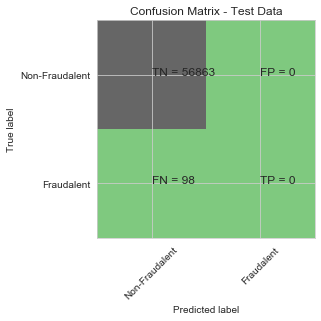

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9804235888119206
l2 threshold: 0.4281371910530522
ROC for the test dataset 98.0%


C:\Users\syamg\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


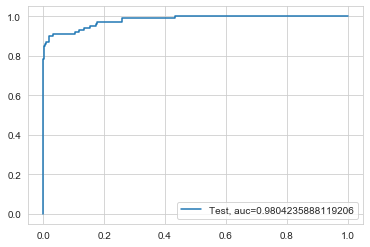

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


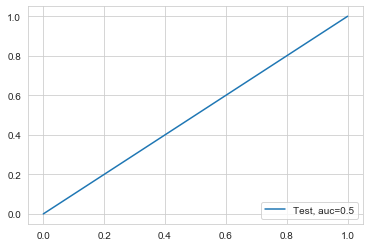

Time Taken by Model: --- 313.5587275028229 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [66]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = executeLogisticRegressionModel(df_Results , Data_Imbalance_Handling , X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run KNN Model

KNN Model
model score
0.9980688541282632
Confusion Matrix


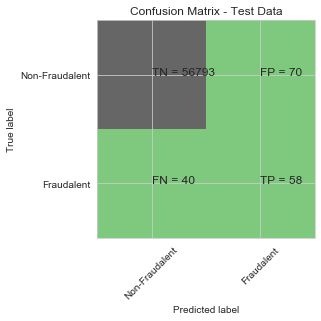

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.805604465728046
KNN threshold: 0.2
ROC for the test dataset 80.6%


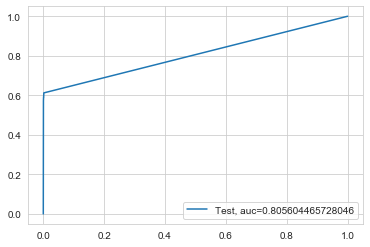

Time Taken by Model: --- 54.21687316894531 seconds ---


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [67]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = executeKNNModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

### Run Decision Tree Model

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988237566053967
Confusion Matrix


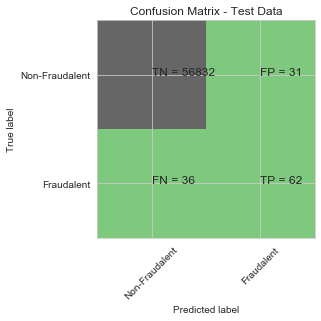

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.63      0.65        98

    accuracy                           1.00     56961
   macro avg       0.83      0.82      0.82     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8160539456272811
Tree threshold: 1.0
ROC for the test dataset 81.6%


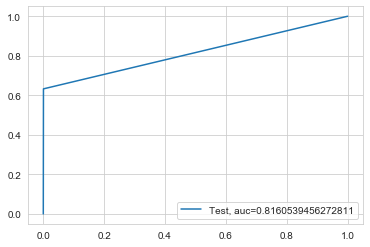

C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


entropy score: 0.9990519829356929
Confusion Matrix


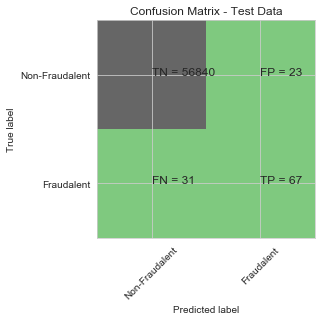

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.68      0.71        98

    accuracy                           1.00     56961
   macro avg       0.87      0.84      0.86     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8416344942211624
Tree threshold: 1.0
ROC for the test dataset 84.2%


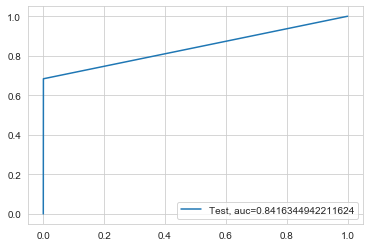

Time Taken by Model: --- 19.342995405197144 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [68]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = executeDecisionTreeModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Random Forest Model

Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


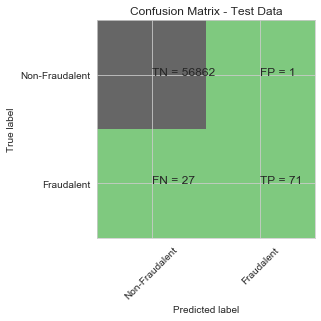

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.72      0.84        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9400613612309141
Random Forest threshold: 0.01
ROC for the test dataset 94.0%


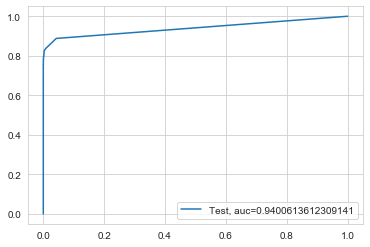

Time Taken by Model: --- 132.87441992759705 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [69]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = executeRandomForestModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run XGBoost Model

XGBoost Model
Model Accuracy: 0.9995259914678464
Confusion Matrix


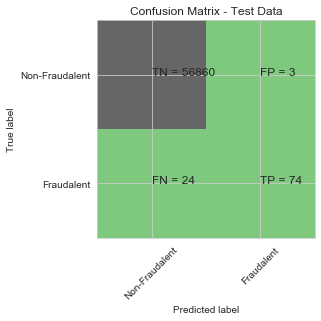

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9822923840939572
XGBoost threshold: 0.00030710414284840226
ROC for the test dataset 98.2%


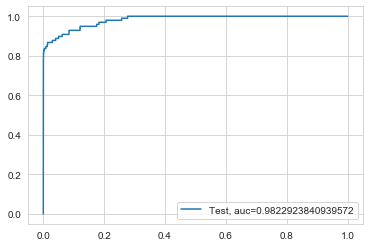

Time Taken by Model: --- 30.84992504119873 seconds ---
--------------------------------------------------------------------------------


C:\Users\syamg\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [70]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = executeXGBoostModel(df_Results , Data_Imbalance_Handling,X_over, y_over, X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [71]:
df_Results

,Accuracy,Data_Imbalance_Handiling,Data_Imbalance_Handling,Model,roc_value,threshold
0,0.998999,Power Transformer,NaN,Logistic Regression with L2 Regularisation,0.966806,0.001289
1,0.998841,Power Transformer,NaN,Logistic Regression with L1 Regularisation,0.963903,0.009276
2,0.999298,Power Transformer,NaN,KNN,0.900851,0.200000
3,0.998560,Power Transformer,NaN,SVM,0.891313,0.000731
4,0.998806,Power Transformer,NaN,Tree Model with gini criteria,0.859015,1.000000
5,0.999052,Power Transformer,NaN,Tree Model with entropy criteria,0.864337,1.000000
6,0.999350,Power Transformer,NaN,Random Forest,0.940564,0.010000
7,0.999456,Power Transformer,NaN,XGBoost,0.972998,0.000051
8,0.968470,Random Undersampling,NaN,Logistic Regression with L2 Regularisation,0.967666,0.350109
9,0.998315,Random Undersampling,NaN,Logistic Regression with L1 Regularisation,0.500000,1.500000


**Note: XGBoost has provided the best results for Random oversampling technique**

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Oversampling with  SMOTE Oversampling:

**Below steps are followed for SMOTE Oversampling method to handle the class imbalance:**

1. Display class distibution with and without the SMOTE Oversampling.

2. Use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.
3. Compare the results and select model which provided best results for the SMOTE oversampling techinique.

<br>**Below steps will be followed after getting train and test dataset:**<br>
a. Logistic Regression with L2 Regularisation<br>
b. Logistic Regression with L1 Regularisation<br>
c. KNN<br>
d. Decision tree model with Gini criteria<br>
e. Decision tree model with Entropy criteria<br>
f. Random Forest<br>
g. XGBoost<br>

### Print the class distribution after applying SMOTE 

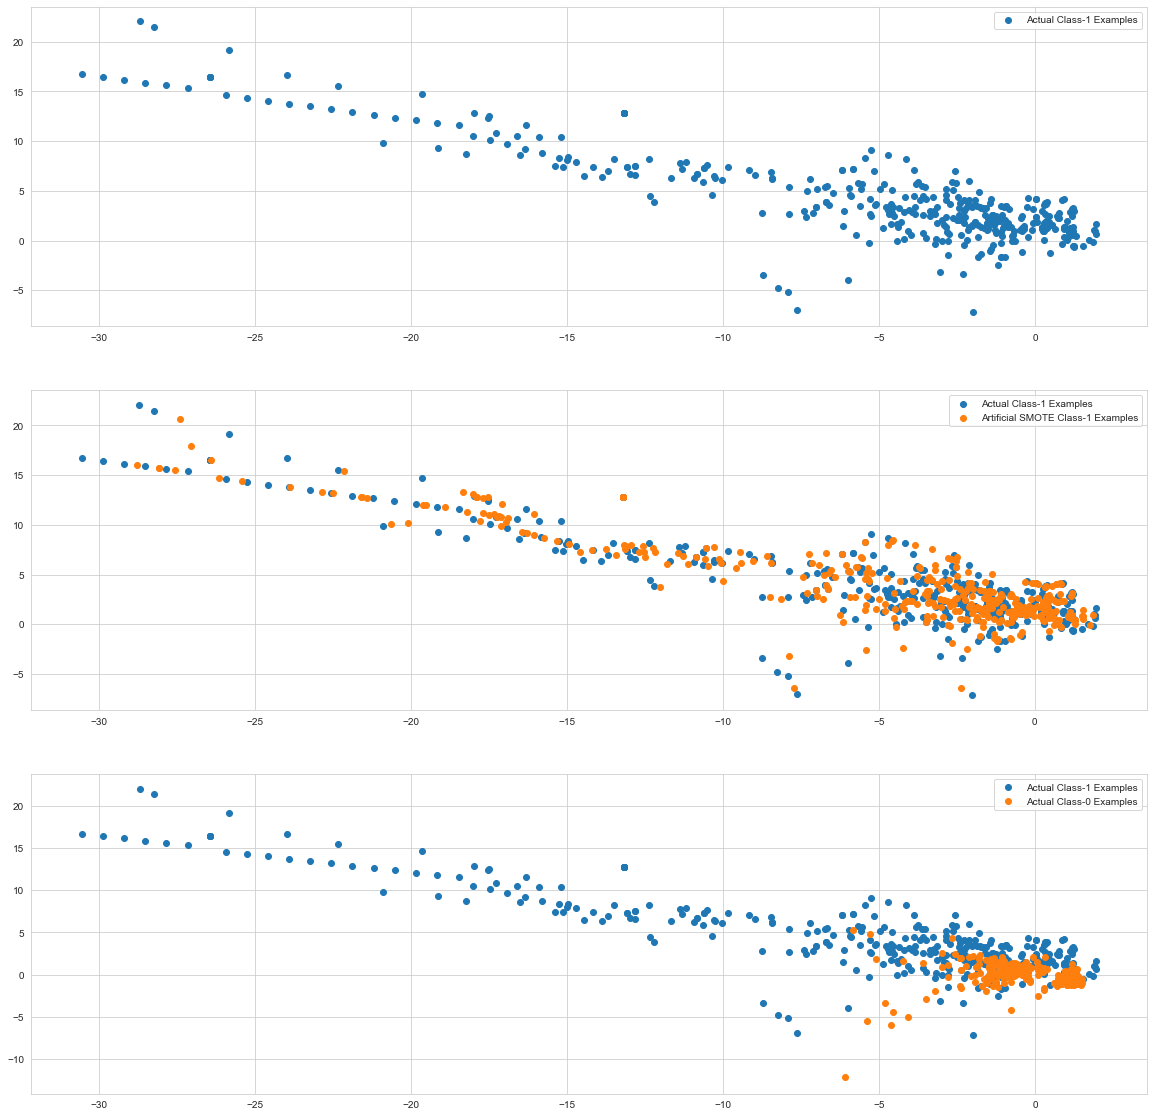

In [72]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE

SMOTE = SMOTE(random_state=0)

X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train) 

X_train_smote_1 = X_train_Smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


#Create dataframe
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [73]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    X_train_Smote, y_train_Smote= SMOTE.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=cols)

In [74]:
Data_Imbalance_Handling = "SMOTE Oversampling with StratifiedKFold CV"

### Run Logistic Regression with L1 And L2 Regularisation

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9931098239555745
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.77310817  0.71927845  0.67432073  0.93830226  0.52132726 -0.92449669
  -0.69724514 -0.50077075 -0.39634409 -0.91335326  0.62474736 -1.2930125
  -0.21540589 -1.51419306  0.1089243  -0.77960402 -0.83896461 -0.42657291
   0.22292823 -1.08028214 -0.01495302  0.5740437   0.41537116 -0.89813862
   0.50103937  0.03851404 -0.19040329  0.8459675   0.00909891  0.03330308]]
[-5.58913949]
{1: array([[0.64885856, 0.7848513 , 0.91728951, 0.96622791, 0.98569763,
        0.98987476, 0.9908566 , 0.99170597, 0.99204514, 0.99214282,
        0.9921544 , 0.9921544 , 0.9921544 , 0.9921544 , 0.9921544 ,
        0.9921544 , 0.9921544 , 0.9921544 , 0.9921544 , 0.9921544 ],
       [0.64564205, 0.78391169, 0.91896288, 0.96868708, 0.98727578,
        0.99110175, 0.99198596, 0.99283415, 0.99319836, 0.99329364,
        0.99331072, 0.99331072, 0.99331072, 0.99331072,

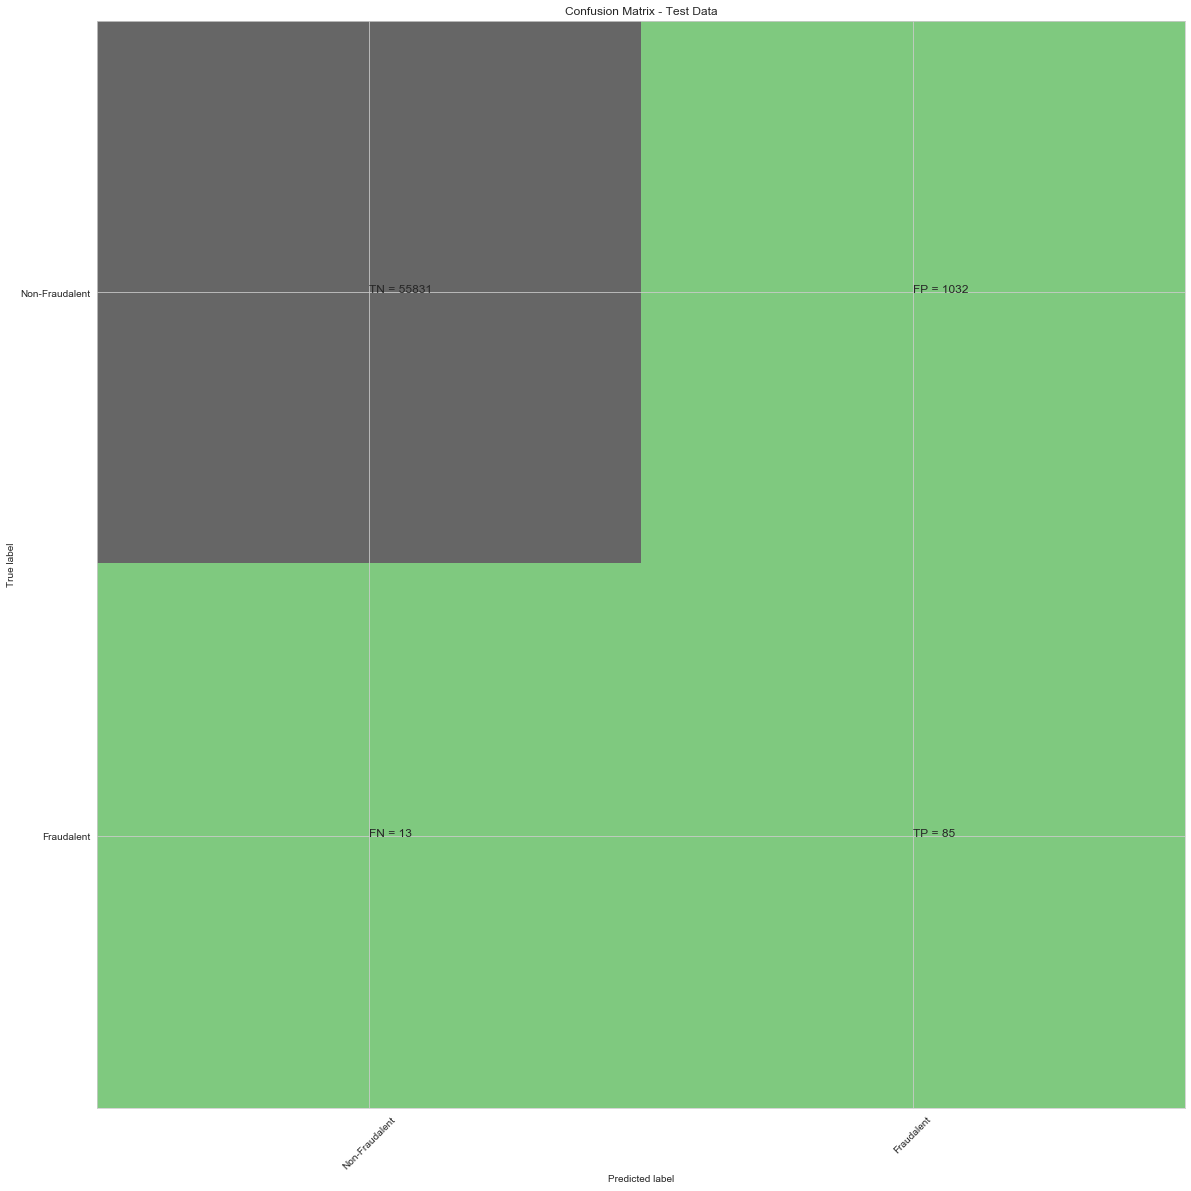

classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56961
   macro avg       0.54      0.92      0.57     56961
weighted avg       1.00      0.98      0.99     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


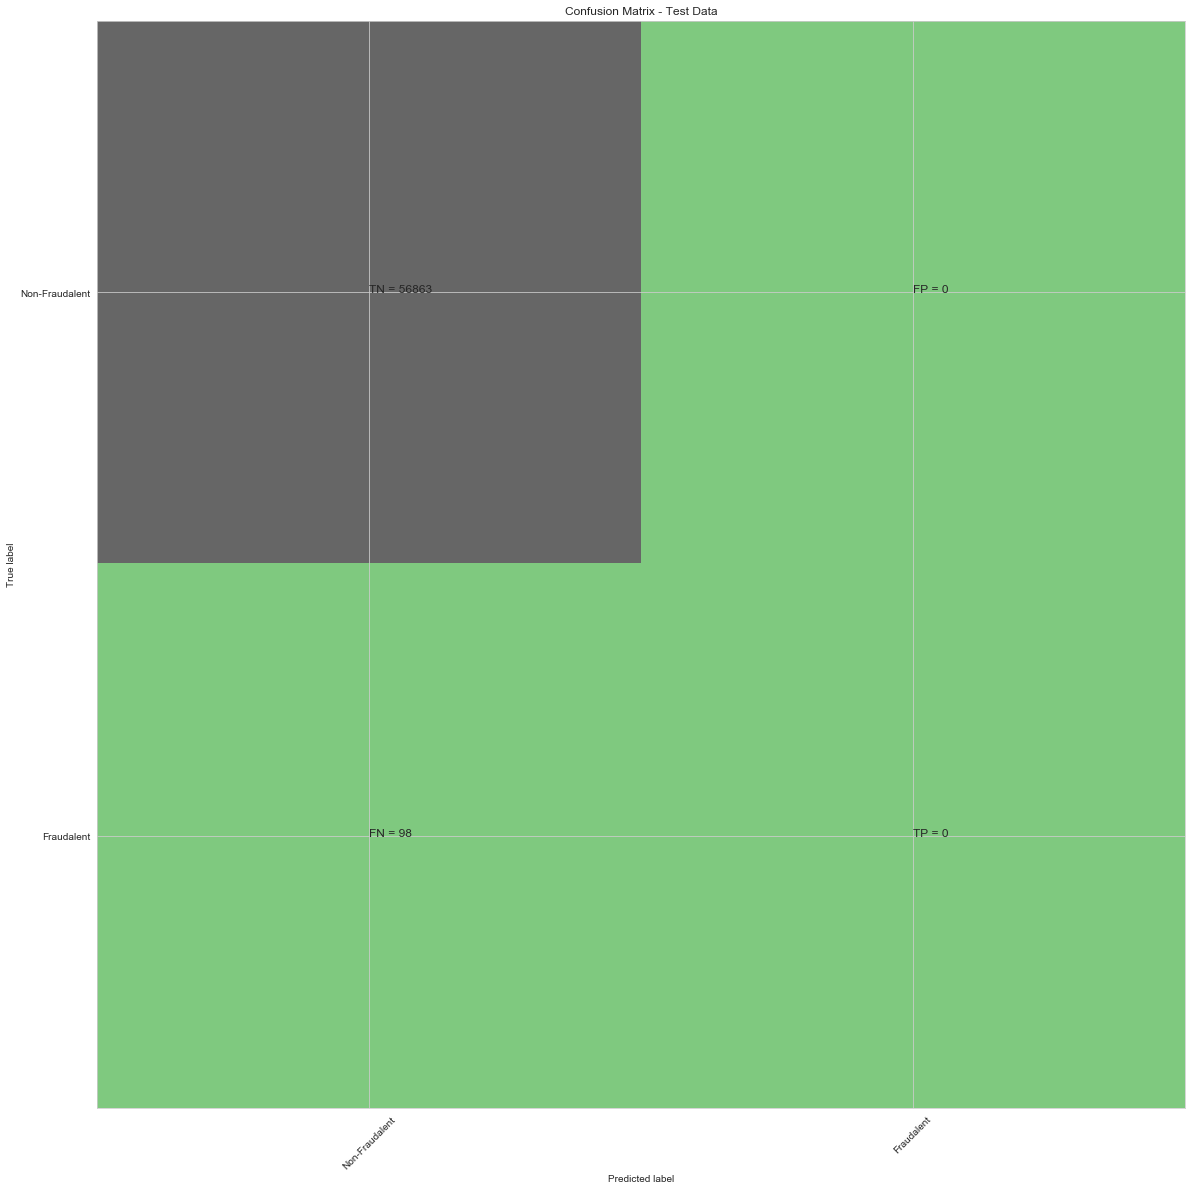

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9747193128346074
l2 threshold: 0.44664631713247577
ROC for the test dataset 97.5%


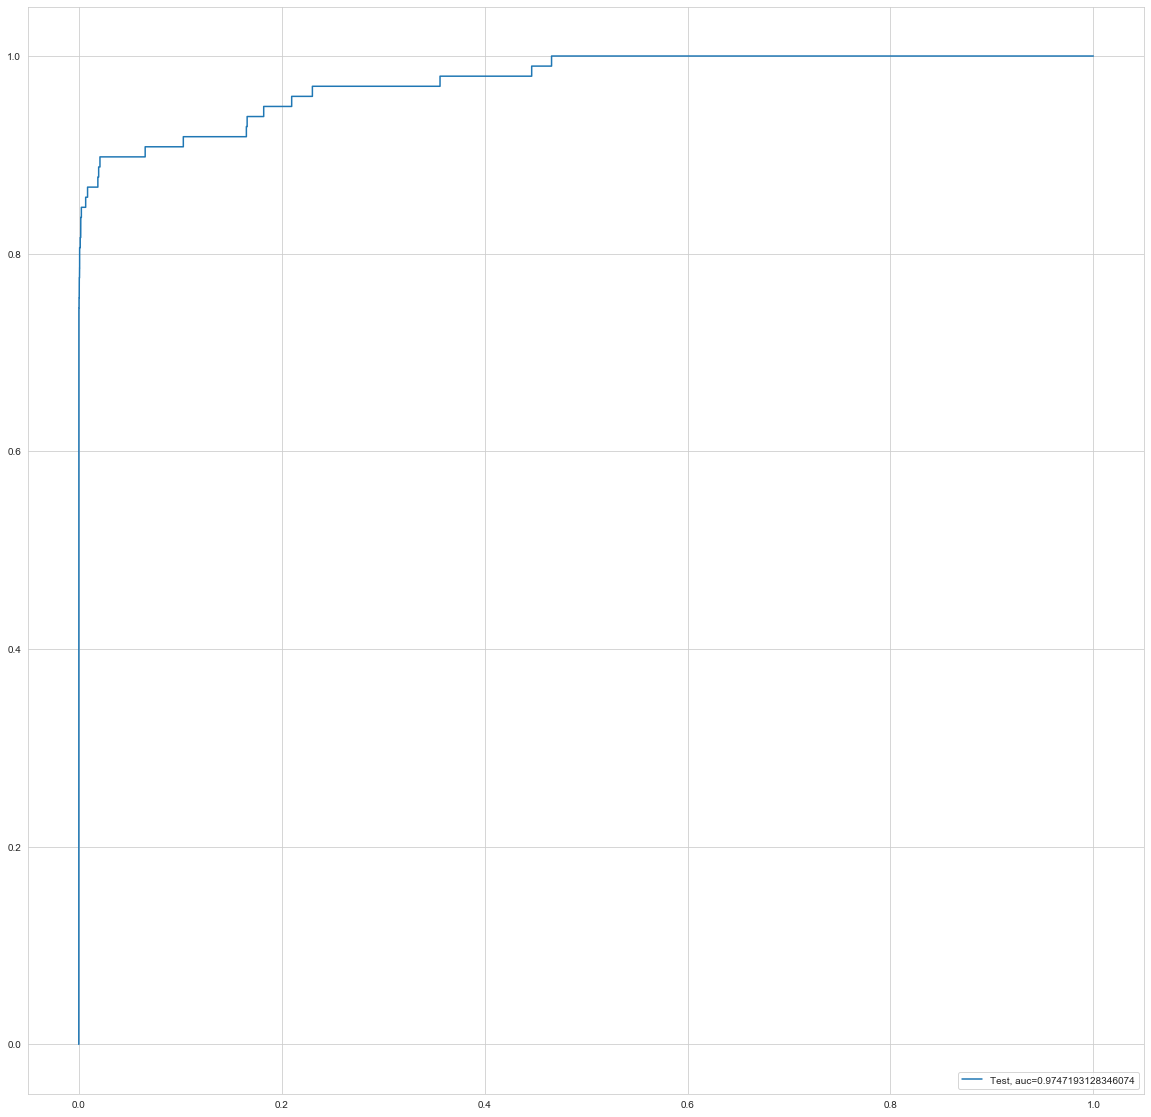

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


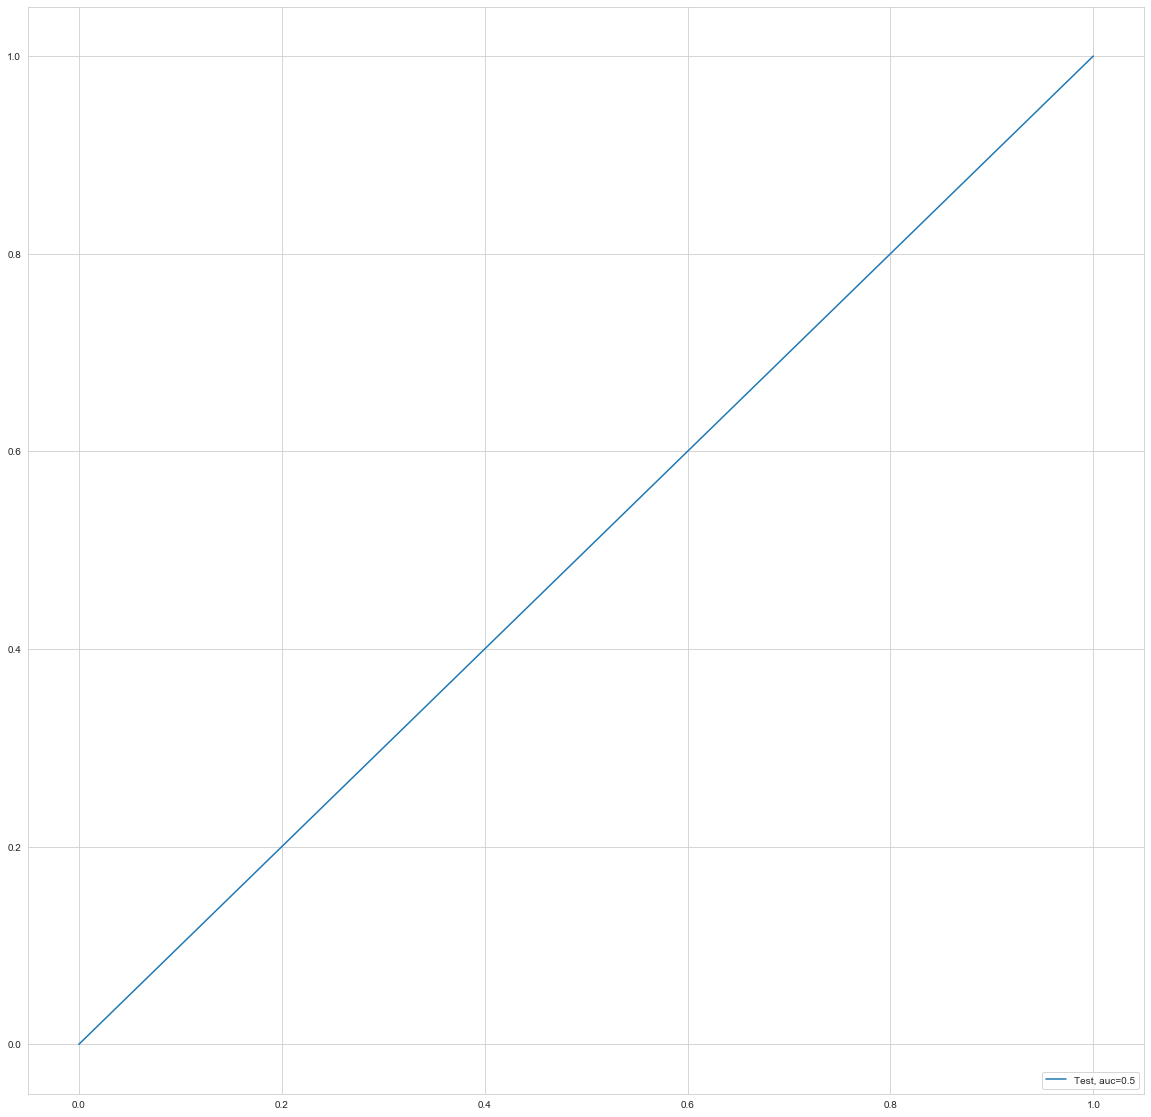

Time Taken by Model: --- 395.4807462692261 seconds ---
--------------------------------------------------------------------------------


In [75]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = executeLogisticRegressionModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run KNN Model

KNN Model
model score
0.9944699004582083
Confusion Matrix


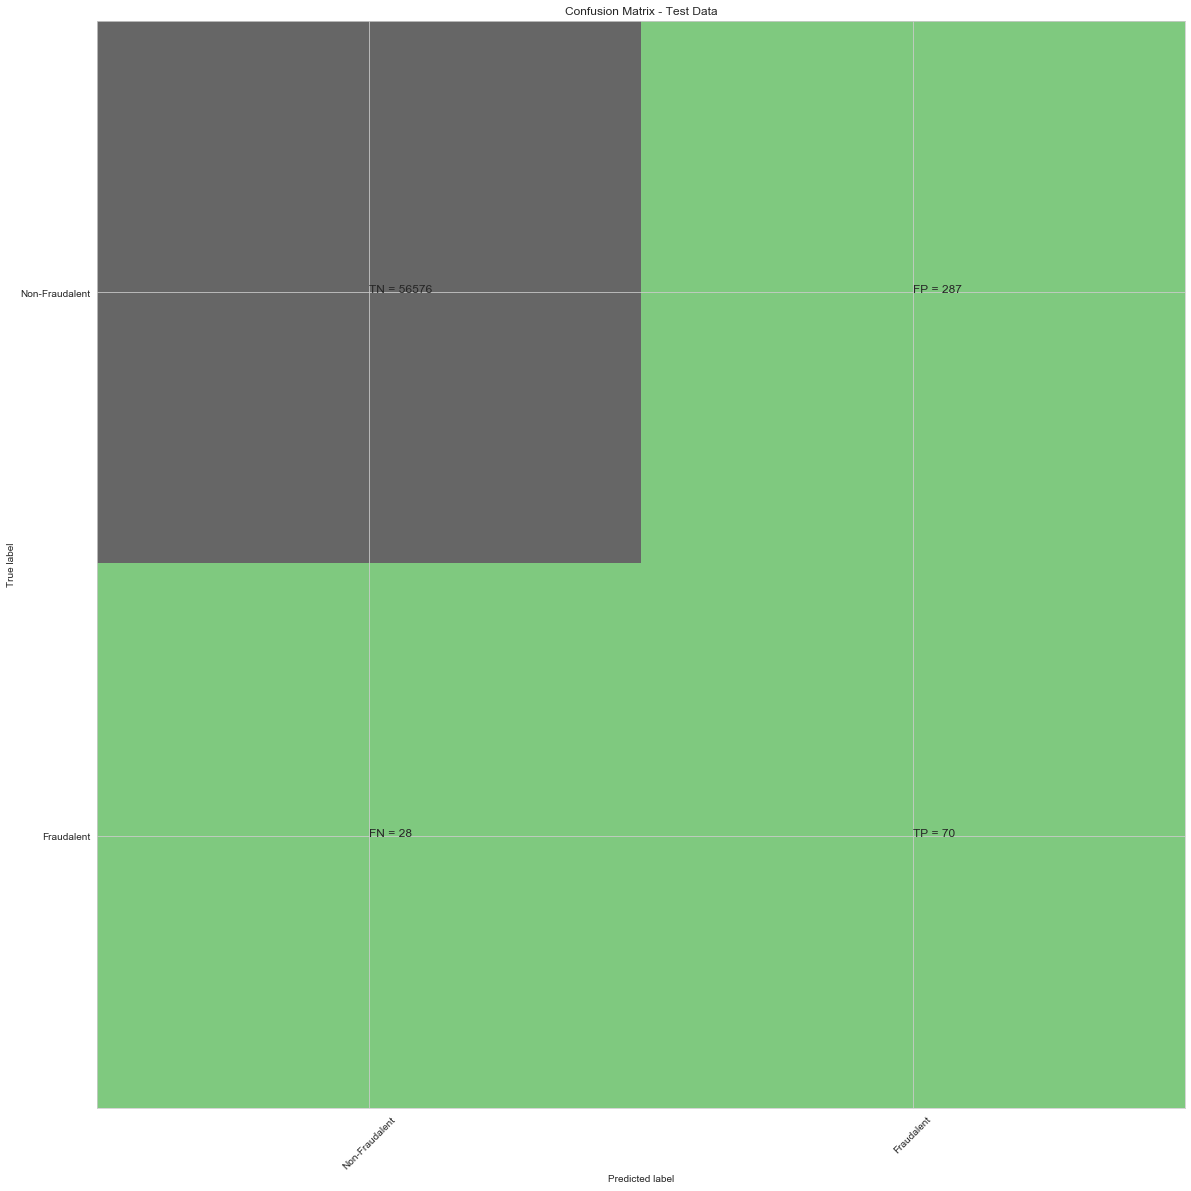

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.20      0.71      0.31        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8602128926417127
KNN threshold: 0.4
ROC for the test dataset 86.0%


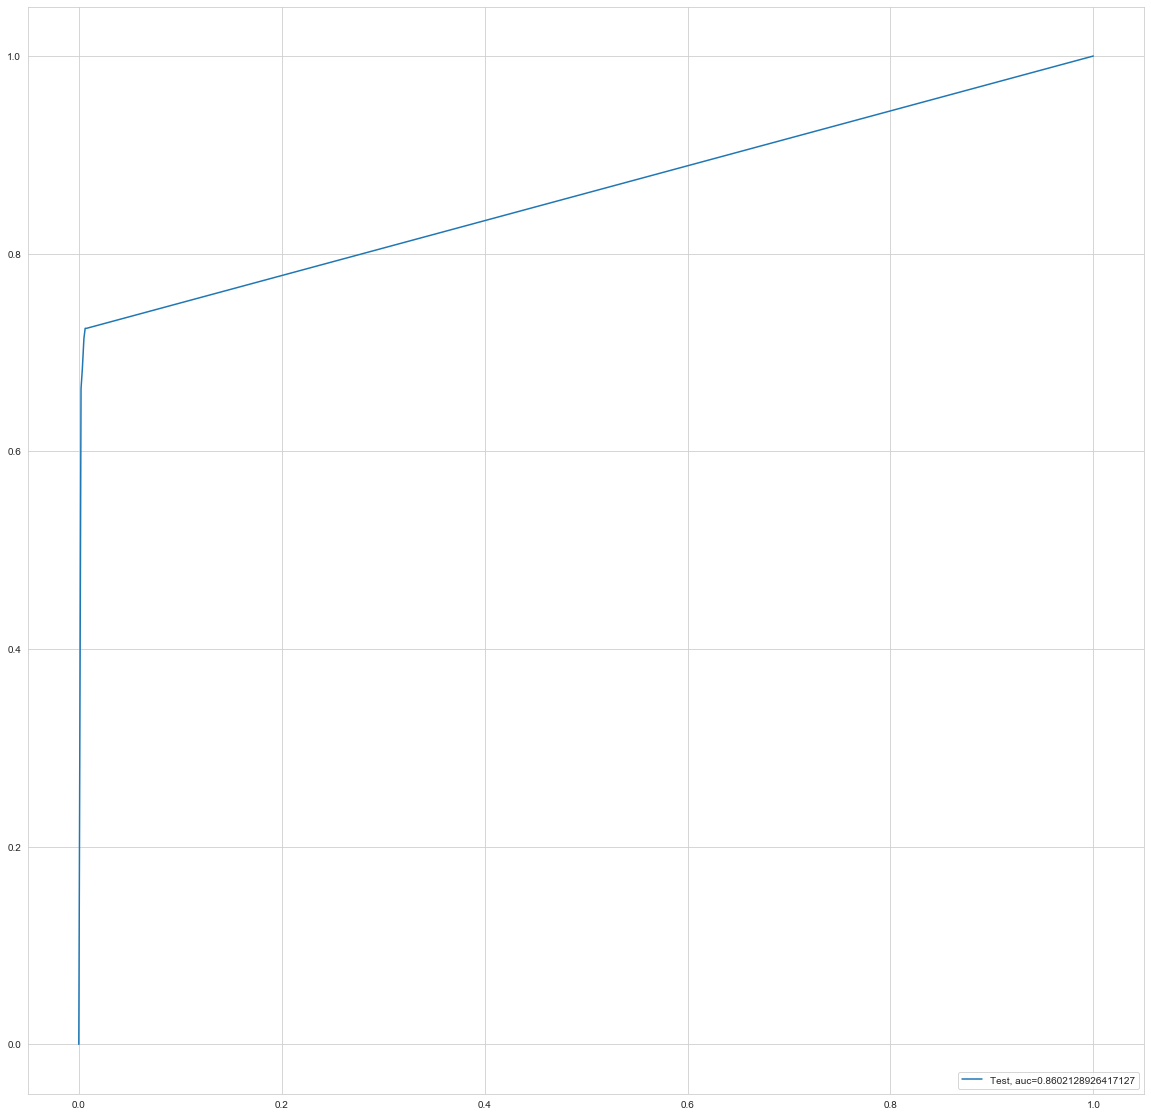

Time Taken by Model: --- 64.79790735244751 seconds ---
--------------------------------------------------------------------------------


In [76]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = executeKNNModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Decision Tree Model

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9974719544951809
Confusion Matrix


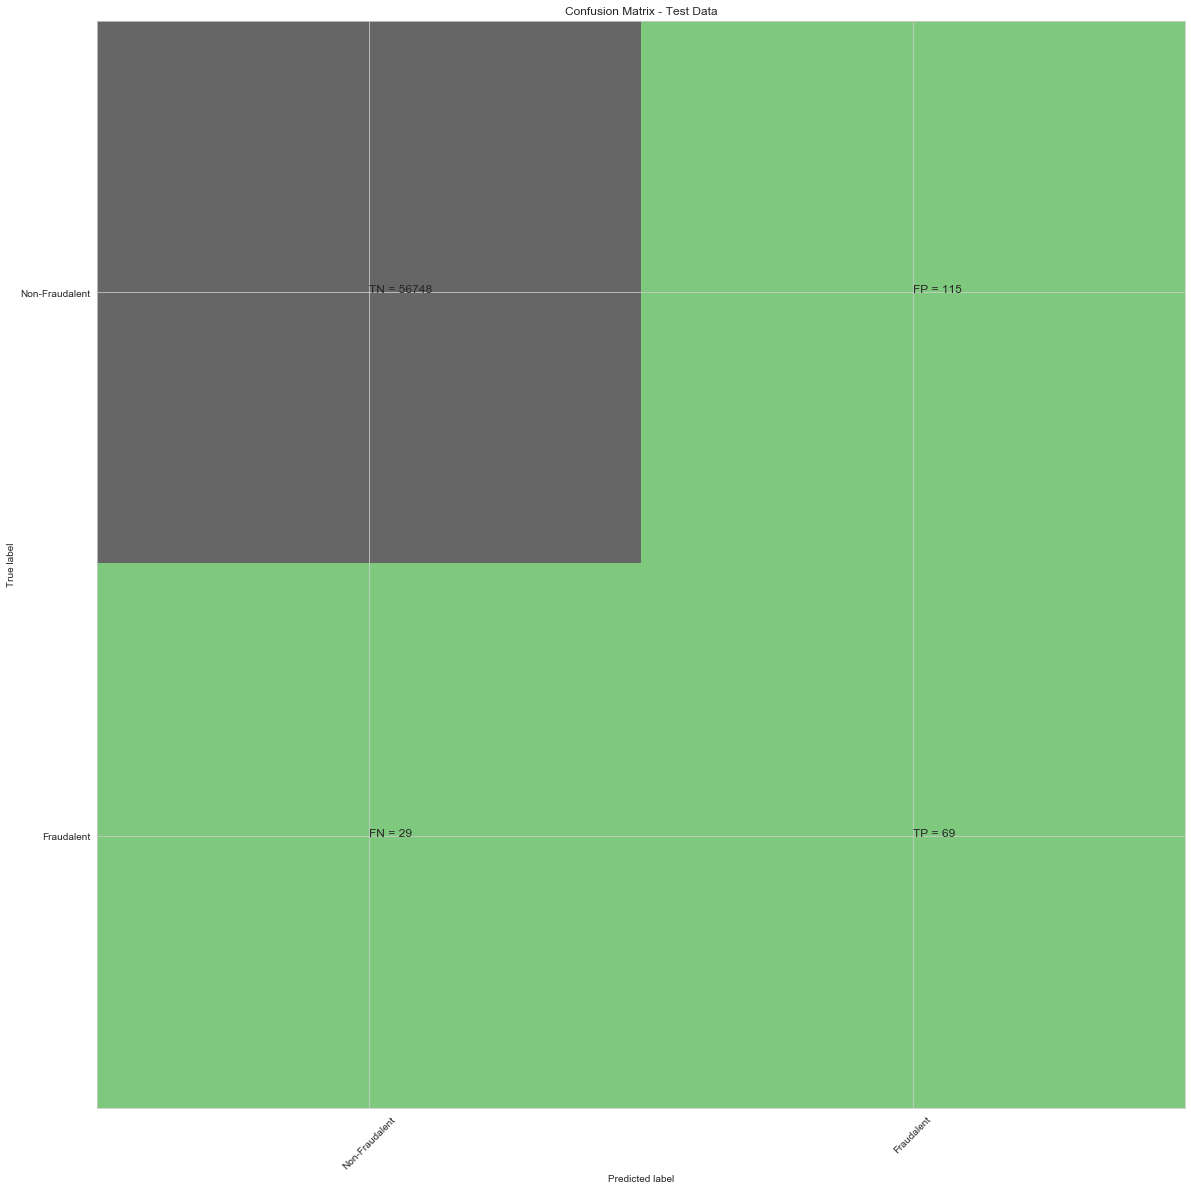

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.38      0.70      0.49        98

    accuracy                           1.00     56961
   macro avg       0.69      0.85      0.74     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.851029613962955
Tree threshold: 1.0
ROC for the test dataset 85.1%


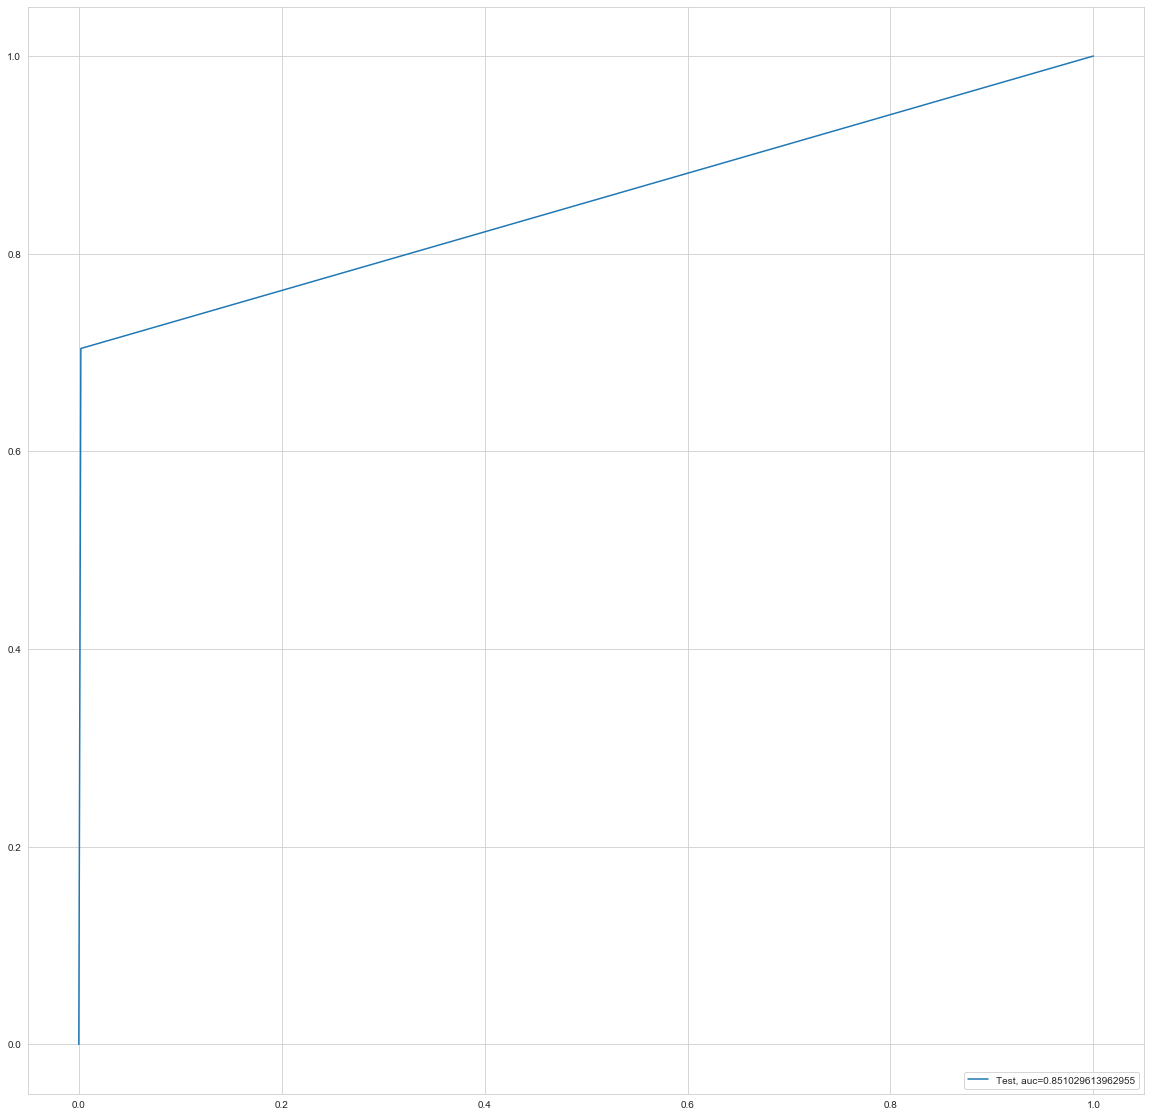

entropy score: 0.9929074278892576
Confusion Matrix


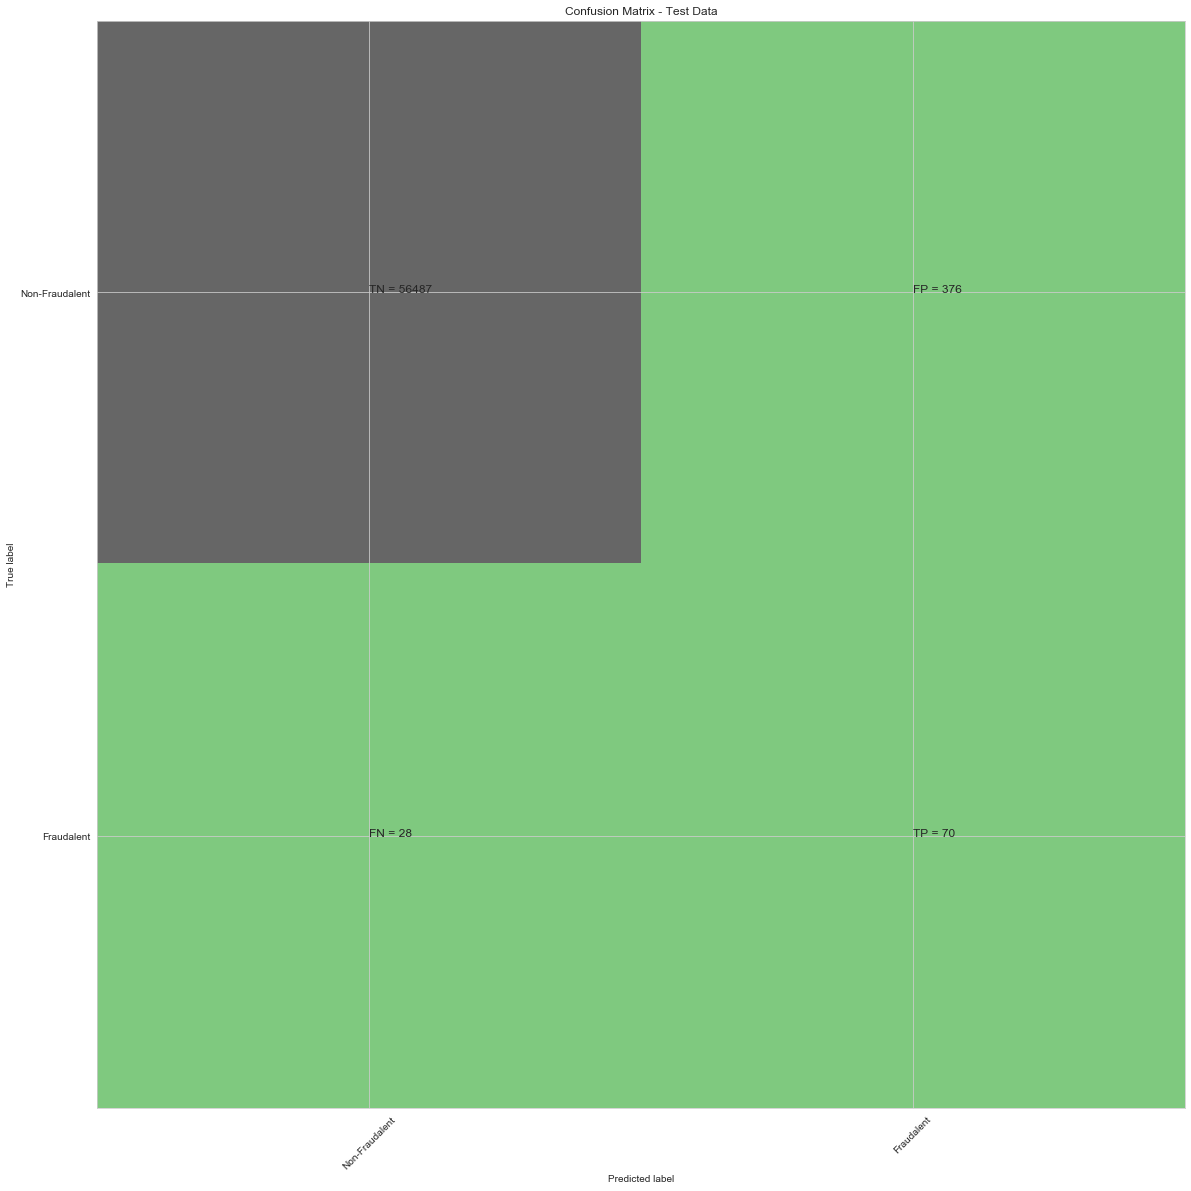

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.16      0.71      0.26        98

    accuracy                           0.99     56961
   macro avg       0.58      0.85      0.63     56961
weighted avg       1.00      0.99      1.00     56961

entropy tree_roc_value: 0.8538366650671664
Tree threshold: 1.0
ROC for the test dataset 85.4%


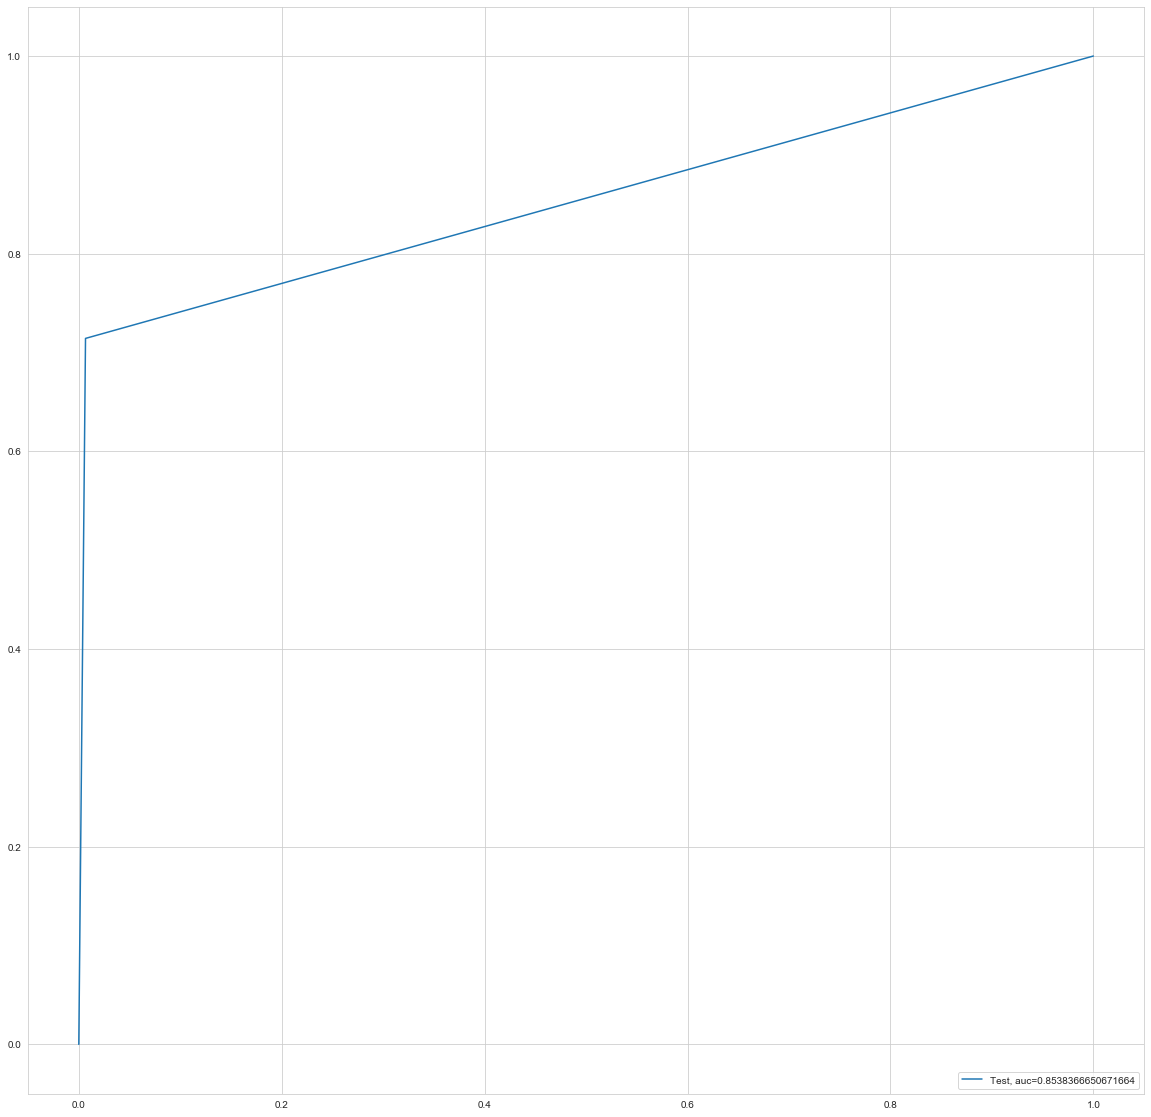

Time Taken by Model: --- 60.94919276237488 seconds ---
--------------------------------------------------------------------------------


In [77]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = executeDecisionTreeModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Random Forest Model

Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


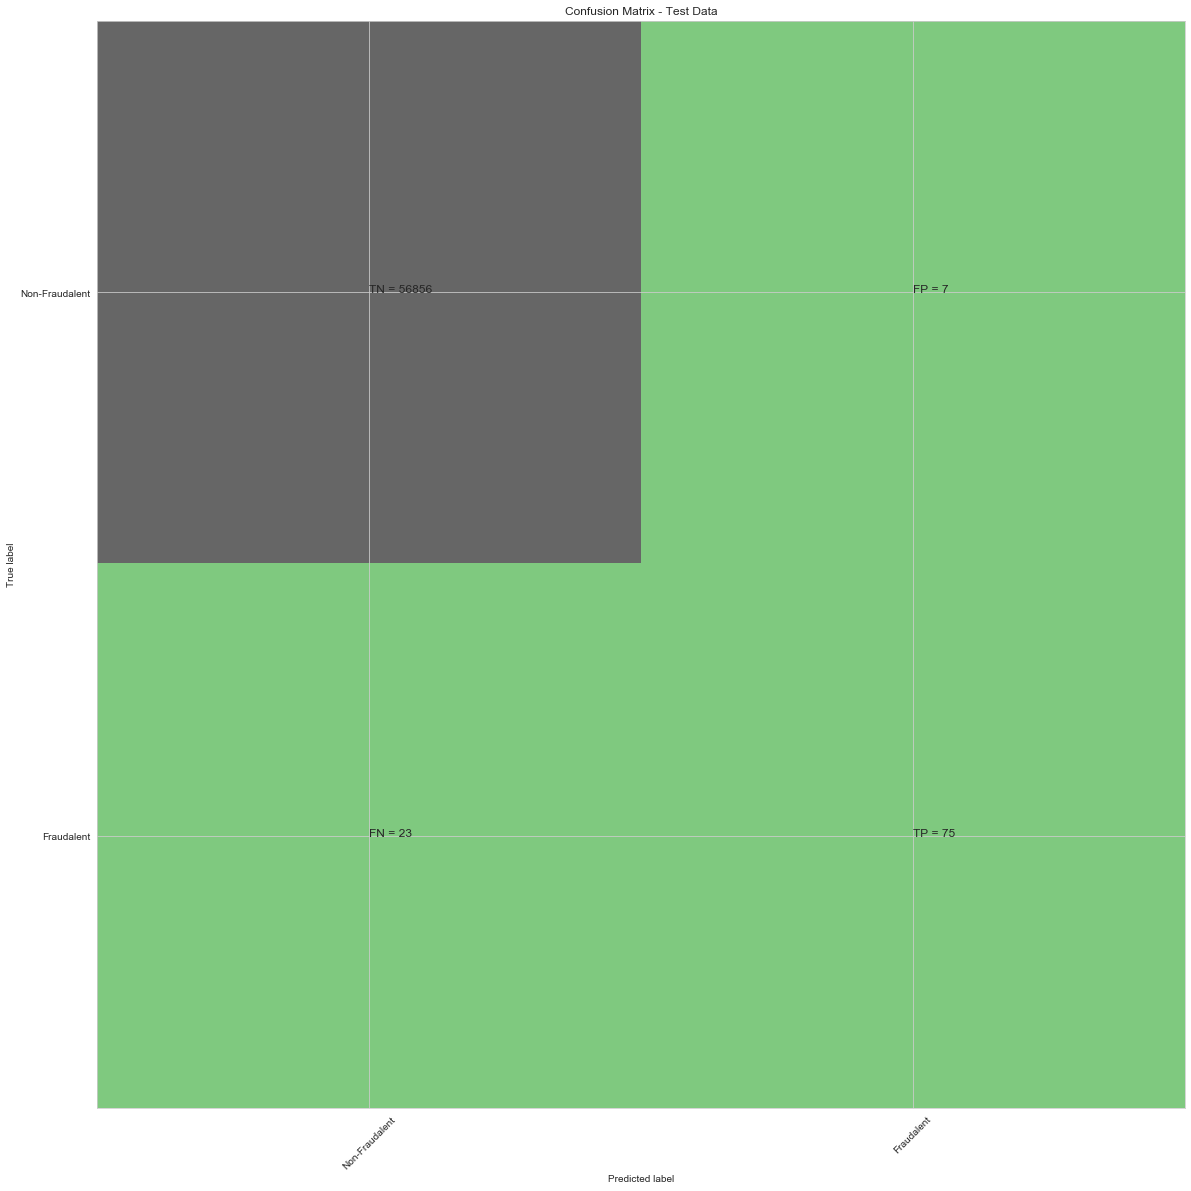

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9560013020912778
Random Forest threshold: 0.06
ROC for the test dataset 95.6%


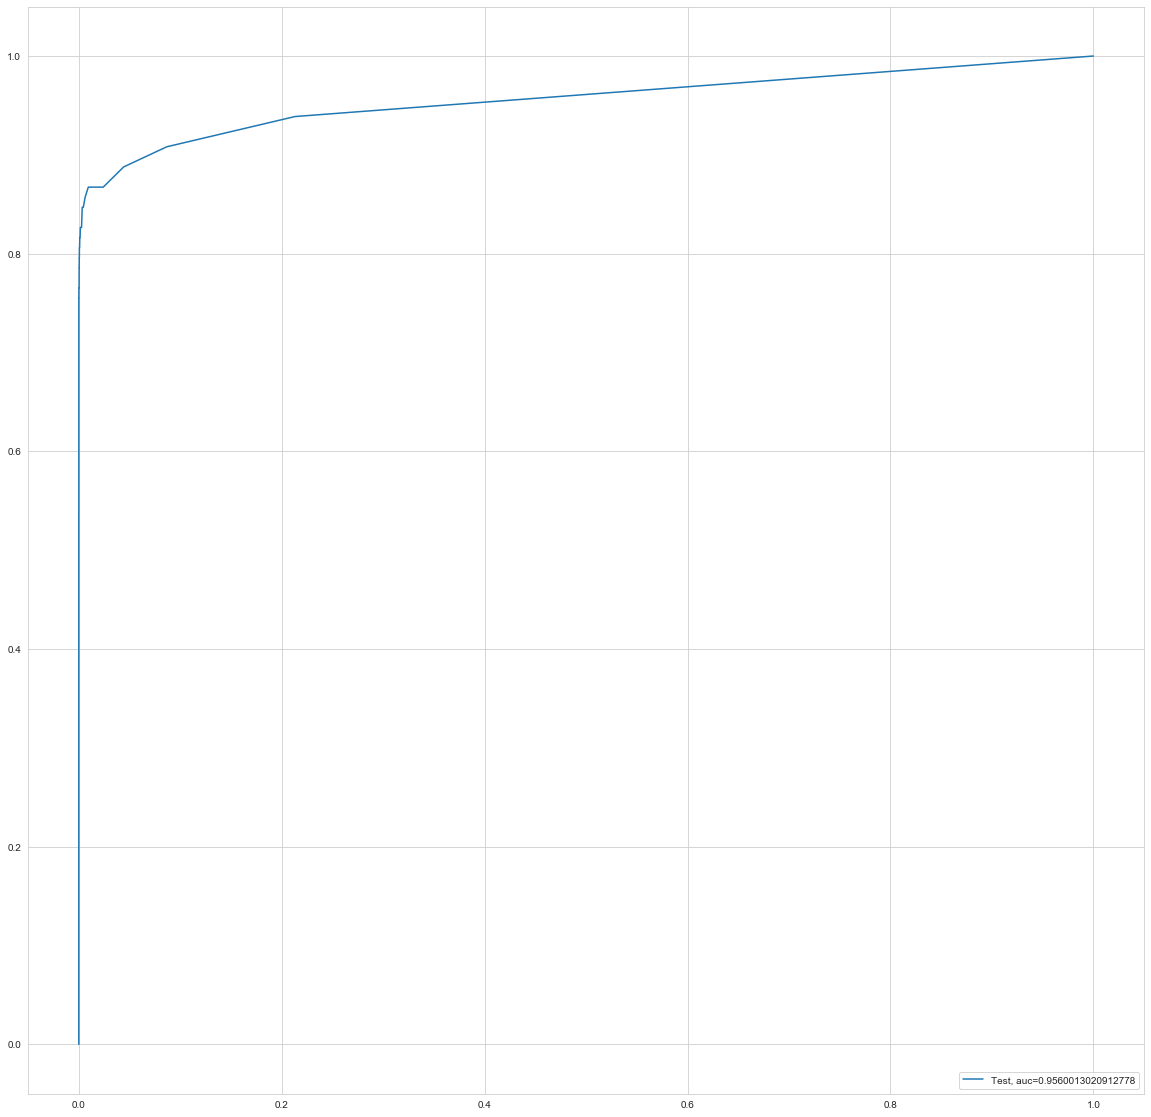

Time Taken by Model: --- 281.2135877609253 seconds ---
--------------------------------------------------------------------------------


In [78]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = executeRandomForestModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run XGBoost Model

XGBoost Model
Model Accuracy: 0.9993855444953564
Confusion Matrix


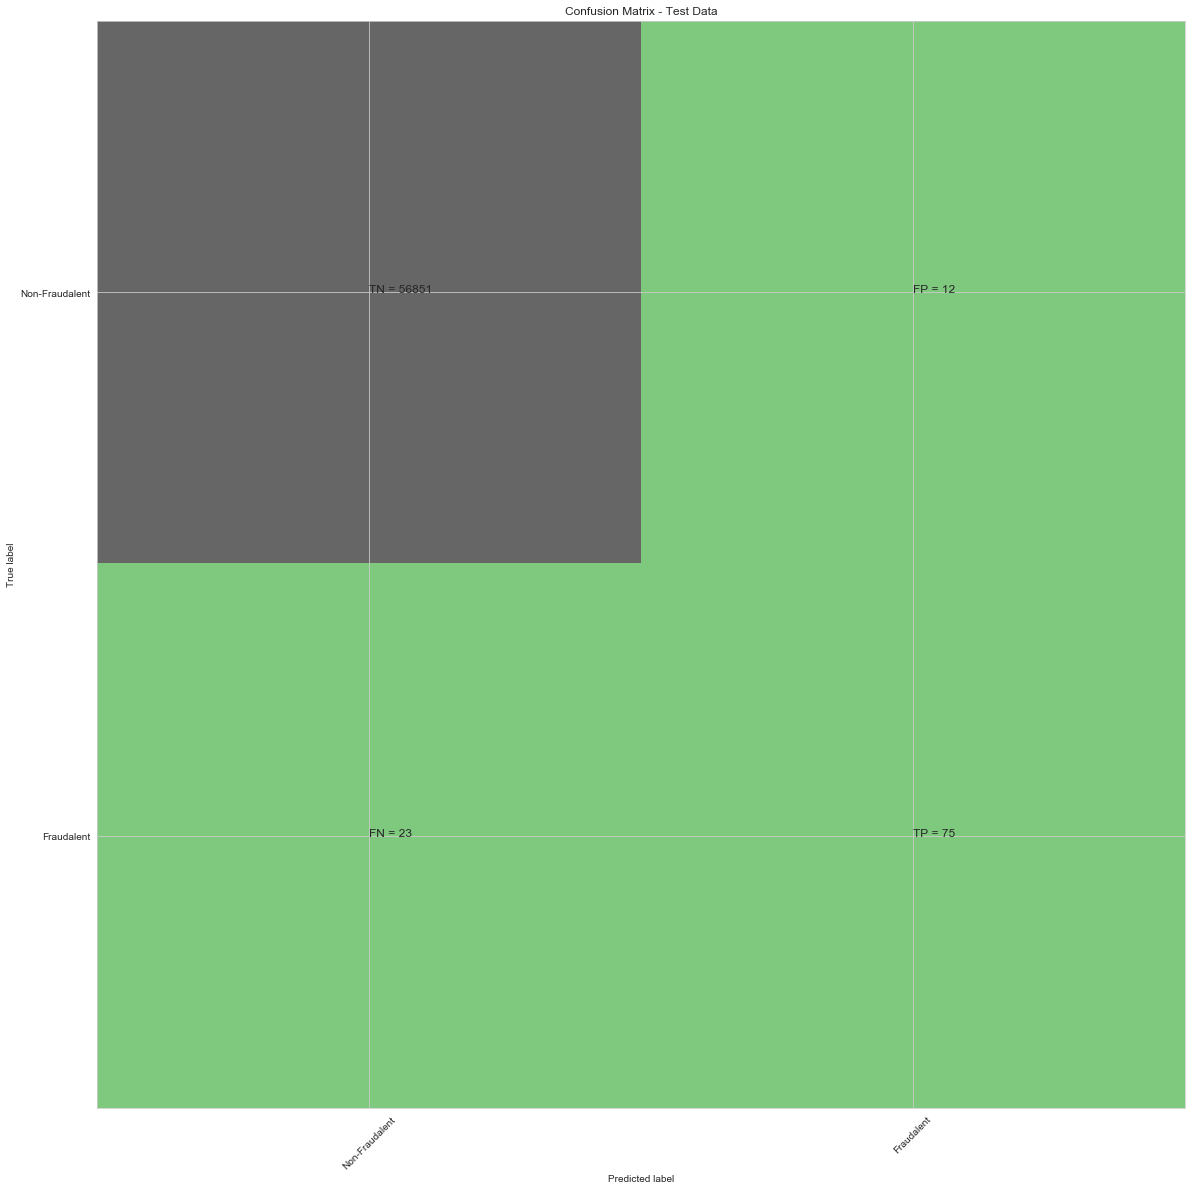

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.77      0.81        98

    accuracy                           1.00     56961
   macro avg       0.93      0.88      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9685563619253866
XGBoost threshold: 0.00012325310672167689
ROC for the test dataset 96.9%


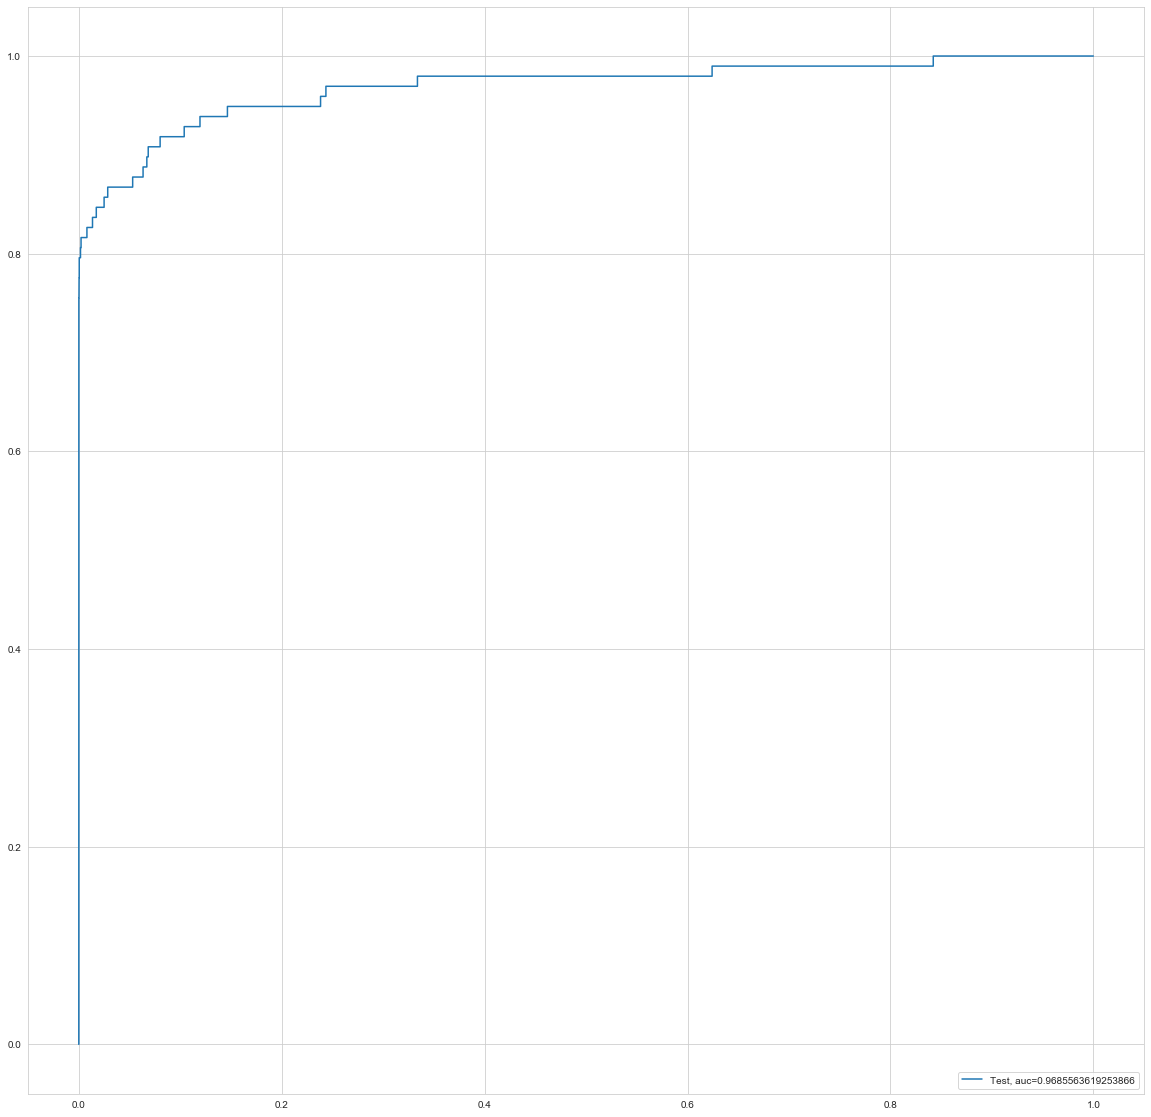

Time Taken by Model: --- 57.675238370895386 seconds ---
--------------------------------------------------------------------------------


In [79]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = executeXGBoostModel(df_Results, Data_Imbalance_Handling, X_train_Smote, y_train_Smote , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

##### Build models on other algorithms to see the better performing on SMOTE

In [80]:
# Display the results of all the models
df_Results

,Accuracy,Data_Imbalance_Handiling,Data_Imbalance_Handling,Model,roc_value,threshold
0,0.998999,Power Transformer,NaN,Logistic Regression with L2 Regularisation,0.966806,0.001289
1,0.998841,Power Transformer,NaN,Logistic Regression with L1 Regularisation,0.963903,0.009276
2,0.999298,Power Transformer,NaN,KNN,0.900851,0.200000
3,0.998560,Power Transformer,NaN,SVM,0.891313,0.000731
4,0.998806,Power Transformer,NaN,Tree Model with gini criteria,0.859015,1.000000
5,0.999052,Power Transformer,NaN,Tree Model with entropy criteria,0.864337,1.000000
6,0.999350,Power Transformer,NaN,Random Forest,0.940564,0.010000
7,0.999456,Power Transformer,NaN,XGBoost,0.972998,0.000051
8,0.968470,Random Undersampling,NaN,Logistic Regression with L2 Regularisation,0.967666,0.350109
9,0.998315,Random Undersampling,NaN,Logistic Regression with L1 Regularisation,0.500000,1.500000


**Note: From Accuracy & ROC, `XGBoost` has provided the best results for SMOTE oversampling technique**

### Oversampling with  ADASYN Oversampling:

**Below steps are followed for ADASYN Oversampling method to handle the class imbalance:**

1. Display class distibution with and without the ADASYN Oversampling.

2. Use the oversampled with StratifiedKFold cross validation method to genearte Train And test datasets.
3. Compare the results and select model which provided best results for the ADASYN oversampling techinique.

<br>**Below steps will be followed after getting train and test dataset:**<br>
a. Logistic Regression with L2 Regularisation<br>
b. Logistic Regression with L1 Regularisation<br>
c. KNN<br>
d. Decision tree model with Gini criteria<br>
e. Decision tree model with Entropy criteria<br>
f. Random Forest<br>
g. XGBoost<br>

### Print the class distribution after applying ADASYN

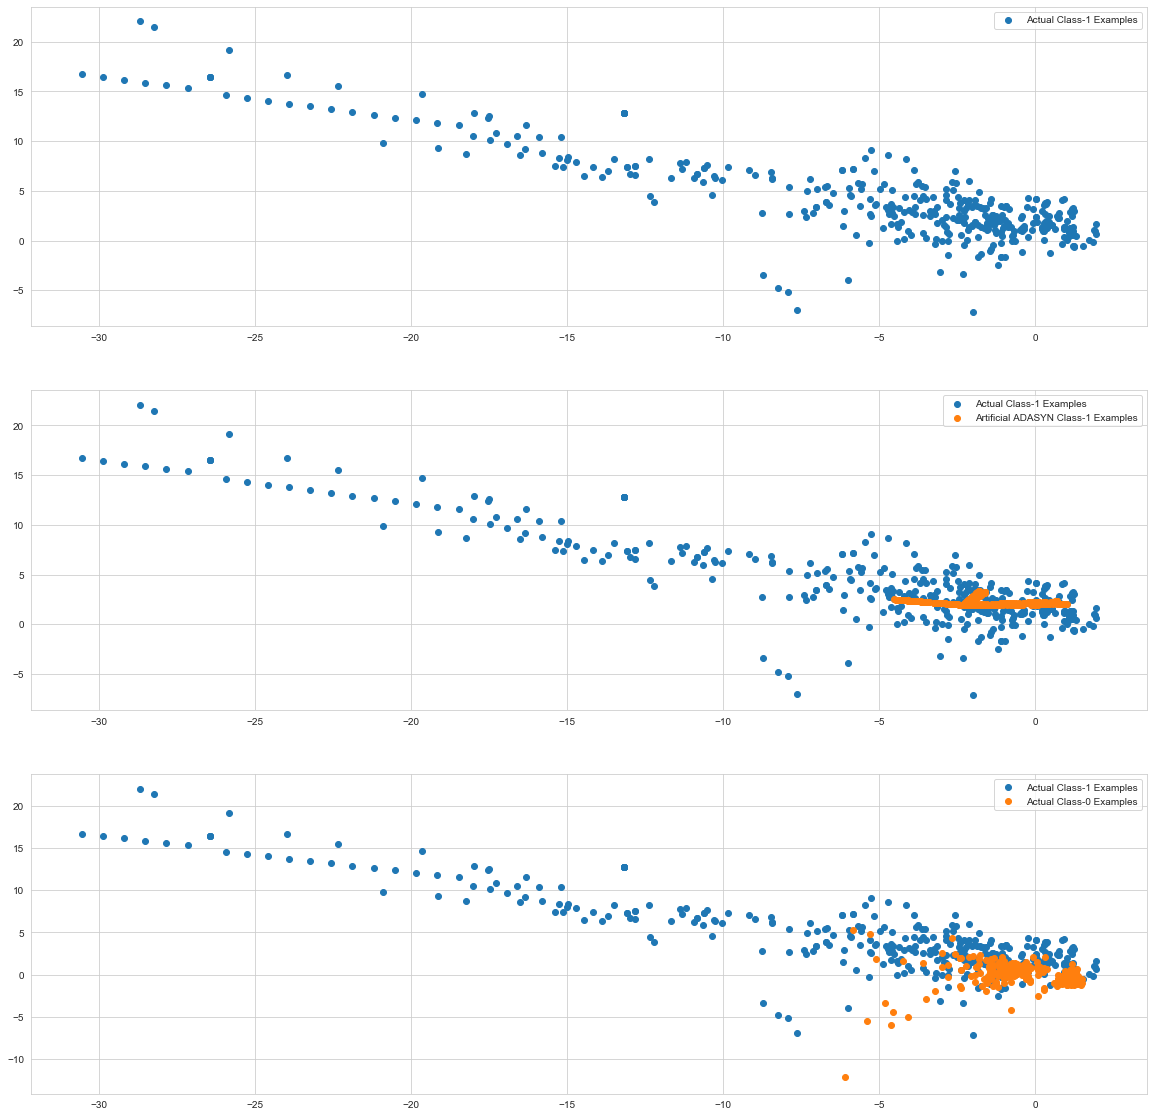

In [81]:
import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import ADASYN

ADASYN = ADASYN(random_state=0)
X_train_ADASYN, y_train_ADASYN = ADASYN.fit_sample(X_train, y_train) 

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_ADASYN[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()


In [82]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE



In [83]:
# from sklearn.model_selection import StratifiedKFold
# from imblearn.over_sampling import SMOTE

skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
#     SMOTE = SMOTE(random_state=0)
    X_train_ADASYN, y_train_ADASYN= ADASYN.fit_sample(X_train, y_train)
  
#Create Dataframe for X_over
X_train_ADASYN = pd.DataFrame(data=X_train_ADASYN,   columns=cols)

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [84]:
Data_Imbalance_Handling = "ADASYN Oversampling with StratifiedKFold CV "

### Run Logistic Regression with L1 And L2 Regularisation

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.983783947183964
Max auc_roc for l1: 0.5
Parameters for l2 regularisations
[[ 0.99476634  1.03905187  0.86024698  0.95484795  0.78799241 -1.17974616
  -0.92065912 -0.58441277 -0.33935385 -0.90229373  0.80091303 -1.49807556
  -0.14135877 -1.97520727  0.13223025 -0.99855179 -1.12474925 -0.50087233
   0.37634185 -1.40576754 -0.18307198  0.72644535  0.65699188 -1.08097677
   0.69678735  0.19671736  0.1375748   1.28784734  0.01273722  0.04683057]]
[-5.43795676]
{1: array([[0.61021517, 0.63159046, 0.72080484, 0.87495728, 0.96155716,
        0.97622444, 0.97996651, 0.98264111, 0.98380941, 0.98416957,
        0.98421989, 0.98421989, 0.98421989, 0.98421989, 0.98421989,
        0.98421989, 0.98421989, 0.98421989, 0.98421989, 0.98421989],
       [0.61045493, 0.63159708, 0.71938814, 0.87086491, 0.9587103 ,
        0.97444715, 0.97873341, 0.9818356 , 0.98310342, 0.98346867,
        0.98351895, 0.98351895, 0.98351895, 0.98351895,

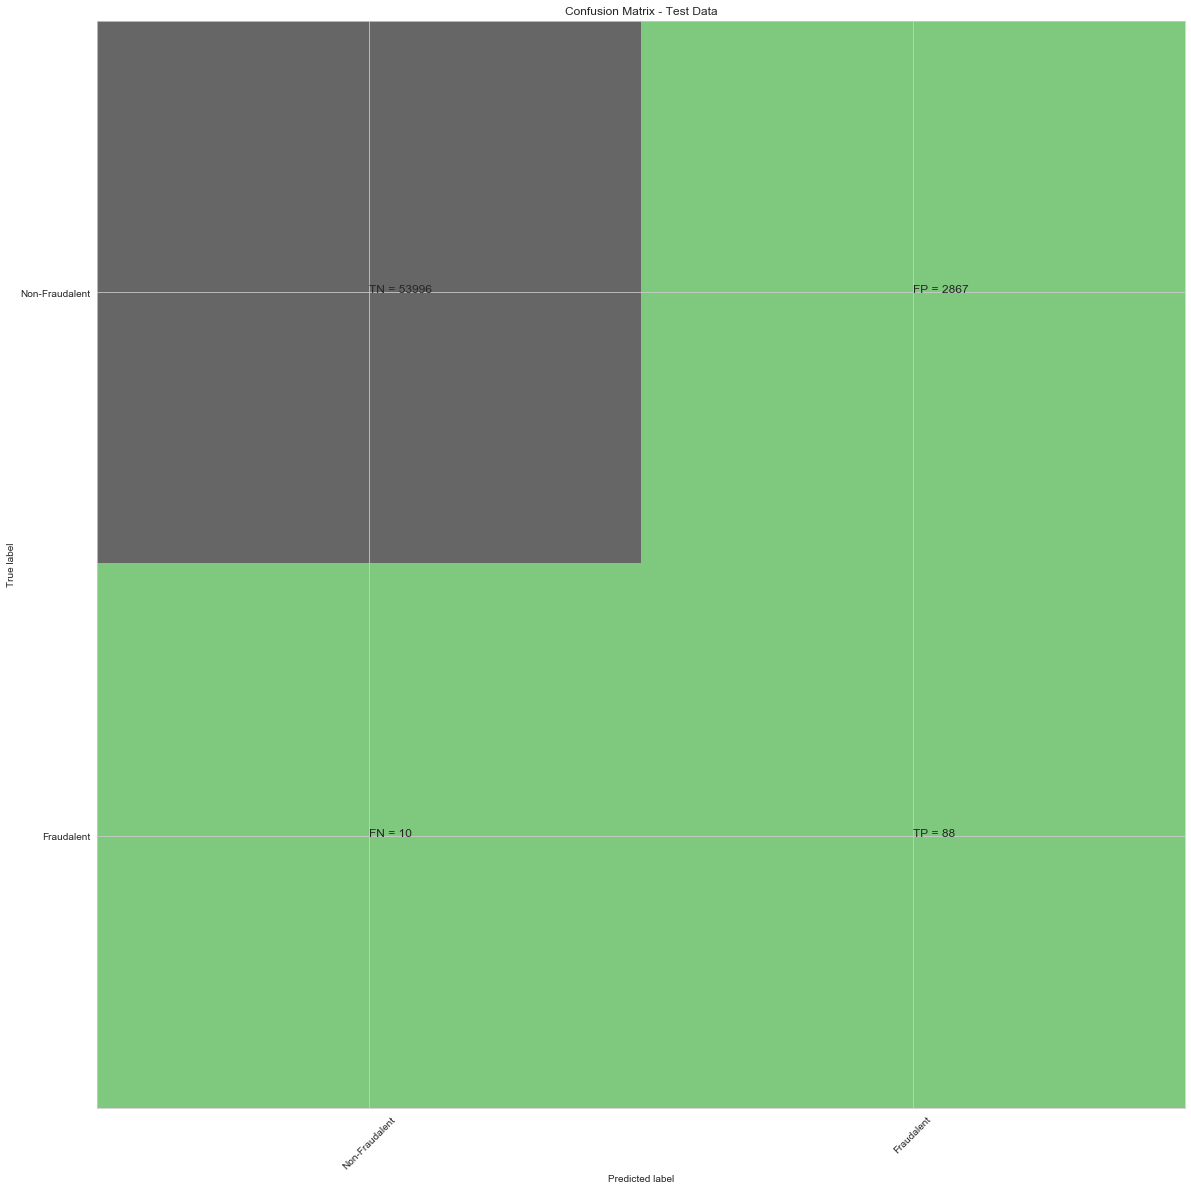

classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56863
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56961
   macro avg       0.51      0.92      0.52     56961
weighted avg       1.00      0.95      0.97     56961

Accuarcy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix


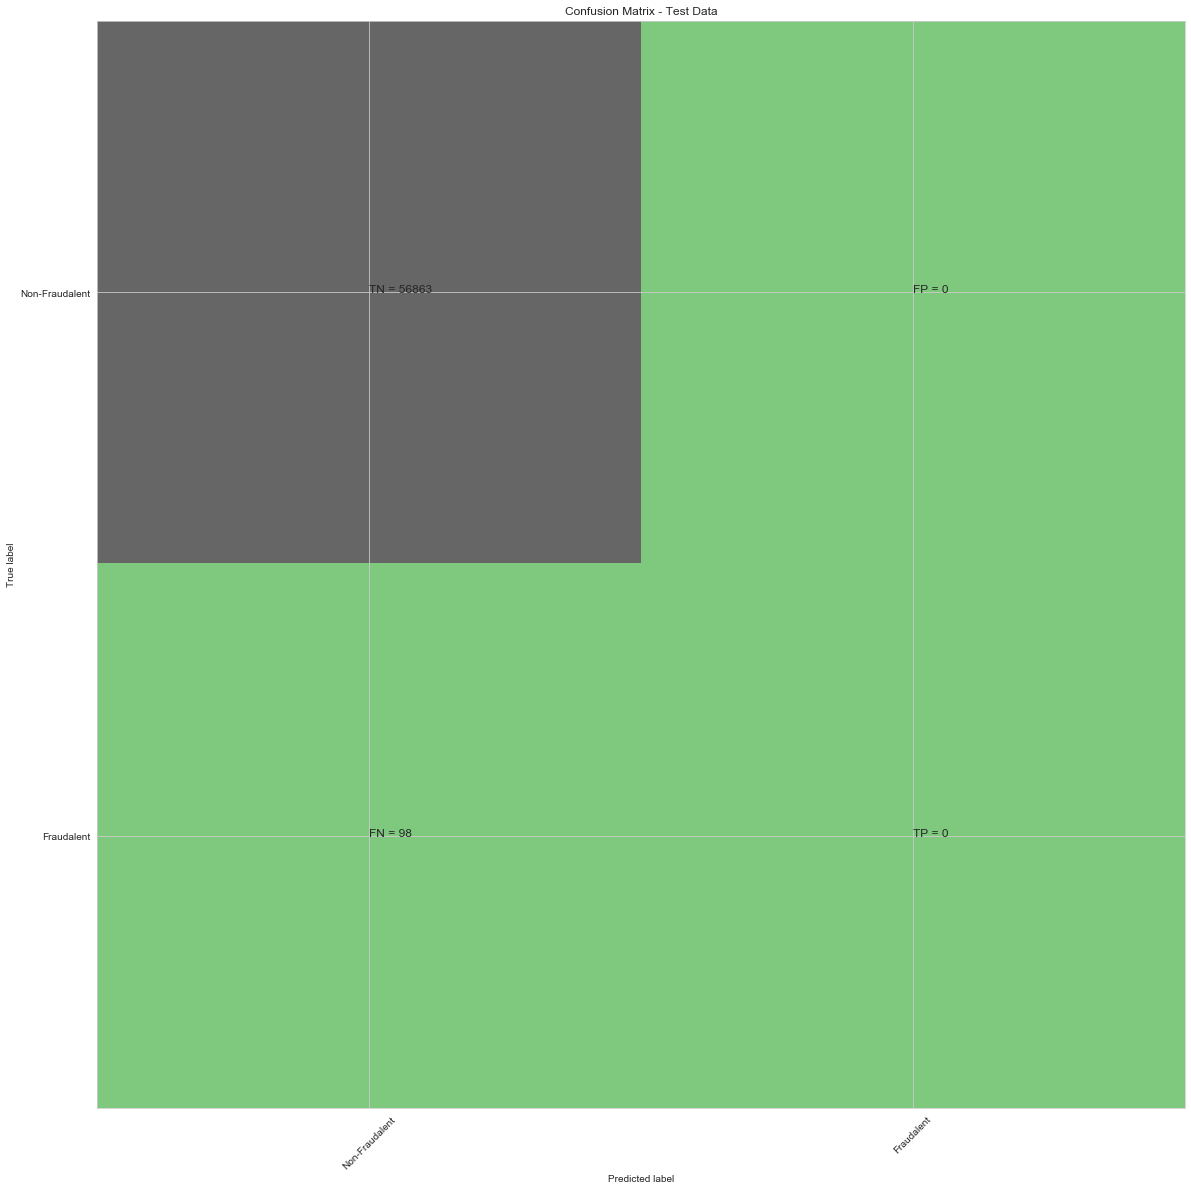

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.974373871033386
l2 threshold: 0.6510908358390133
ROC for the test dataset 97.4%


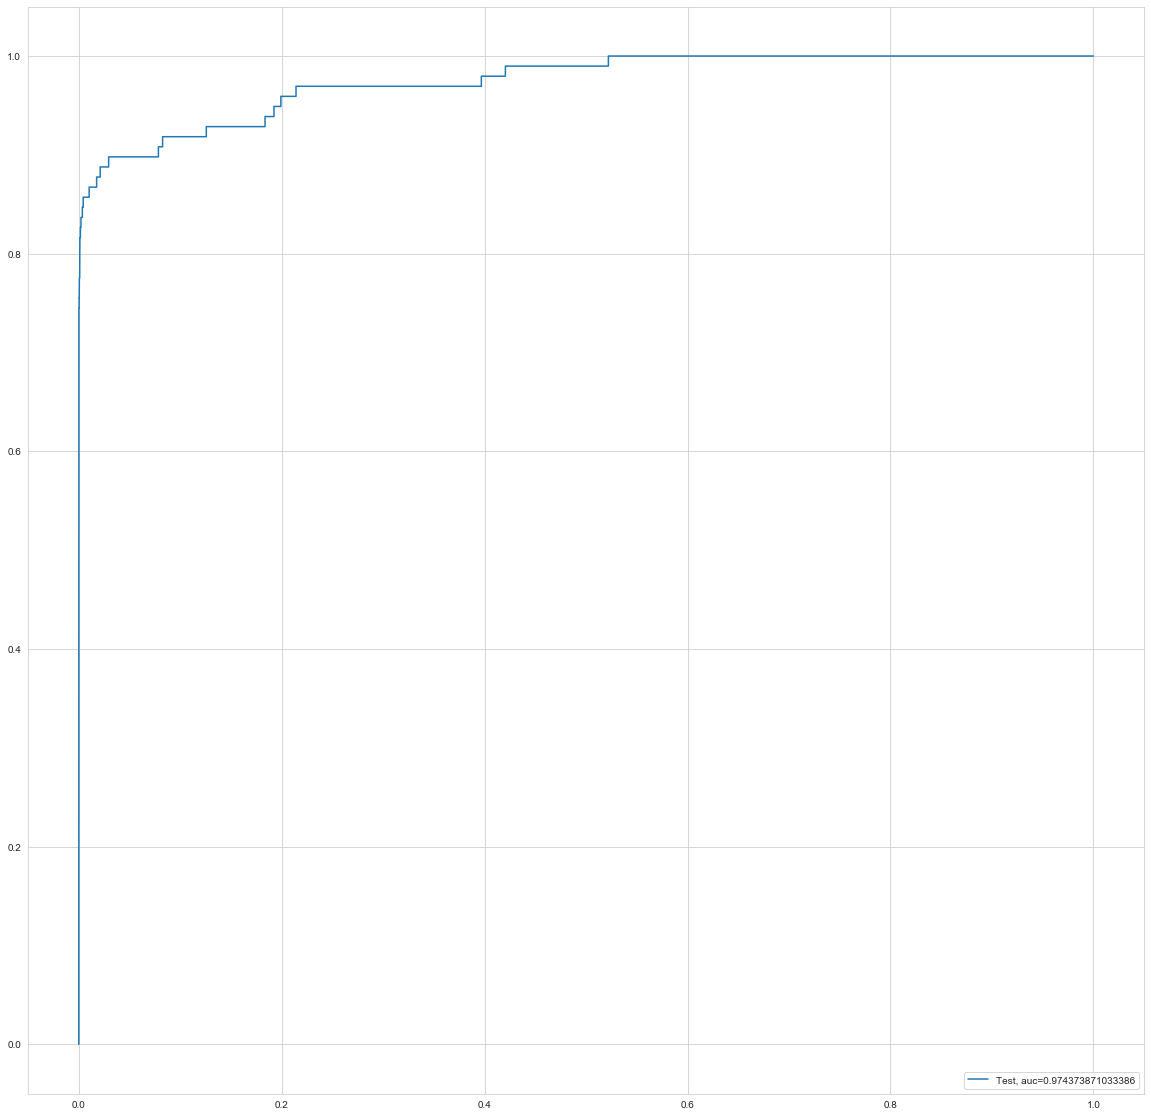

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


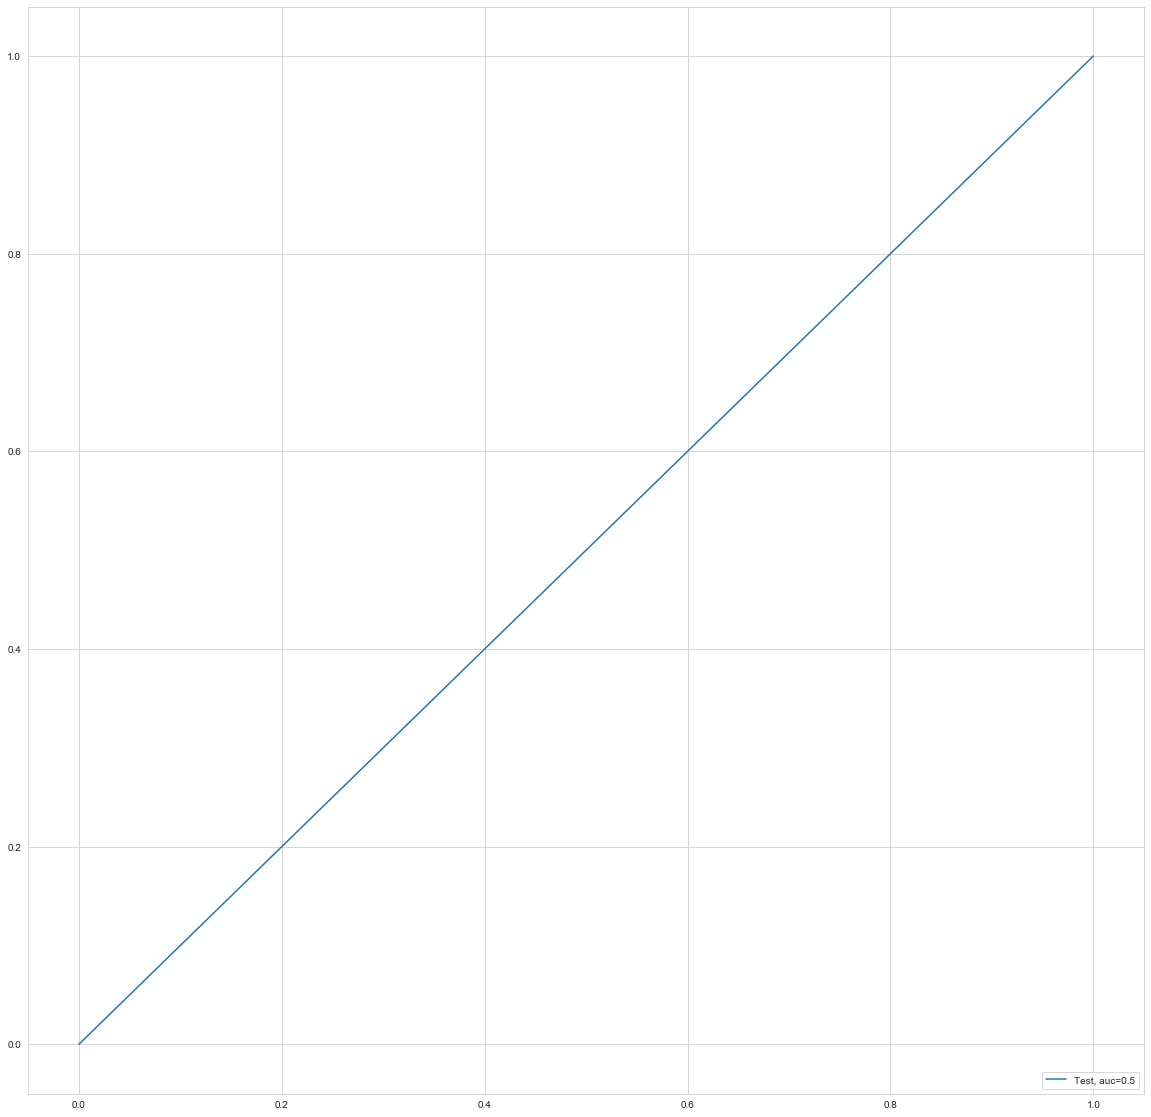

Time Taken by Model: --- 31664.561457395554 seconds ---
--------------------------------------------------------------------------------


In [85]:
#Run Logistic Regression with L1 And L2 Regularisation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
df_Results = executeLogisticRegressionModel(df_Results, Data_Imbalance_Handling, X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run KNN Model

KNN Model
model score
0.9942943417425958
Confusion Matrix


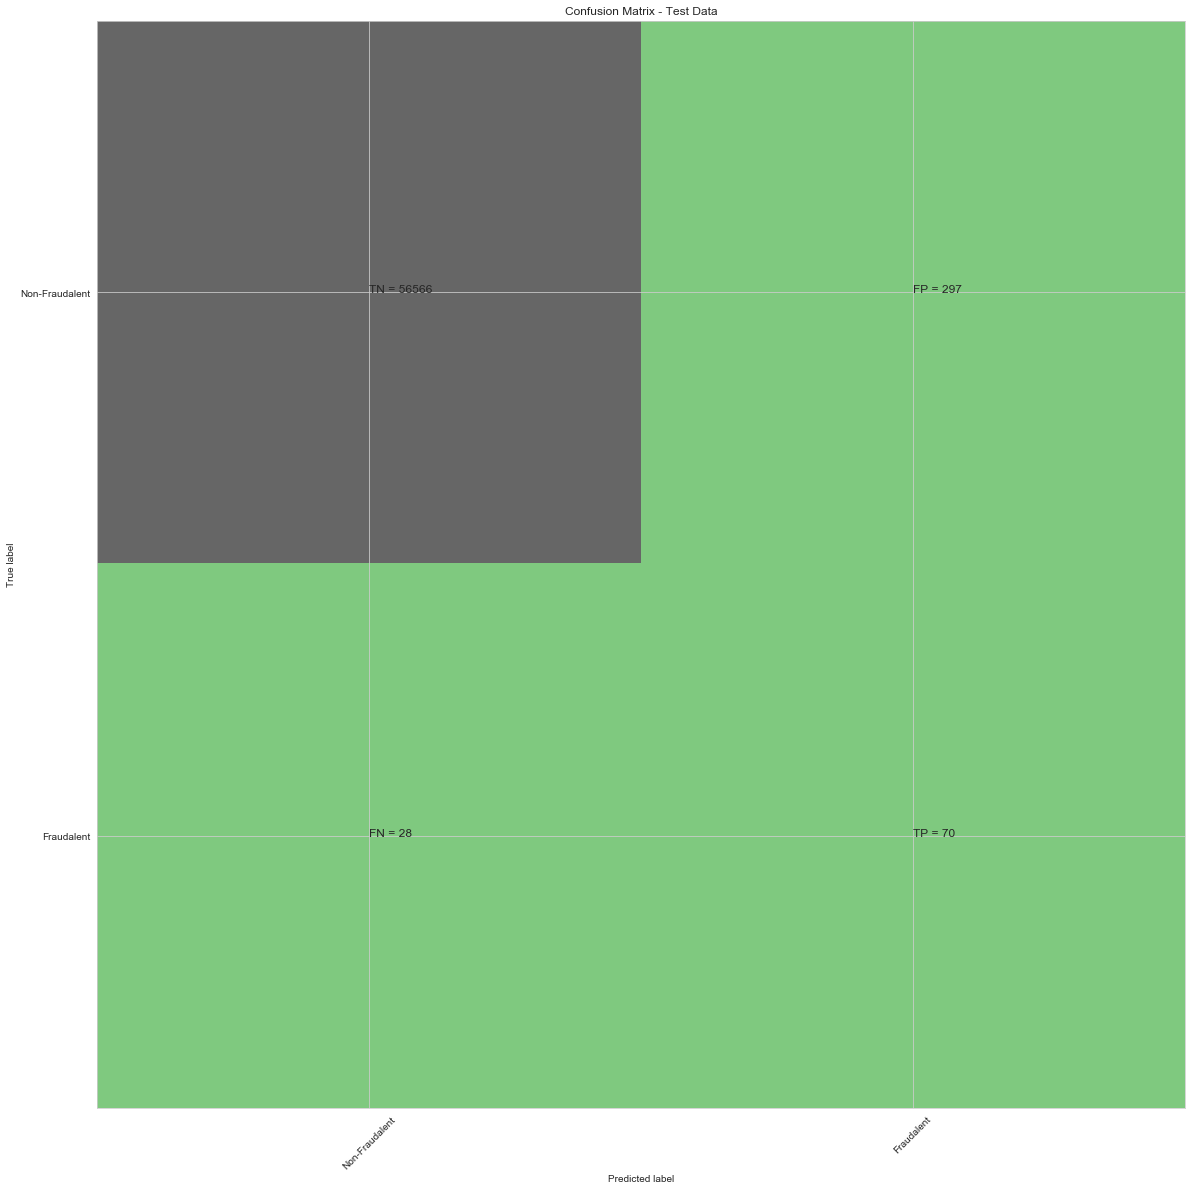

classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.71      0.30        98

    accuracy                           0.99     56961
   macro avg       0.60      0.85      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8601572630529446
KNN threshold: 0.4
ROC for the test dataset 86.0%


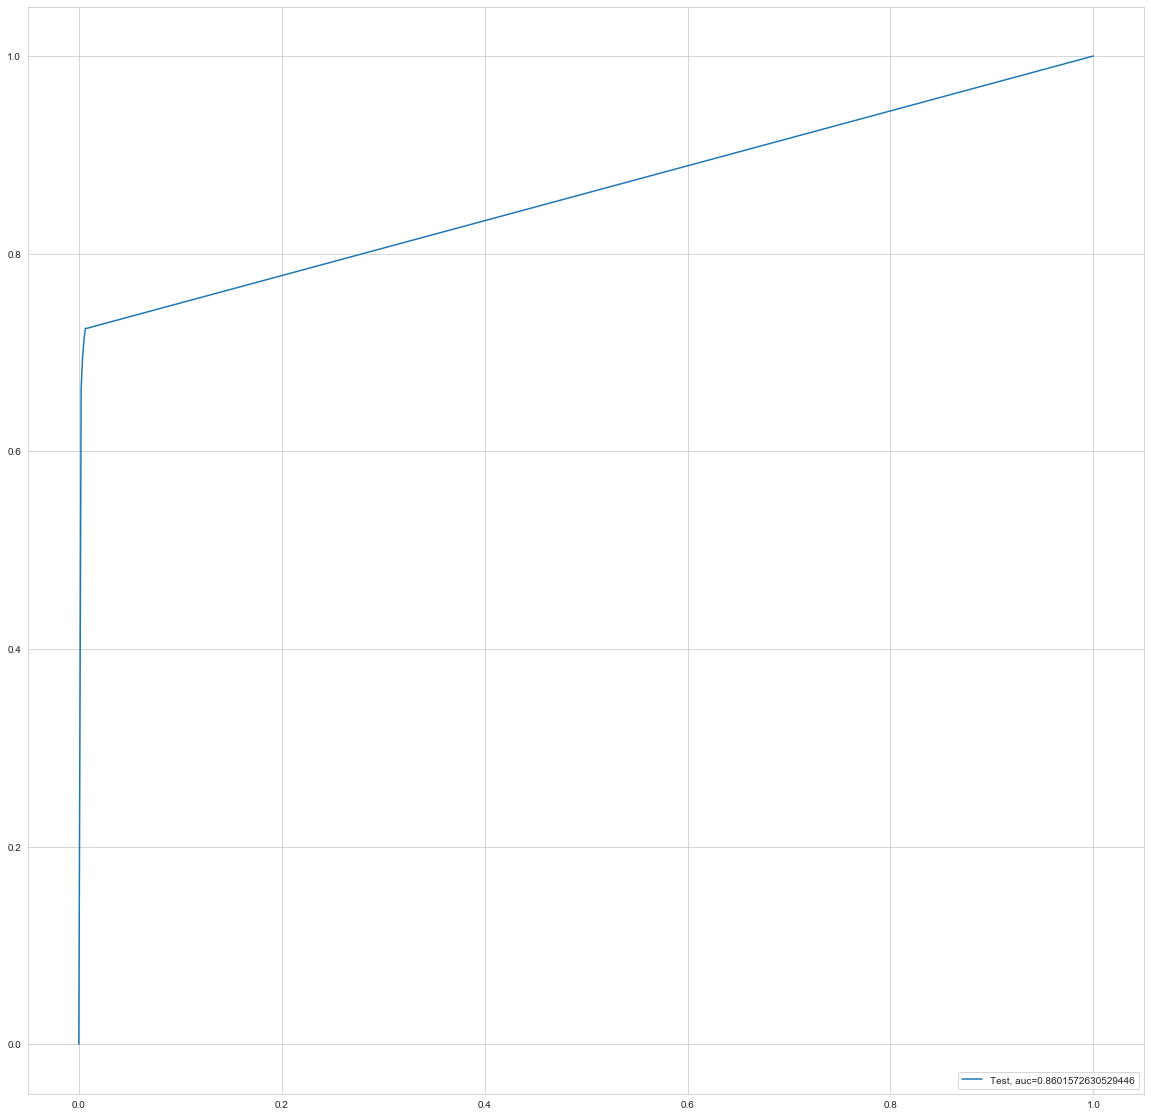

Time Taken by Model: --- 60.280749797821045 seconds ---
--------------------------------------------------------------------------------


In [86]:
#Run KNN Model
print("KNN Model")
start_time = time.time()
df_Results = executeKNNModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Decision Tree Model

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9968750548620986
Confusion Matrix


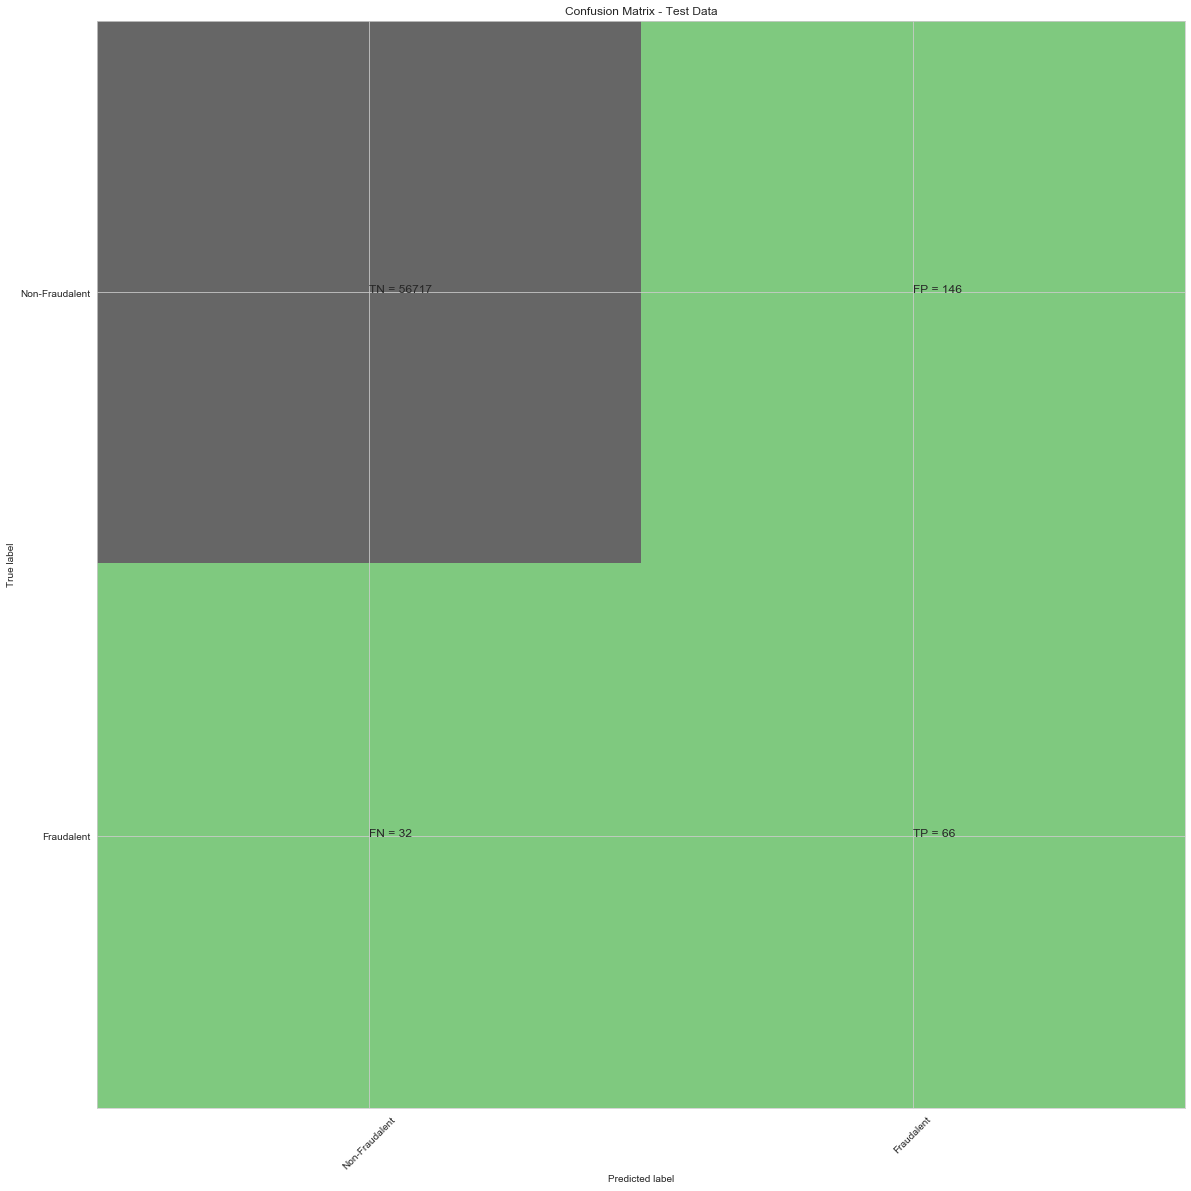

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.31      0.67      0.43        98

    accuracy                           1.00     56961
   macro avg       0.66      0.84      0.71     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8354509065290115
Tree threshold: 1.0
ROC for the test dataset 83.5%


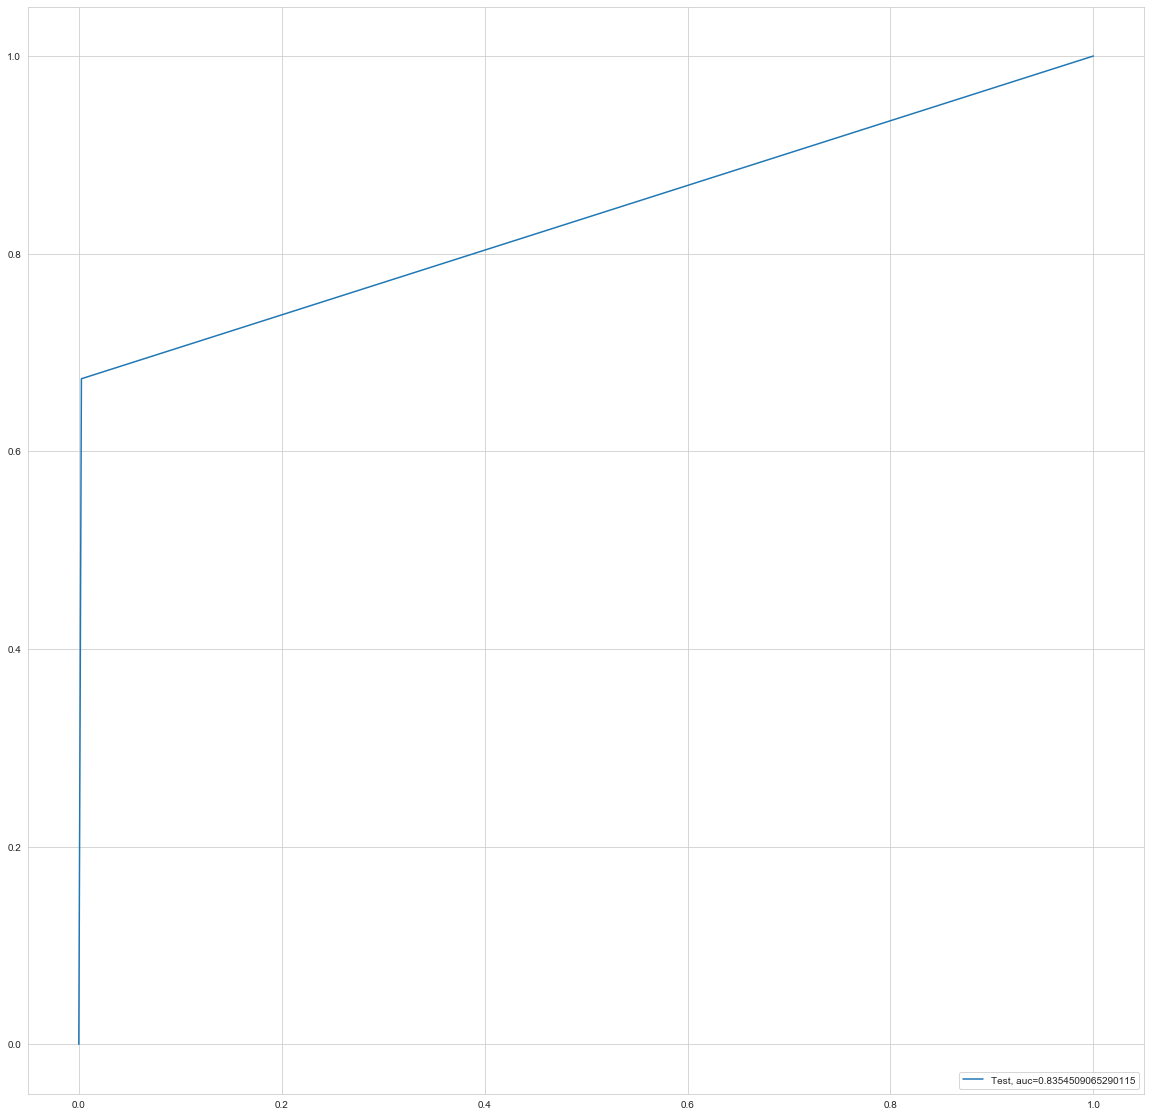

entropy score: 0.997910851284212
Confusion Matrix


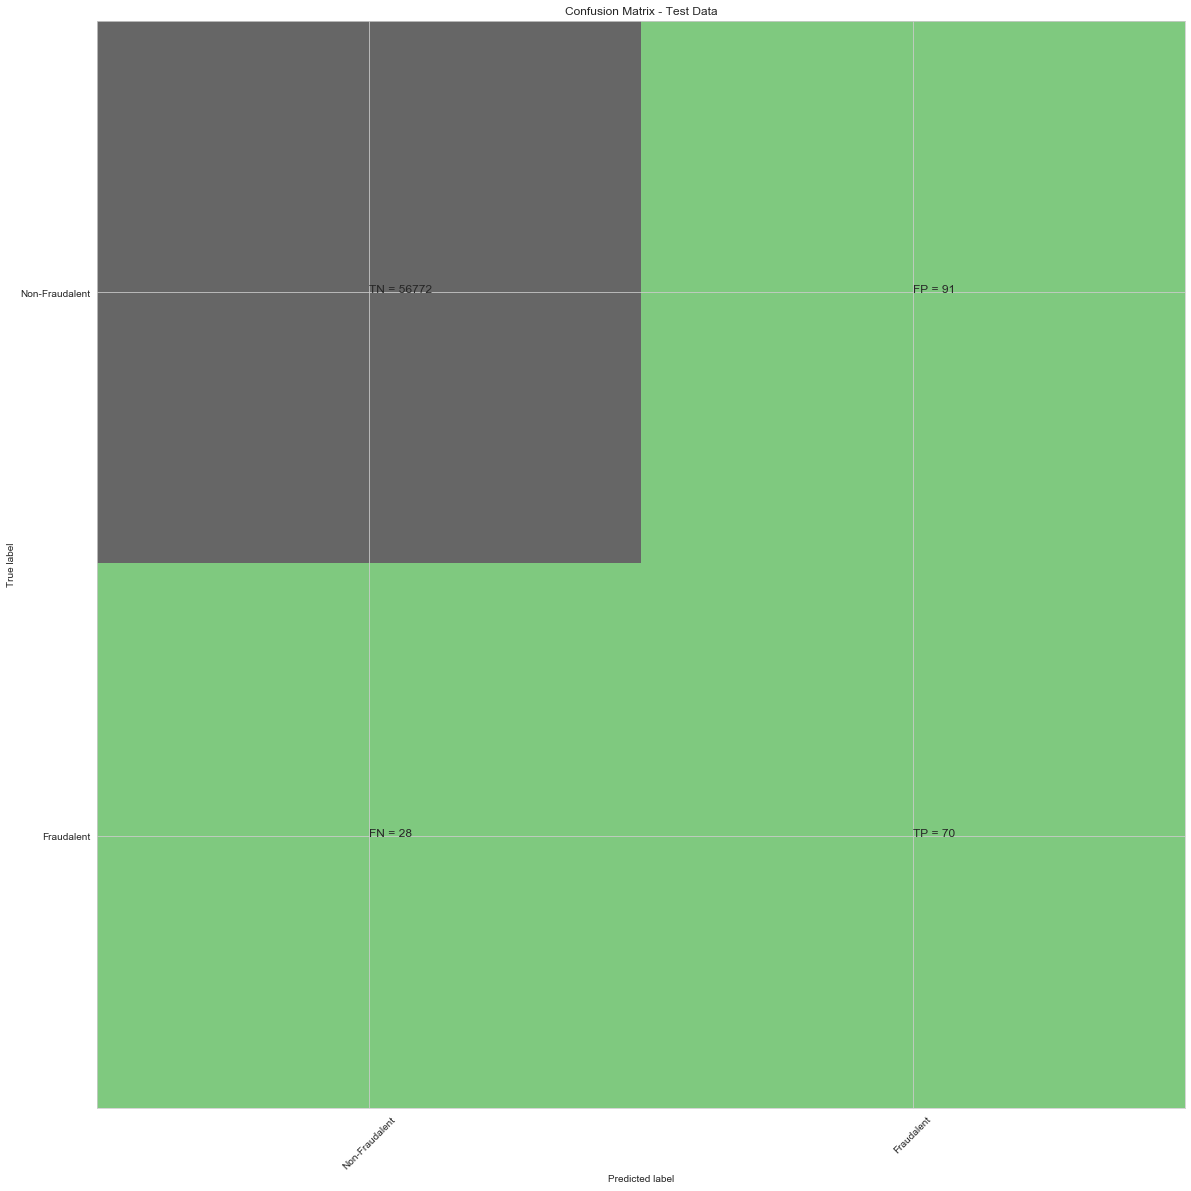

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.43      0.71      0.54        98

    accuracy                           1.00     56961
   macro avg       0.72      0.86      0.77     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8563426883160278
Tree threshold: 1.0
ROC for the test dataset 85.6%


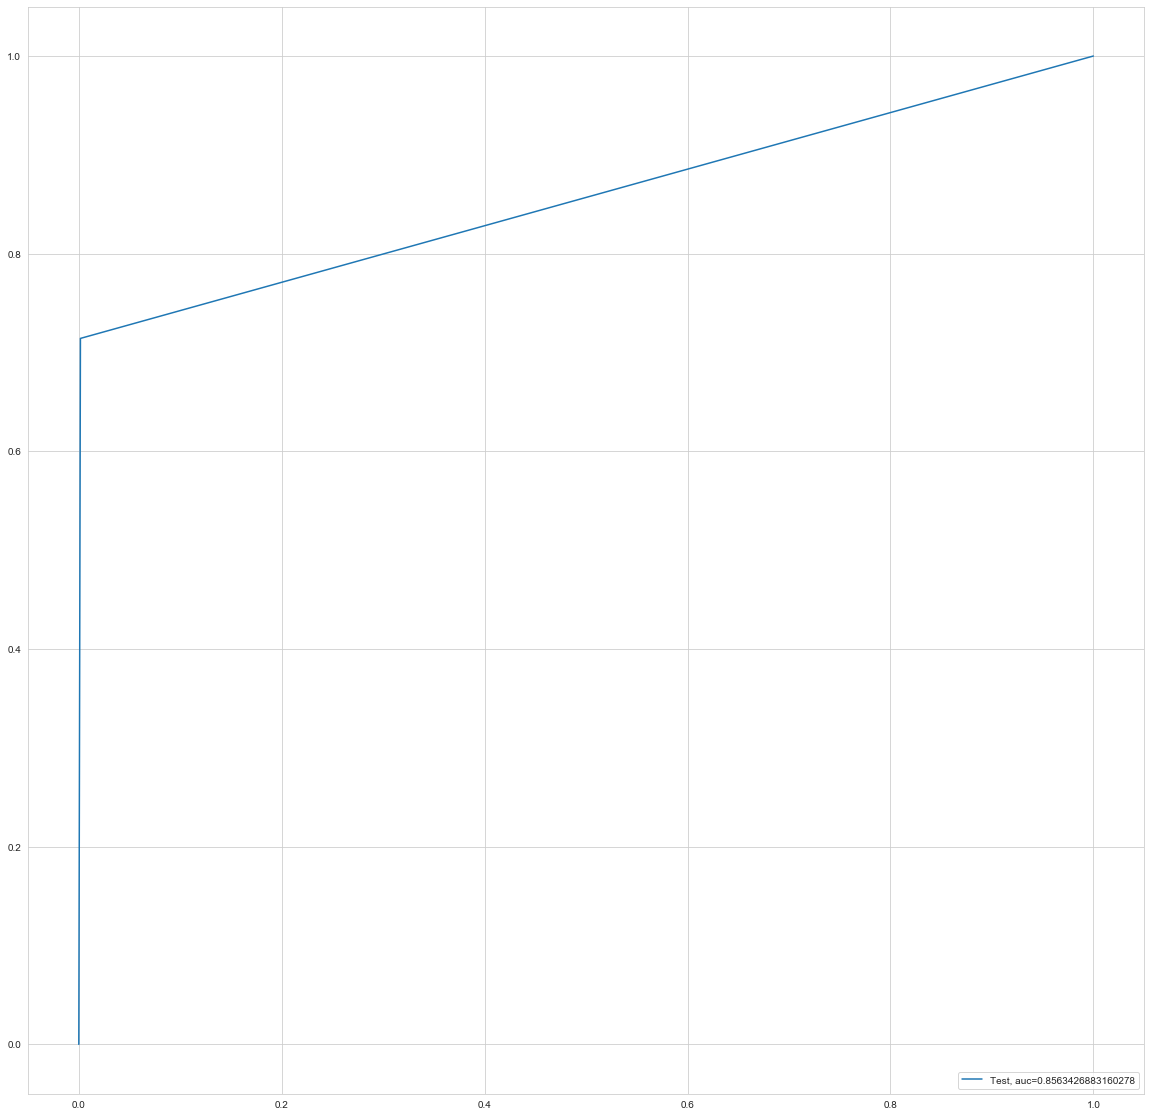

Time Taken by Model: --- 73.57405853271484 seconds ---
--------------------------------------------------------------------------------


In [87]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
df_Results = executeDecisionTreeModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run Random Forest Model

Random Forest Model
Model Accuracy: 0.9995084355962852
Confusion Matrix


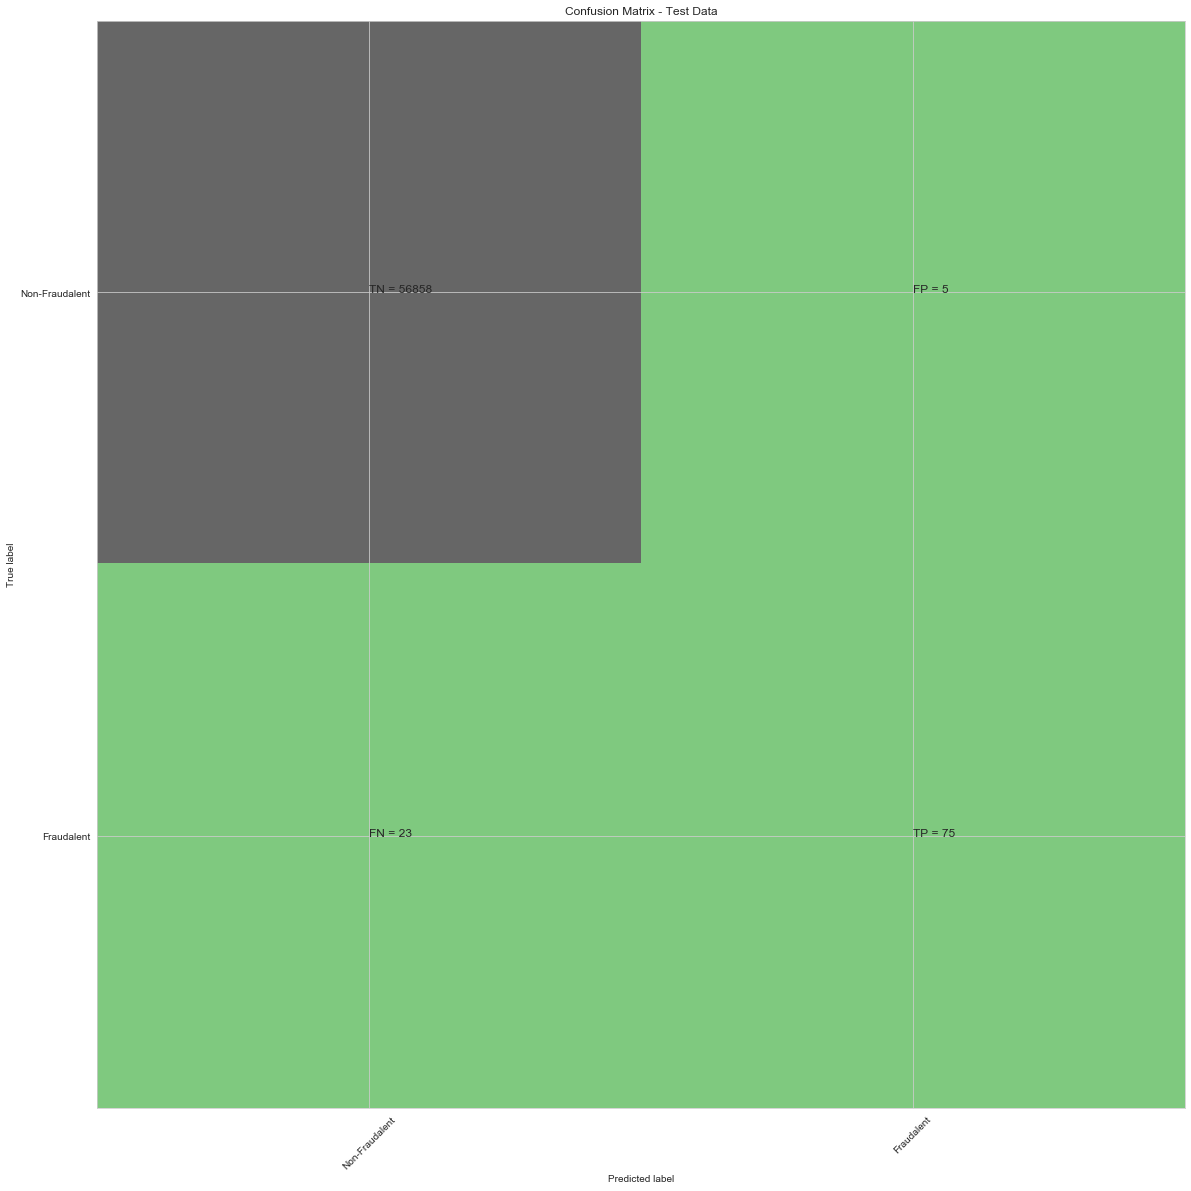

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9696085686793929
Random Forest threshold: 0.04
ROC for the test dataset 97.0%


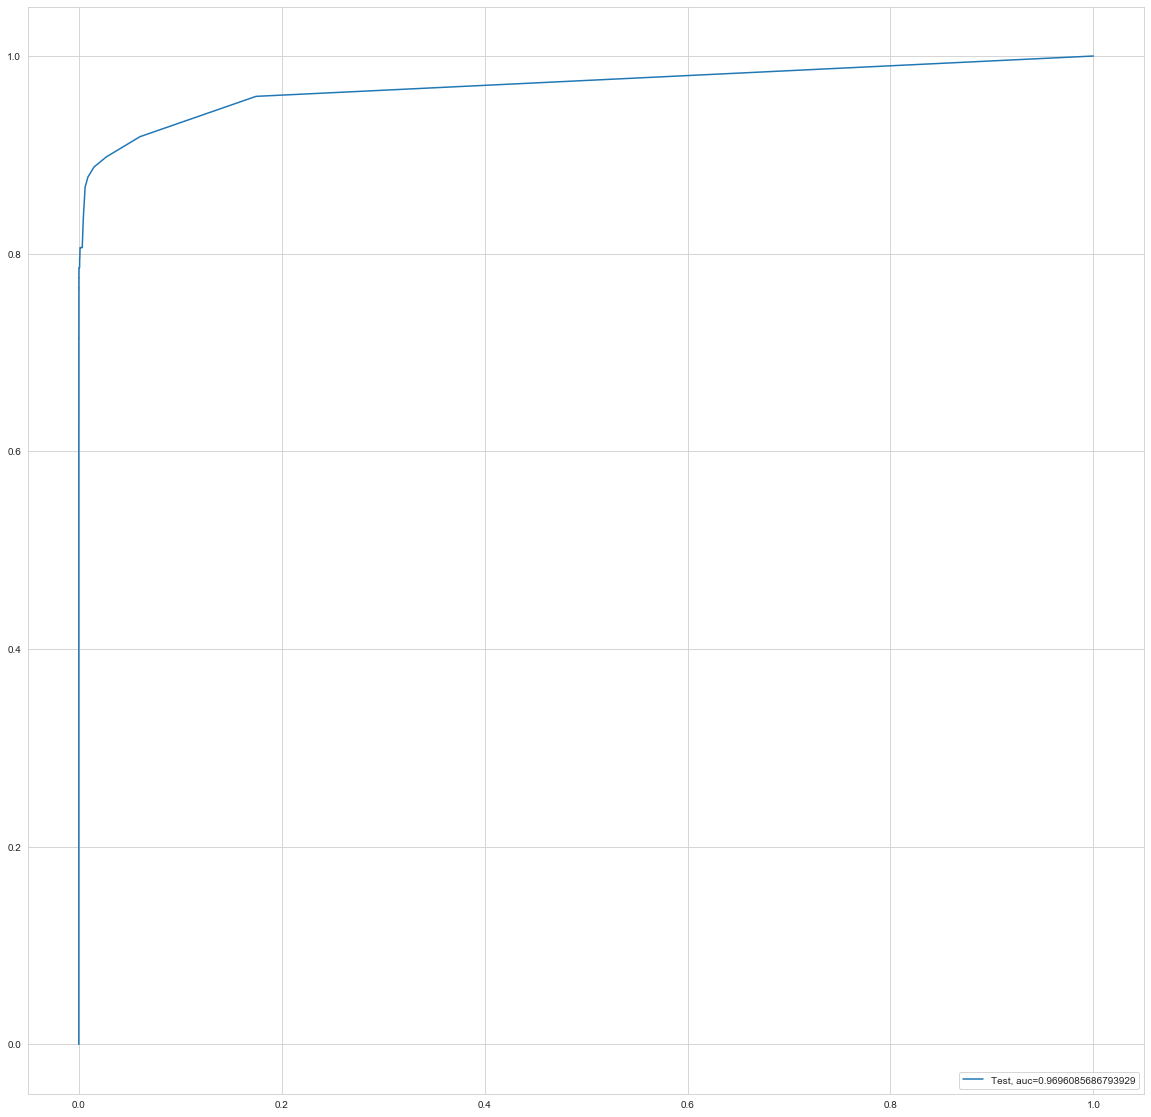

Time Taken by Model: --- 358.48912286758423 seconds ---
--------------------------------------------------------------------------------


In [88]:
#Run Random Forest Model
print("Random Forest Model")
start_time = time.time()
df_Results = executeRandomForestModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

### Run XGBoost Model

XGBoost Model
Model Accuracy: 0.9994031003669177
Confusion Matrix


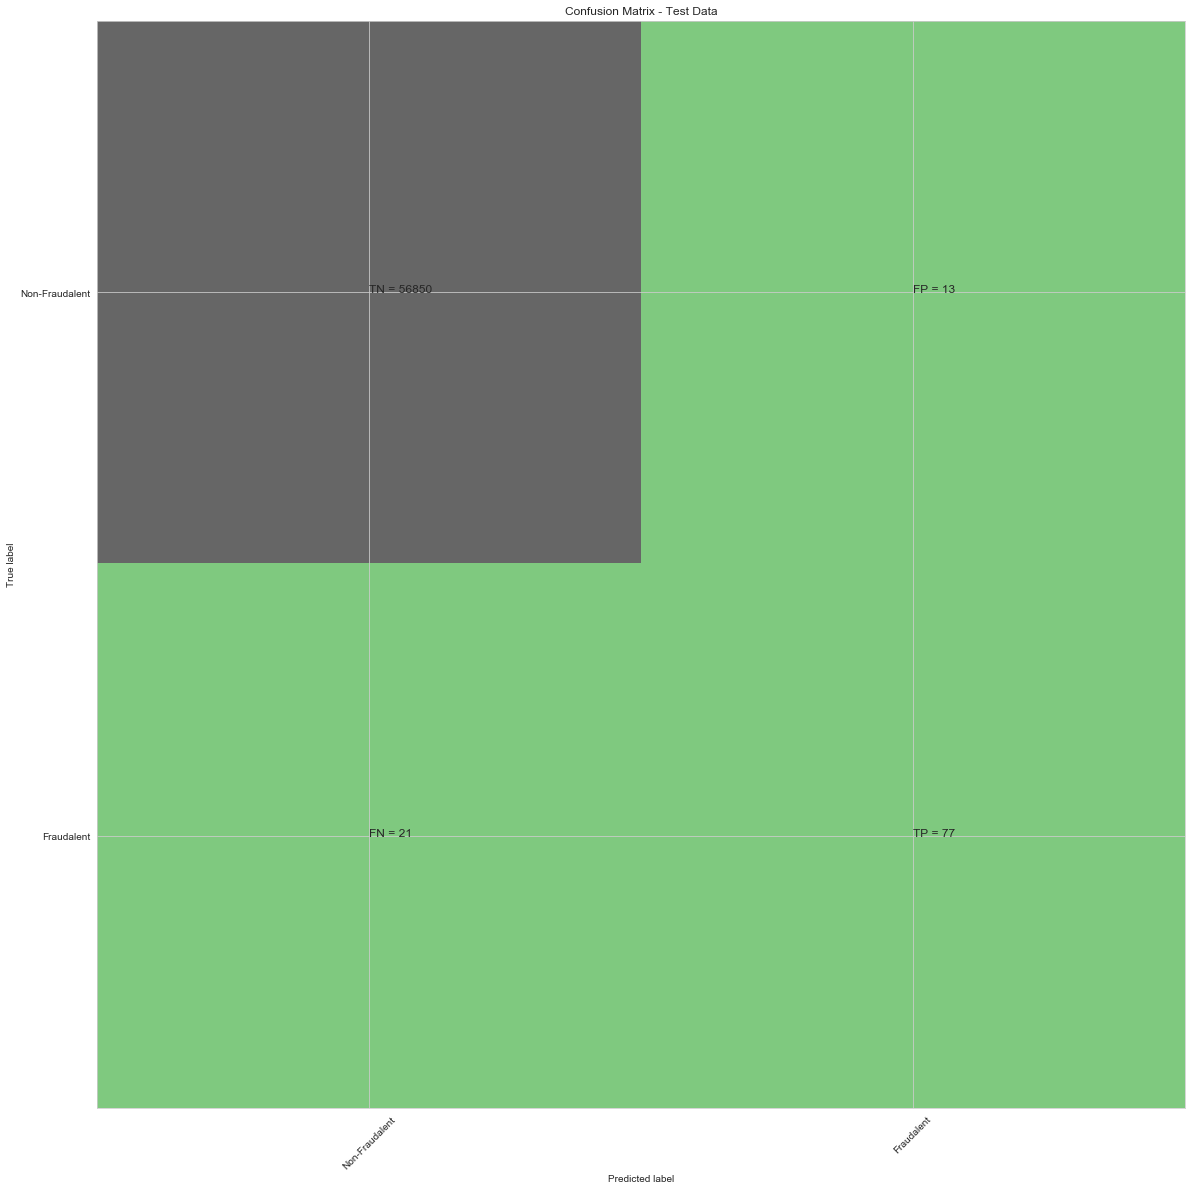

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.79      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9644957608458855
XGBoost threshold: 0.0005427341093309224
ROC for the test dataset 96.4%


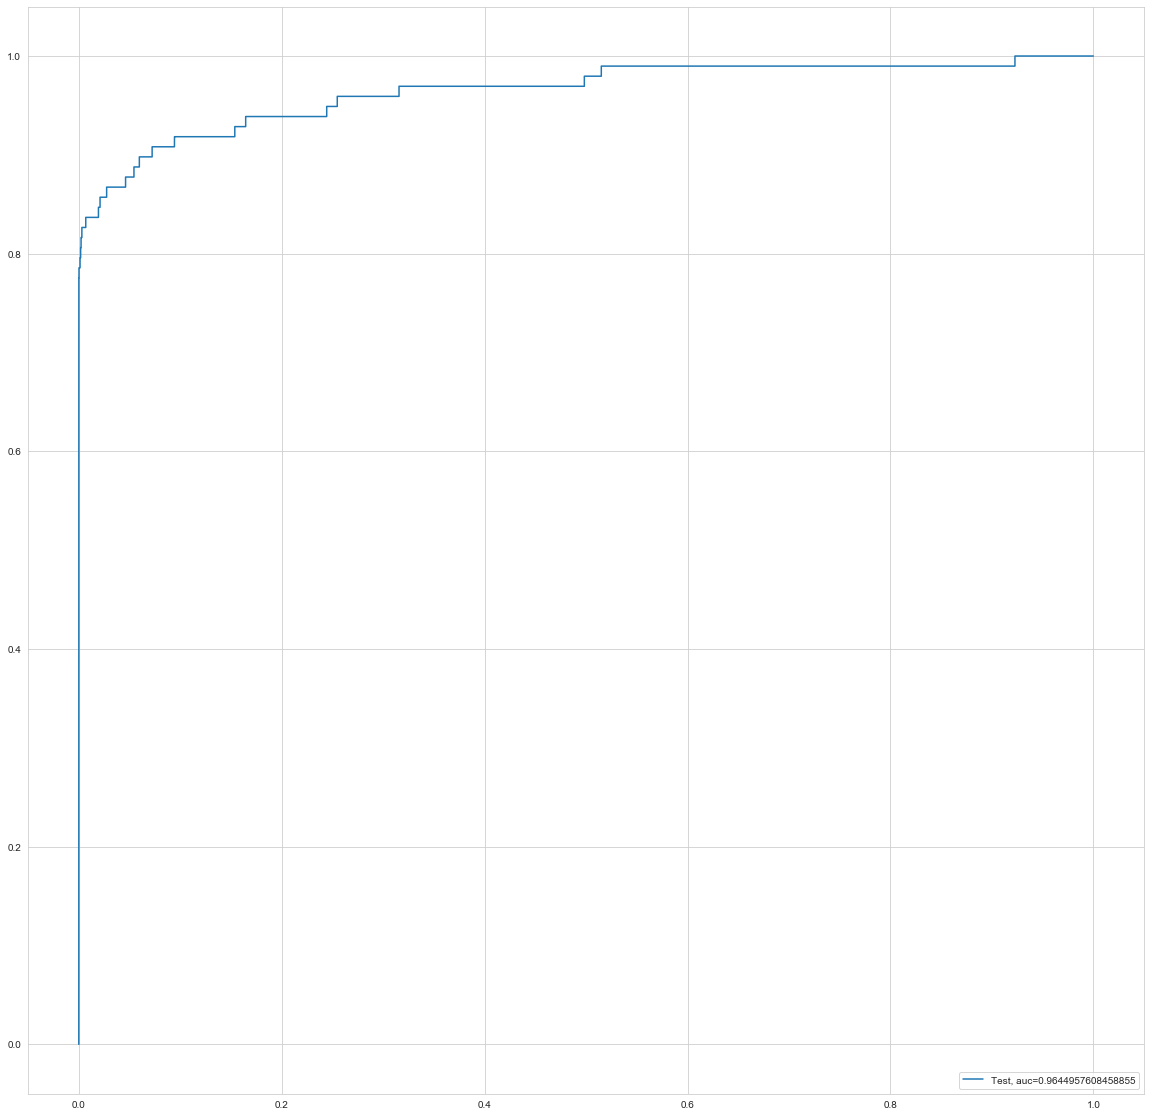

Time Taken by Model: --- 64.93562960624695 seconds ---
--------------------------------------------------------------------------------


In [89]:
#Run XGBoost Model
print("XGBoost Model")
start_time = time.time()
df_Results = executeXGBoostModel(df_Results, Data_Imbalance_Handling,X_train_ADASYN, y_train_ADASYN , X_test, y_test)
print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))
print('-'*80 )

In [90]:
df_Results

,Accuracy,Data_Imbalance_Handiling,Data_Imbalance_Handling,Model,roc_value,threshold
0,0.998999,Power Transformer,NaN,Logistic Regression with L2 Regularisation,0.966806,0.001289
1,0.998841,Power Transformer,NaN,Logistic Regression with L1 Regularisation,0.963903,0.009276
2,0.999298,Power Transformer,NaN,KNN,0.900851,0.200000
3,0.998560,Power Transformer,NaN,SVM,0.891313,0.000731
4,0.998806,Power Transformer,NaN,Tree Model with gini criteria,0.859015,1.000000
5,0.999052,Power Transformer,NaN,Tree Model with entropy criteria,0.864337,1.000000
6,0.999350,Power Transformer,NaN,Random Forest,0.940564,0.010000
7,0.999456,Power Transformer,NaN,XGBoost,0.972998,0.000051
8,0.968470,Random Undersampling,NaN,Logistic Regression with L2 Regularisation,0.967666,0.350109
9,0.998315,Random Undersampling,NaN,Logistic Regression with L1 Regularisation,0.500000,1.500000


## Results for ADASYN  Oversampling: 

The XGBoost has provided better results for ADASYN oversampling technique by looking at the Accuracy and ROC value. 

## Overall conclusion on Oversampled data: 

The XGBOOST model with Random Oversampling with StratifiedKFold CV gives the better results. The results can be further improved by tuning the hyperparameter.


**We can also notice that Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.**

In [91]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9995259914678464
XGboost roc_value: 0.9822923840939572
XGBoost threshold: 0.00030710414284840226


In [92]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(random_state=42)

In [93]:
#Lets tune XGBoost Model for max_depth and min_child_weight
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 81.15302024,  72.69756393,  81.19009757, 124.94692869,
         122.06615934, 123.65151763, 169.060817  , 173.68144197,
         175.37950435, 208.3400537 , 203.92332897, 184.58134232]),
  'std_fit_time': array([ 5.0984119 ,  1.61363792,  5.01250975,  4.75350603,  2.67135511,
          3.23670104,  4.22841887,  5.16076124,  2.05127031,  2.02140594,
          2.41157355, 17.05769853]),
  'mean_score_time': array([0.24056826, 0.23678093, 0.26121597, 0.39158497, 0.40169778,
         0.41177597, 0.47823172, 0.48564091, 0.49940543, 0.5309866 ,
         0.50218639, 0.43928661]),
  'std_score_time': array([0.00765339, 0.01194084, 0.01098169, 0.03082435, 0.01933344,
         0.04008134, 0.03034365, 0.03883356, 0.05131262, 0.06620309,
         0.03439909, 0.0949131 ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False]

In [94]:
#Lets tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':range(60,150,20)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([42.79328661, 64.73478408, 80.27967525, 99.63455734, 99.54149346]),
  'std_fit_time': array([ 1.35229092,  2.31807992,  4.13840336,  4.53994844, 12.02377829]),
  'mean_score_time': array([0.17176261, 0.24369121, 0.28969789, 0.32465234, 0.32383561]),
  'std_score_time': array([0.02621812, 0.02338303, 0.05859992, 0.01941262, 0.05223643]),
  'param_n_estimators': masked_array(data=[60, 80, 100, 120, 140],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 60},
   {'n_estimators': 80},
   {'n_estimators': 100},
   {'n_estimators': 120},
   {'n_estimators': 140}],
  'split0_test_score': array([0.99822905, 0.99902728, 0.99926027, 0.99933108, 0.99940855]),
  'split1_test_score': array([0.99926367, 0.99968136, 0.99983511, 0.99991997, 0.99994569]),
  'split2_test_score': array([0.99301381, 0.99744119, 0.998712  , 0.99926646, 0.99947064]),
  'split3_test_score': array([0.99865479, 0

In [95]:
# We will narror down the tunned parameters of max_depth ,  min_child_weight and n_estimators
#Tune XGBoost Model for n_estimators with 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 parameters 

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'n_estimators':[110,120,130],
  'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 54.79219561,  67.64277153,  71.40179853,  59.30697842,
          71.26781869,  75.78063431,  64.23657646,  70.01469479,
          72.05554228,  93.54263573,  95.33768473, 102.7380404 ,
          86.83771558,  94.090521  , 106.88274484,  96.29300785,
         101.56055446, 110.06555982, 128.4332499 , 127.93784132,
         132.98825259, 111.61671891, 123.4210186 , 793.5915504 ,
         110.02907085, 124.68972874, 121.92219033]),
  'std_fit_time': array([  2.48406715,   1.79741634,   3.14283228,   0.68738685,
           1.51386685,   2.51838566,   2.17679832,   2.32415494,
           2.70744584,   3.0414156 ,   3.12113533,   2.20943293,
           1.71239625,   1.49202114,   6.49176179,   2.11469332,
           0.56568168,   2.44841199,   2.6000776 ,   4.23845238,
           0.61797979,   1.97159009,   2.75489552, 332.52306513,
           3.57324512,   1.83028396,  10.77092284]),
  'mean_score_time': array([0.21132398, 0.2855566 , 0.27227273, 0.22006755, 0.271

In [96]:
# Narrow down the tunned parameters of max_depth ,  min_child_weight and n_estimators and tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'learning_rate':[0.05,0.1,0.125,0.15,0.2]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 124.82906013,  135.84508696,  133.28077011, 2804.97113075,
          112.77265472]),
  'std_fit_time': array([5.98988407e+00, 2.81466731e+00, 8.76966769e-01, 1.33654456e+03,
         1.78138978e+01]),
  'mean_score_time': array([0.43058882, 0.3973496 , 0.41962261, 0.44692321, 0.40928121]),
  'std_score_time': array([0.03692643, 0.01310574, 0.03062911, 0.04854992, 0.07990267]),
  'param_learning_rate': masked_array(data=[0.05, 0.1, 0.125, 0.15, 0.2],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'learning_rate': 0.05},
   {'learning_rate': 0.1},
   {'learning_rate': 0.125},
   {'learning_rate': 0.15},
   {'learning_rate': 0.2}],
  'split0_test_score': array([0.99922398, 0.99943229, 0.99948671, 0.99948803, 0.99969627]),
  'split1_test_score': array([0.99988052, 0.99998743, 0.99999351, 0.99999919, 1.        ]),
  'split2_test_score': array([0.96643875, 0.99722072, 0.99681852, 0.996353

In [97]:
# Narrow down the tunned parameters of max_depth ,  min_child_weight and n_estimators and tune XGBoost Model for n_estimators
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
'gamma':[i/10.0 for i in range(0,5)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([124.67485271, 126.62505746, 129.53554311, 134.38175259,
         120.71221418]),
  'std_fit_time': array([ 2.19609895,  2.07605908,  4.89761781,  0.4017854 , 21.72702121]),
  'mean_score_time': array([0.48729725, 0.4027297 , 0.44557476, 0.46606398, 0.4090775 ]),
  'std_score_time': array([0.04778246, 0.01961522, 0.01231998, 0.03572354, 0.06627596]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.99969627, 0.99964666, 0.99963345, 0.99964698, 0.99962677]),
  'split1_test_score': array([1., 1., 1., 1., 1.]),
  'split2_test_score': array([0.99886492, 0.99750079, 0.99521121, 0.99635539, 0.99621544]),
  'split3_test_score': array([0.99992608, 0.99992905, 0.99995143, 0.99994912, 0.99994368]),
  'split4_test_

In [98]:
#Evaluate XGboost model
#Tune Learning Rate with 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 130 , gamma: 0.1 parameters
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999490879724724
XGboost roc_value: 0.9726006330288302
XGBoost threshold: 0.002827876014634967


In [99]:
# Narrow down the tunned parameters of max_depth ,  min_child_weight and n_estimators and tune XGBoost Model for n_estimators

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV 
param_test = {
 'subsample':[i/10.0 for i in range(7,10)],
 'colsample_bytree':[i/10.0 for i in range(7,10)]
}

gsearch1 = GridSearchCV(estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_over, y_over)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([ 89.56647277,  94.16749401,  91.34229245, 105.13933625,
         143.71776562, 112.44706502, 117.89271817, 122.25264997,
         112.20708561]),
  'std_fit_time': array([ 3.85961154,  4.99498433,  1.65196395,  1.61922492, 16.8537944 ,
          1.00582857,  0.89334779,  1.64662022, 17.45589905]),
  'mean_score_time': array([0.53361821, 0.43607898, 0.44791555, 0.46839905, 0.44321523,
         0.52199736, 0.49992847, 0.52207422, 0.4280138 ]),
  'std_score_time': array([0.0457442 , 0.0250956 , 0.02674485, 0.02585187, 0.05197476,
         0.02847603, 0.01115743, 0.07691105, 0.08035647]),
  'param_colsample_bytree': masked_array(data=[0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.7, 0.8, 0.9, 0.7, 0.8, 0.9, 0.7, 0.8, 0.9],
               mask=[False, False, False, F

In [100]:
#Evaluate XGboost model
from xgboost import XGBClassifier
# fit model no training data
XGBmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.9993679886237953
XGboost roc_value: 0.9814828838522377
XGBoost threshold: 0.004317081067711115


**Note: We could see that the ROC value has dropped so we  cannot consider new values of colsample_bytree': 0.8, 'subsample': 0.8**

In [101]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1,
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=4, missing=None, n_estimators=130, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
clf.fit(X_over, y_over ) # fit on the balanced dataset
XGB_test_score = clf.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = clf.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

Model Accuracy: 0.999490879724724
XGboost roc_value: 0.9726006330288302
XGBoost threshold: 0.002827876014634967


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 12
3rd Top var = 4


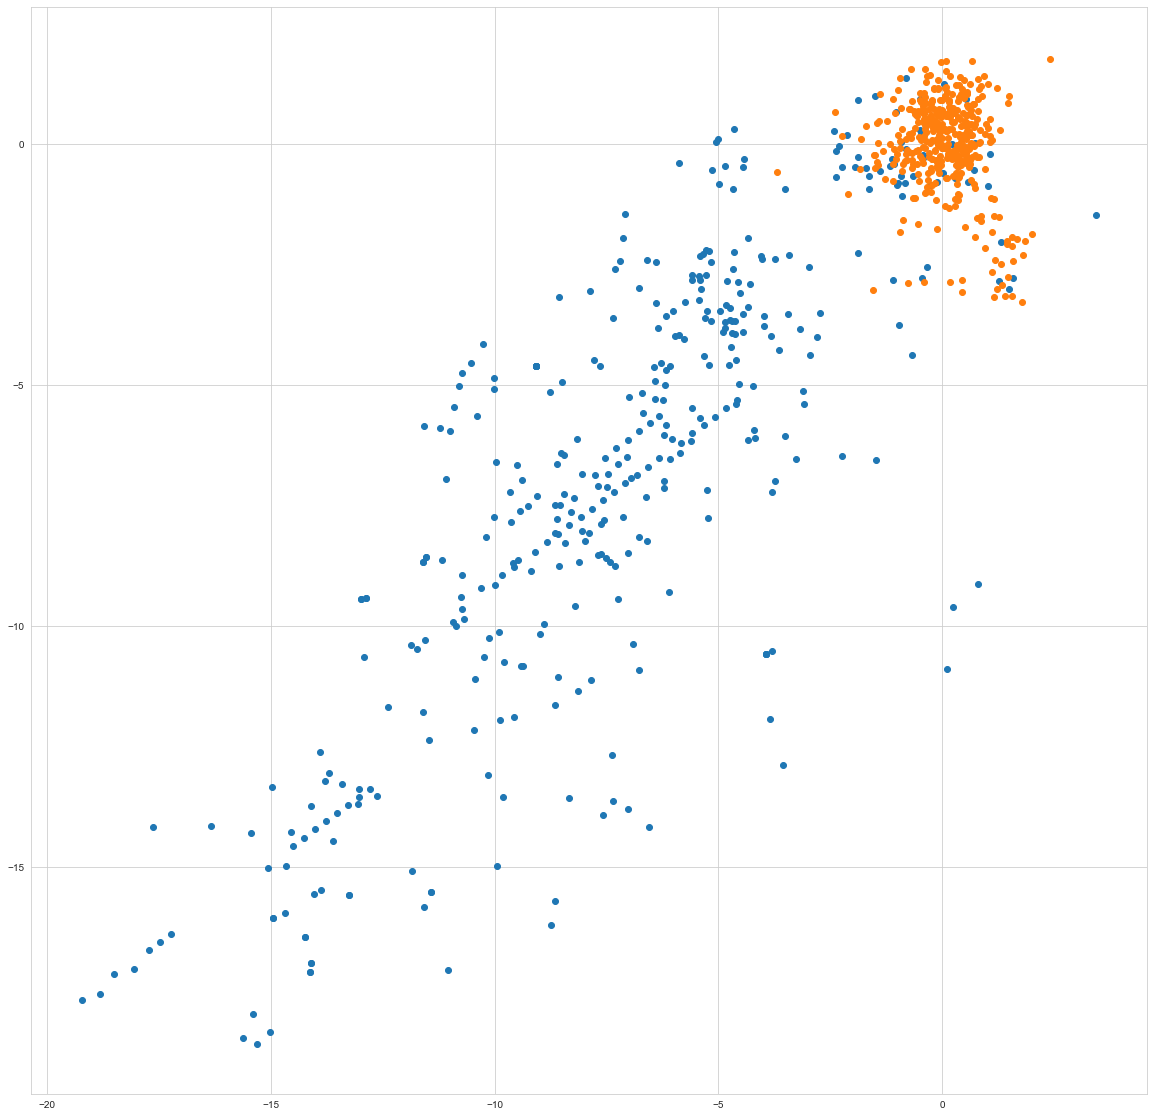

In [102]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')

In [103]:
# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

XGboost roc_value: 0.9726006330288302
XGBoost threshold: 0.002827876014634967


**Note:From above, we could see that threshold is approx. 0.003 for which TPR is the highest and FPR is the lowest which gives the best model**

## Summary:

We have executed several models having both balanced and imbalanced data. We have noted that most of the models shows approximately same value in terms of ROC, Precision and Recall. The models such as Random Forest, SVM and XGBoost requires heavy computation, thereby increasing the deployment cost where as Logistic Regression model requires less computation and thus, less deployment cost.

**The below conclusion has been obtained after running the models on the OverSampled data:-**
#### The XGBoost Model with Random Oversampling with StratifiedKFold Cross Validation is the best model that can be used for Credit Card Fraud Detection which provides best results. 

#### Model Results: <br>
`Model Accuracy: 0.999490879724724`<br>
`XGBoost roc_value: 0.9726006330288302`<br>
`XGBoost threshold: 0.002827876014634967`<br>

#### We could also see that	Logistic Regression with L2 Regularisation with RepeatedKFold Cross Validation has been provided best results without any oversampling.